# Sheet 3

In [75]:
install.packages("leaps")
library(tidyverse)
library(broom)
library(leaps)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [76]:
install.packages("leaps")
library(tidyverse)
library(broom)
library(leaps)

mortgage <- read.csv("State_of_New_York_Mortgage_Agency__SONYMA__Loans_Purchased__Beginning_2004.csv", stringsAsFactors = TRUE)

# Check column names in the dataset to confirm their structure
names(mortgage)

# Use the correct column name for exclusion; adjust based on valid column names.
mortgage <- mortgage |>
    select(
        -Bond.Series,
        -Loan.Purchase.Date, # Corrected column name
        -FIPS.Code
    ) |>
    rename(
        original_loan_amount = `Original.Loan.Amount`,
        purchase_year = `Purchase.Year`,
        original_loan_to_value = `Original.Loan.To.Value` # Adjusted column name
    ) |>
    rename(
        loan_type = `Loan.Type`,
        original_term = `Original.Term`,
        SONYMA_amount = `SONYMA.DPAL.CCAL.Amount`,
        county = `County`,
        num_of_units = `Number.of.Units`,
        property_type = `Property.Type`,
        housing_type = `Housing.Type`,
        household_size = `Household.Size`
    )


head(mortgage)
summary(mortgage)
nrow(mortgage)

# Only NA left in SONYMA that drop all of them
mortgage_clean <- mortgage |>
    drop_na()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



'Bond.Series' 'Original.Loan.Amount' 'Loan.Purchase.Date' 'Purchase.Year' 'Original.Loan.To.Value' 'Loan.Type' 'SONYMA.DPAL.CCAL.Amount' 'Original.Term' 'County' 'FIPS.Code' 'Number.of.Units' 'Property.Type' 'Housing.Type' 'Household.Size'

A data.frame: 6 × 11 
 
 original_loan_amount purchase_year original_loan_to_value loan_type SONYMA_amount original_term county num_of_units property_type housing_type household_size 
 <int> <int> <dbl> <fct> <int> <int> <fct> <fct> <fct> <fct> <int> 
 
 
 1 32470 2004 97 Conventional 2933 360 Monroe 1 Family Detached Existing 1 
 2 48500 2004 97 Conventional 3435 360 Genesee 1 Family Detached Existing 4 
 3 49470 2004 97 Conventional 4996 360 Monroe 1 Family Detached Existing 3 
 4 58200 2004 97 Conventional 4170 360 Erie 1 Family Detached Existing 2 
 5 64990 2004 97 Conventional 4940 360 Erie 1 Family Detached Existing 3 
 6 64990 2004 97 Conventional 4772 360 Schenectady 1 Family Detached Existing 1

 original_loan_amount purchase_year  original_loan_to_value
 Min.   : 11000       Min.   :2004   Min.   :  5.87        
 1st Qu.: 76000       1st Qu.:2005   1st Qu.: 80.00        
 Median :108123       Median :2008   Median : 92.53        
 Mean   :134701       Mean   :2008   Mean   : 86.83        
 3rd Qu.:174501       3rd Qu.:2011   3rd Qu.: 96.97        
 Max.   :799200       Max.   :2016   Max.   :100.00        
                                                           
        loan_type     SONYMA_amount   original_term           county     
 Conventional:27959   Min.   :    0   Min.   :240.0   Monroe     : 3985  
 Step        :  569   1st Qu.: 3720   1st Qu.:360.0   Suffolk    : 3445  
                      Median : 5000   Median :360.0   Erie       : 3373  
                      Mean   : 5357   Mean   :363.9   Kings      : 1375  
                      3rd Qu.: 6150   3rd Qu.:360.0   Nassau     : 1236  
                      Max.   :24503   Max.   :480.0   Westchester: 1109  
  

28528

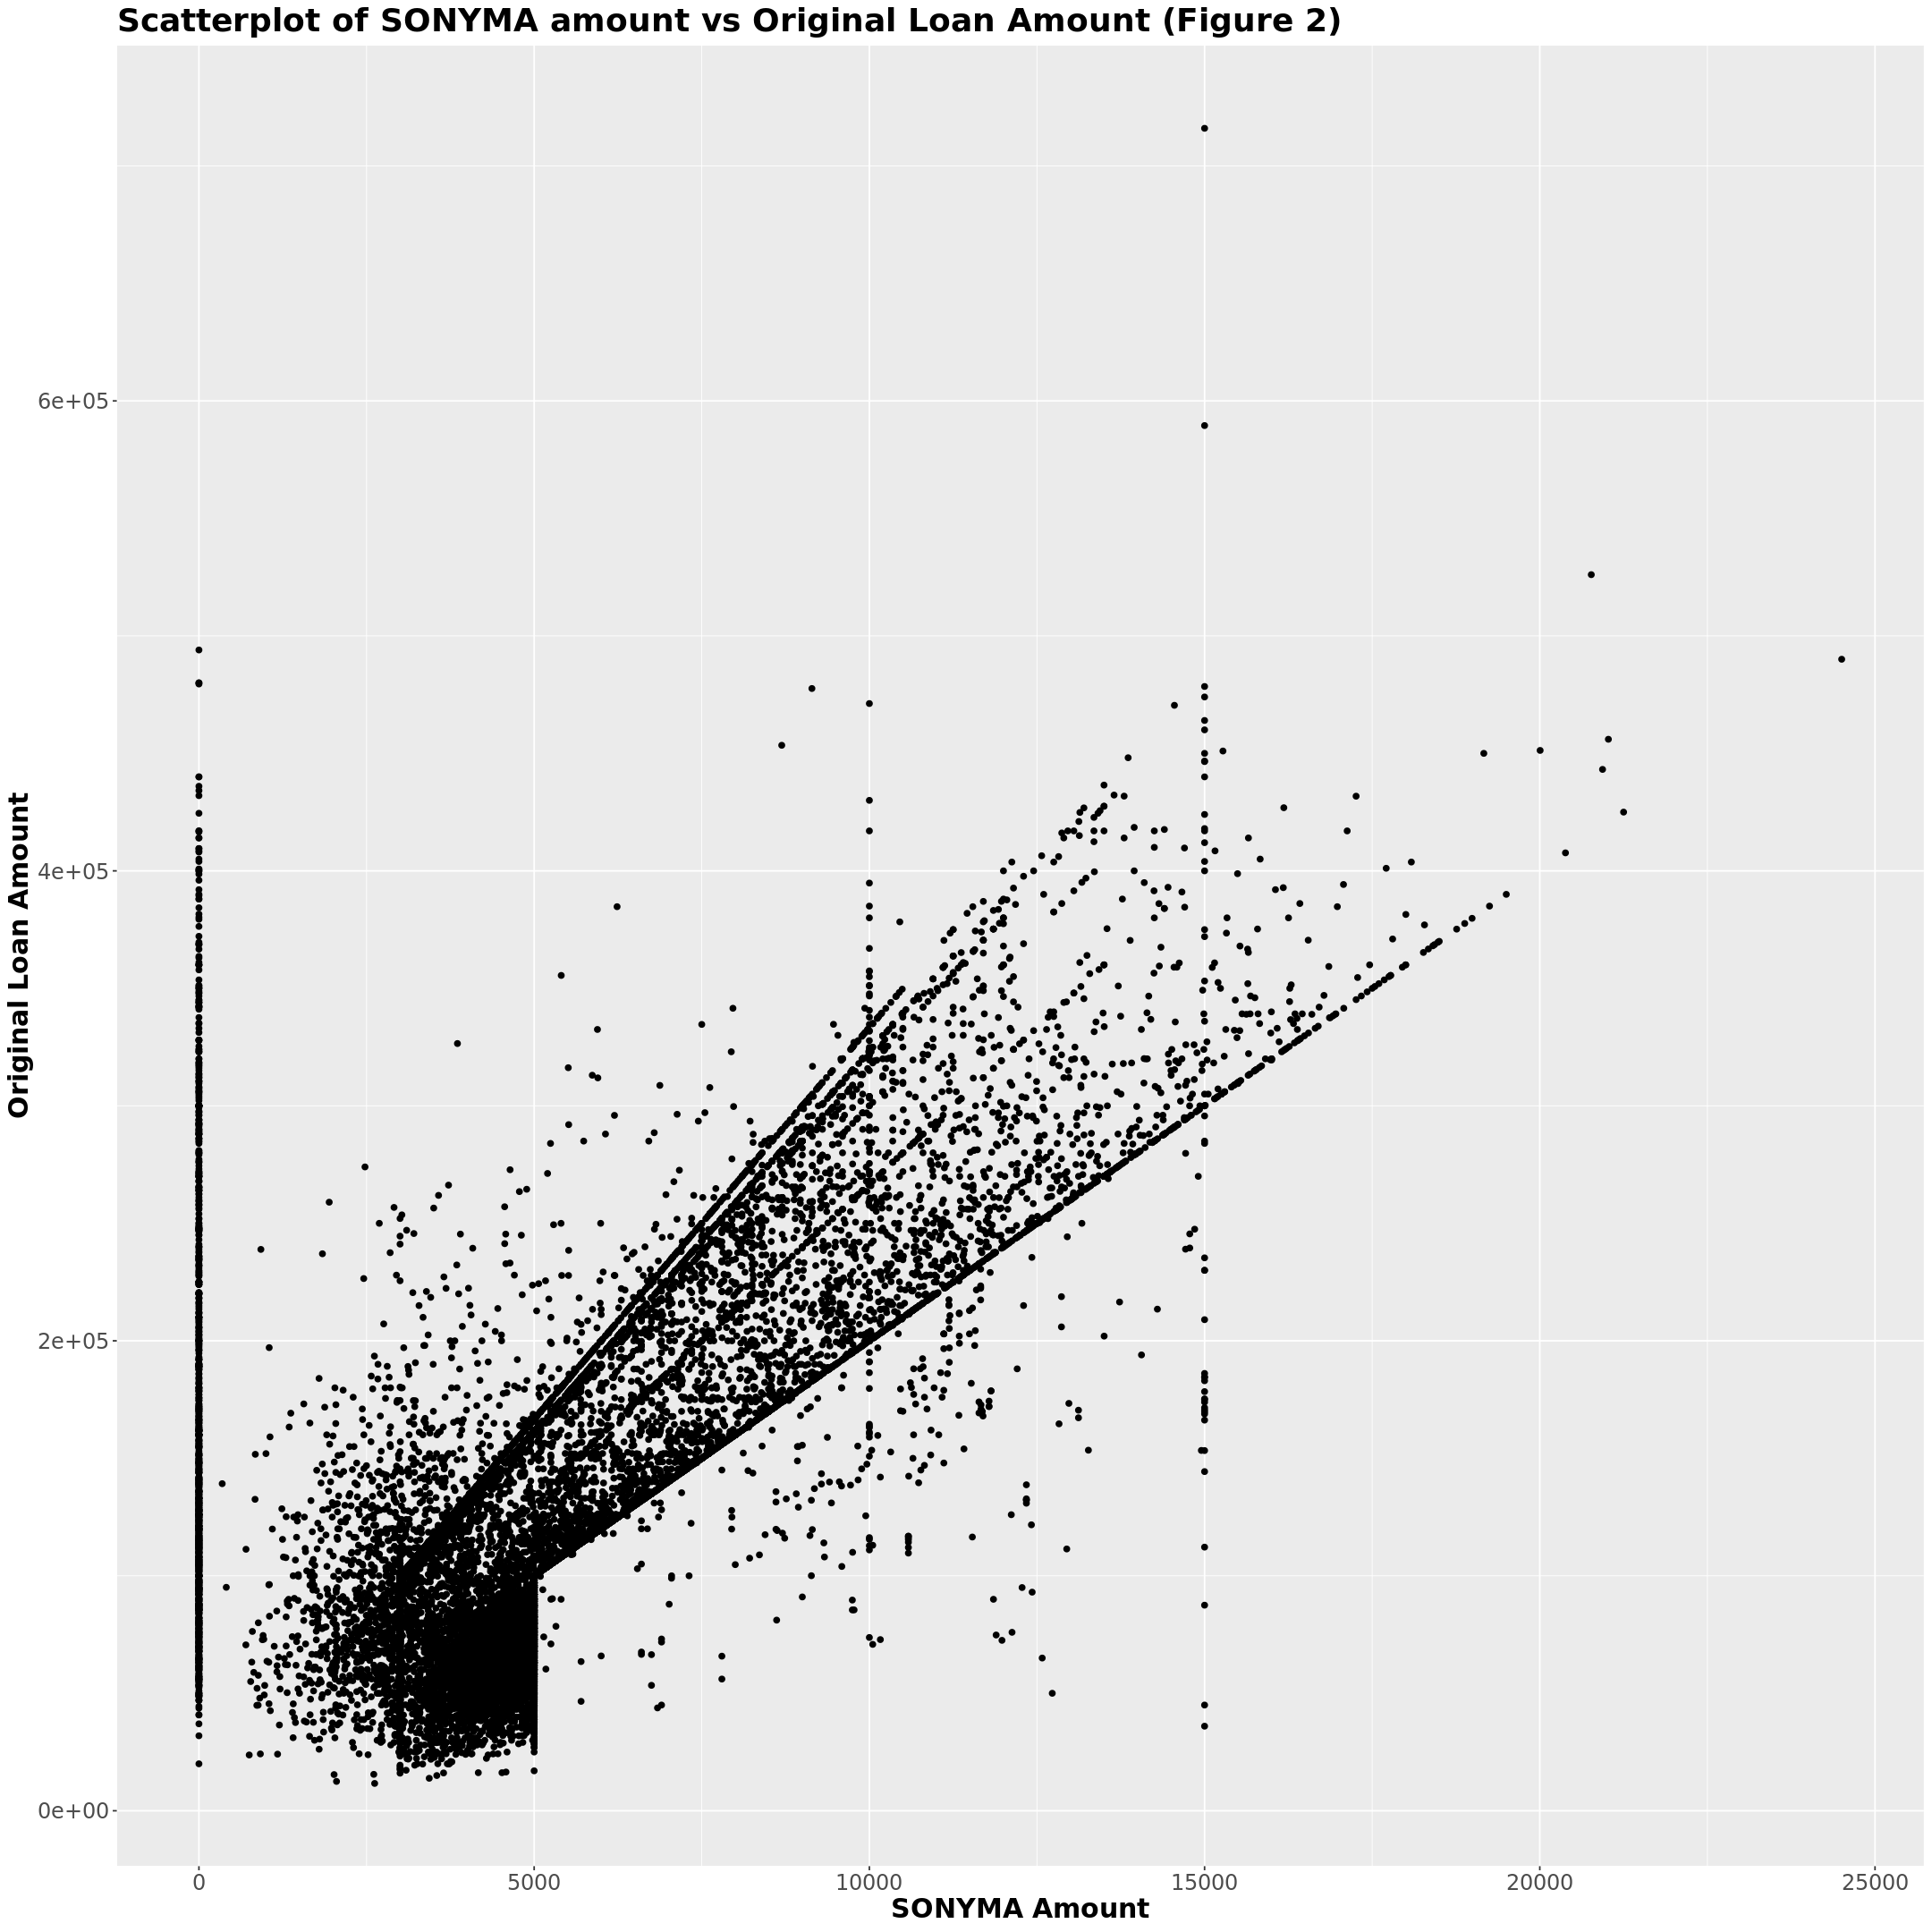

In [99]:
options(repr.plot.width = 18, repr.plot.height = 18) 

plot_SONYMA_vs_original_amount <- 
    mortgage_clean |>
    ggplot(aes(x = SONYMA_amount, y =  original_loan_amount)) +
    geom_point() +
    ggtitle("Scatterplot of SONYMA amount vs Original Loan Amount (Figure 2)") +
    xlab("SONYMA Amount") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

plot_SONYMA_vs_original_amount

# Removed 7516 rows because SONYMA amount implicitly contain the borrower financial background 
# (read the attached Overview for more information to interpretation)

ggsave("./images/plot_SONYMA_vs_original_amount_2.png", plot_SONYMA_vs_original_amount, height = 15, width = 15, units = "in")


In [85]:
install.packages("corrplot")
library(corrplot)

options(repr.plot.width = 13, repr.plot.height = 14) 

correlation_matrix <- mortgage_clean |>
  select(where(is.numeric)) |>
  cor()

par(mar = c(1, 1, 4, 1))  
png("./images/corrplot_of_all.png", height = 14, width = 13, units = "in", res = 300)  # Open a device to save as PNG
corrplot_of_all <- corrplot(correlation_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45, addCoef.col = "black",
         title = "Collinearity Heatmap of All Variables (Figure 1)", 
         mar = c(0, 0, 2, 0))
dev.off()  # Close the device

corrplot_of_all

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



png: 2

$corr 
 
 A matrix: 6 × 6 of type dbl 
 
 original_loan_amount purchase_year original_loan_to_value SONYMA_amount original_term household_size 
 
 
 original_loan_amount 1.0000000 0.35367043 -0.064226495 0.66205366 0.191369144 0.23642070 
 purchase_year 0.3536704 1.00000000 -0.118299250 -0.06268174 0.057114753 0.07479243 
 original_loan_to_value -0.0642265 -0.11829925 1.000000000 -0.09175520 0.004087184 -0.03617962 
 SONYMA_amount 0.6620537 -0.06268174 -0.091755198 1.00000000 0.199689376 0.20217555 
 original_term 0.1913691 0.05711475 0.004087184 0.19968938 1.000000000 0.06857458 
 household_size 0.2364207 0.07479243 -0.036179625 0.20217555 0.068574583 1.00000000 
 
 
 
 $corrPos 
 
 A data.frame: 21 × 5 
 
 xName yName x y corr 
 <chr> <chr> <dbl> <dbl> <dbl> 
 
 
 original_loan_amount original_loan_amount 1 6 1.000000000 
 purchase_year original_loan_amount 2 6 0.353670433 
 purchase_year purchase_year 2 5 1.000000000 
 original_loan_to_value original_loan_amount 3 6 -0.064226495 
 original_loan_to_value purchase_year 3 5 -0.118299250 
 original_loan_to_value original_loan_to_value 3 4 1.000000000 
 SONYMA_amount original_loan_amount 4 6 0.662053659 
 SONYMA_amount purchase_year 4 5 -0.062681736 
 SONYMA_amount original_loan_to_value 4 4 -0.091755198 
 SONYMA_amount SONYMA_amount 4 3 1.000000000 
 original_term original_loan_amount 5 6 0.191369144 
 original_term purchase_year 5 5 0.057114753 
 original_term original_loan_to_value 5 4 0.004087184 
 original_term SONYMA_amount 5 3 0.199689376 
 original_term original_term 5 2 1.000000000 
 household_size original_loan_amount 6 6 0.236420696 
 household_size purchase_year 6 5 0.074792430 
 household_size original_loan_to_value 6 4 -0.036179625 
 household_size SONYMA_amount 6 3 0.202175551 
 household_size original_term 6 2 0.068574583 
 household_size household_size 6 1 1.000000000 
 
 
 
 $arg 
 $type = 'upper'

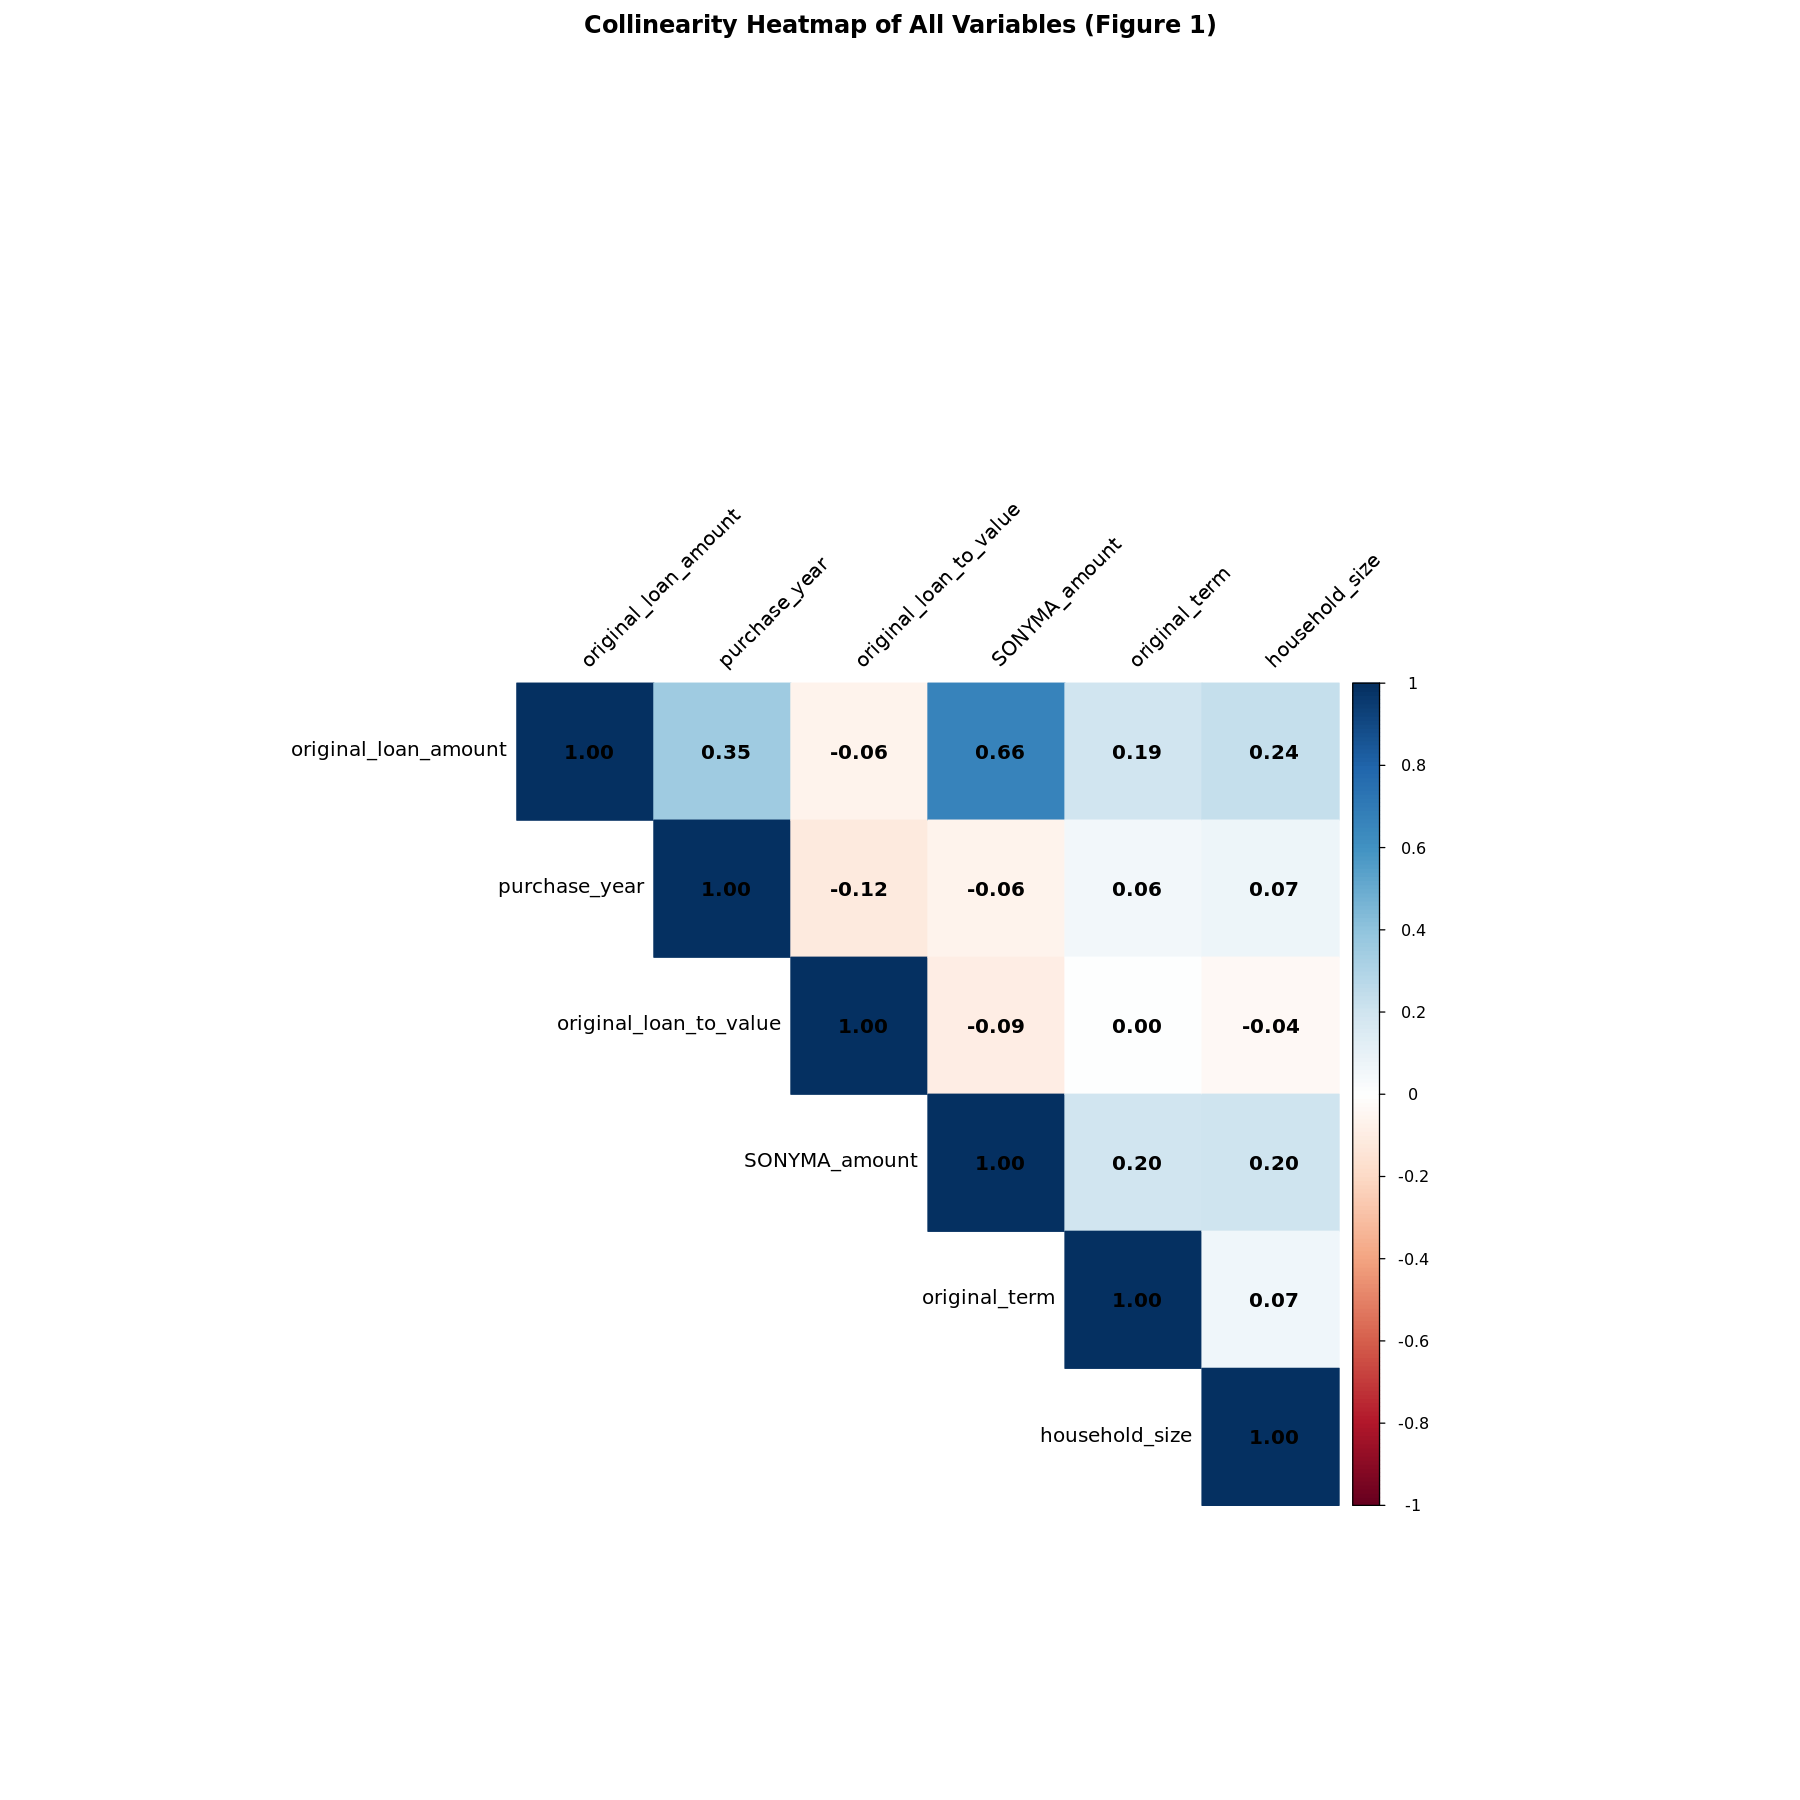

In [140]:
corrplot(correlation_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45, addCoef.col = "black",
         title = "Collinearity Heatmap of All Variables (Figure 1)", 
         mar = c(0, 0, 2, 0))

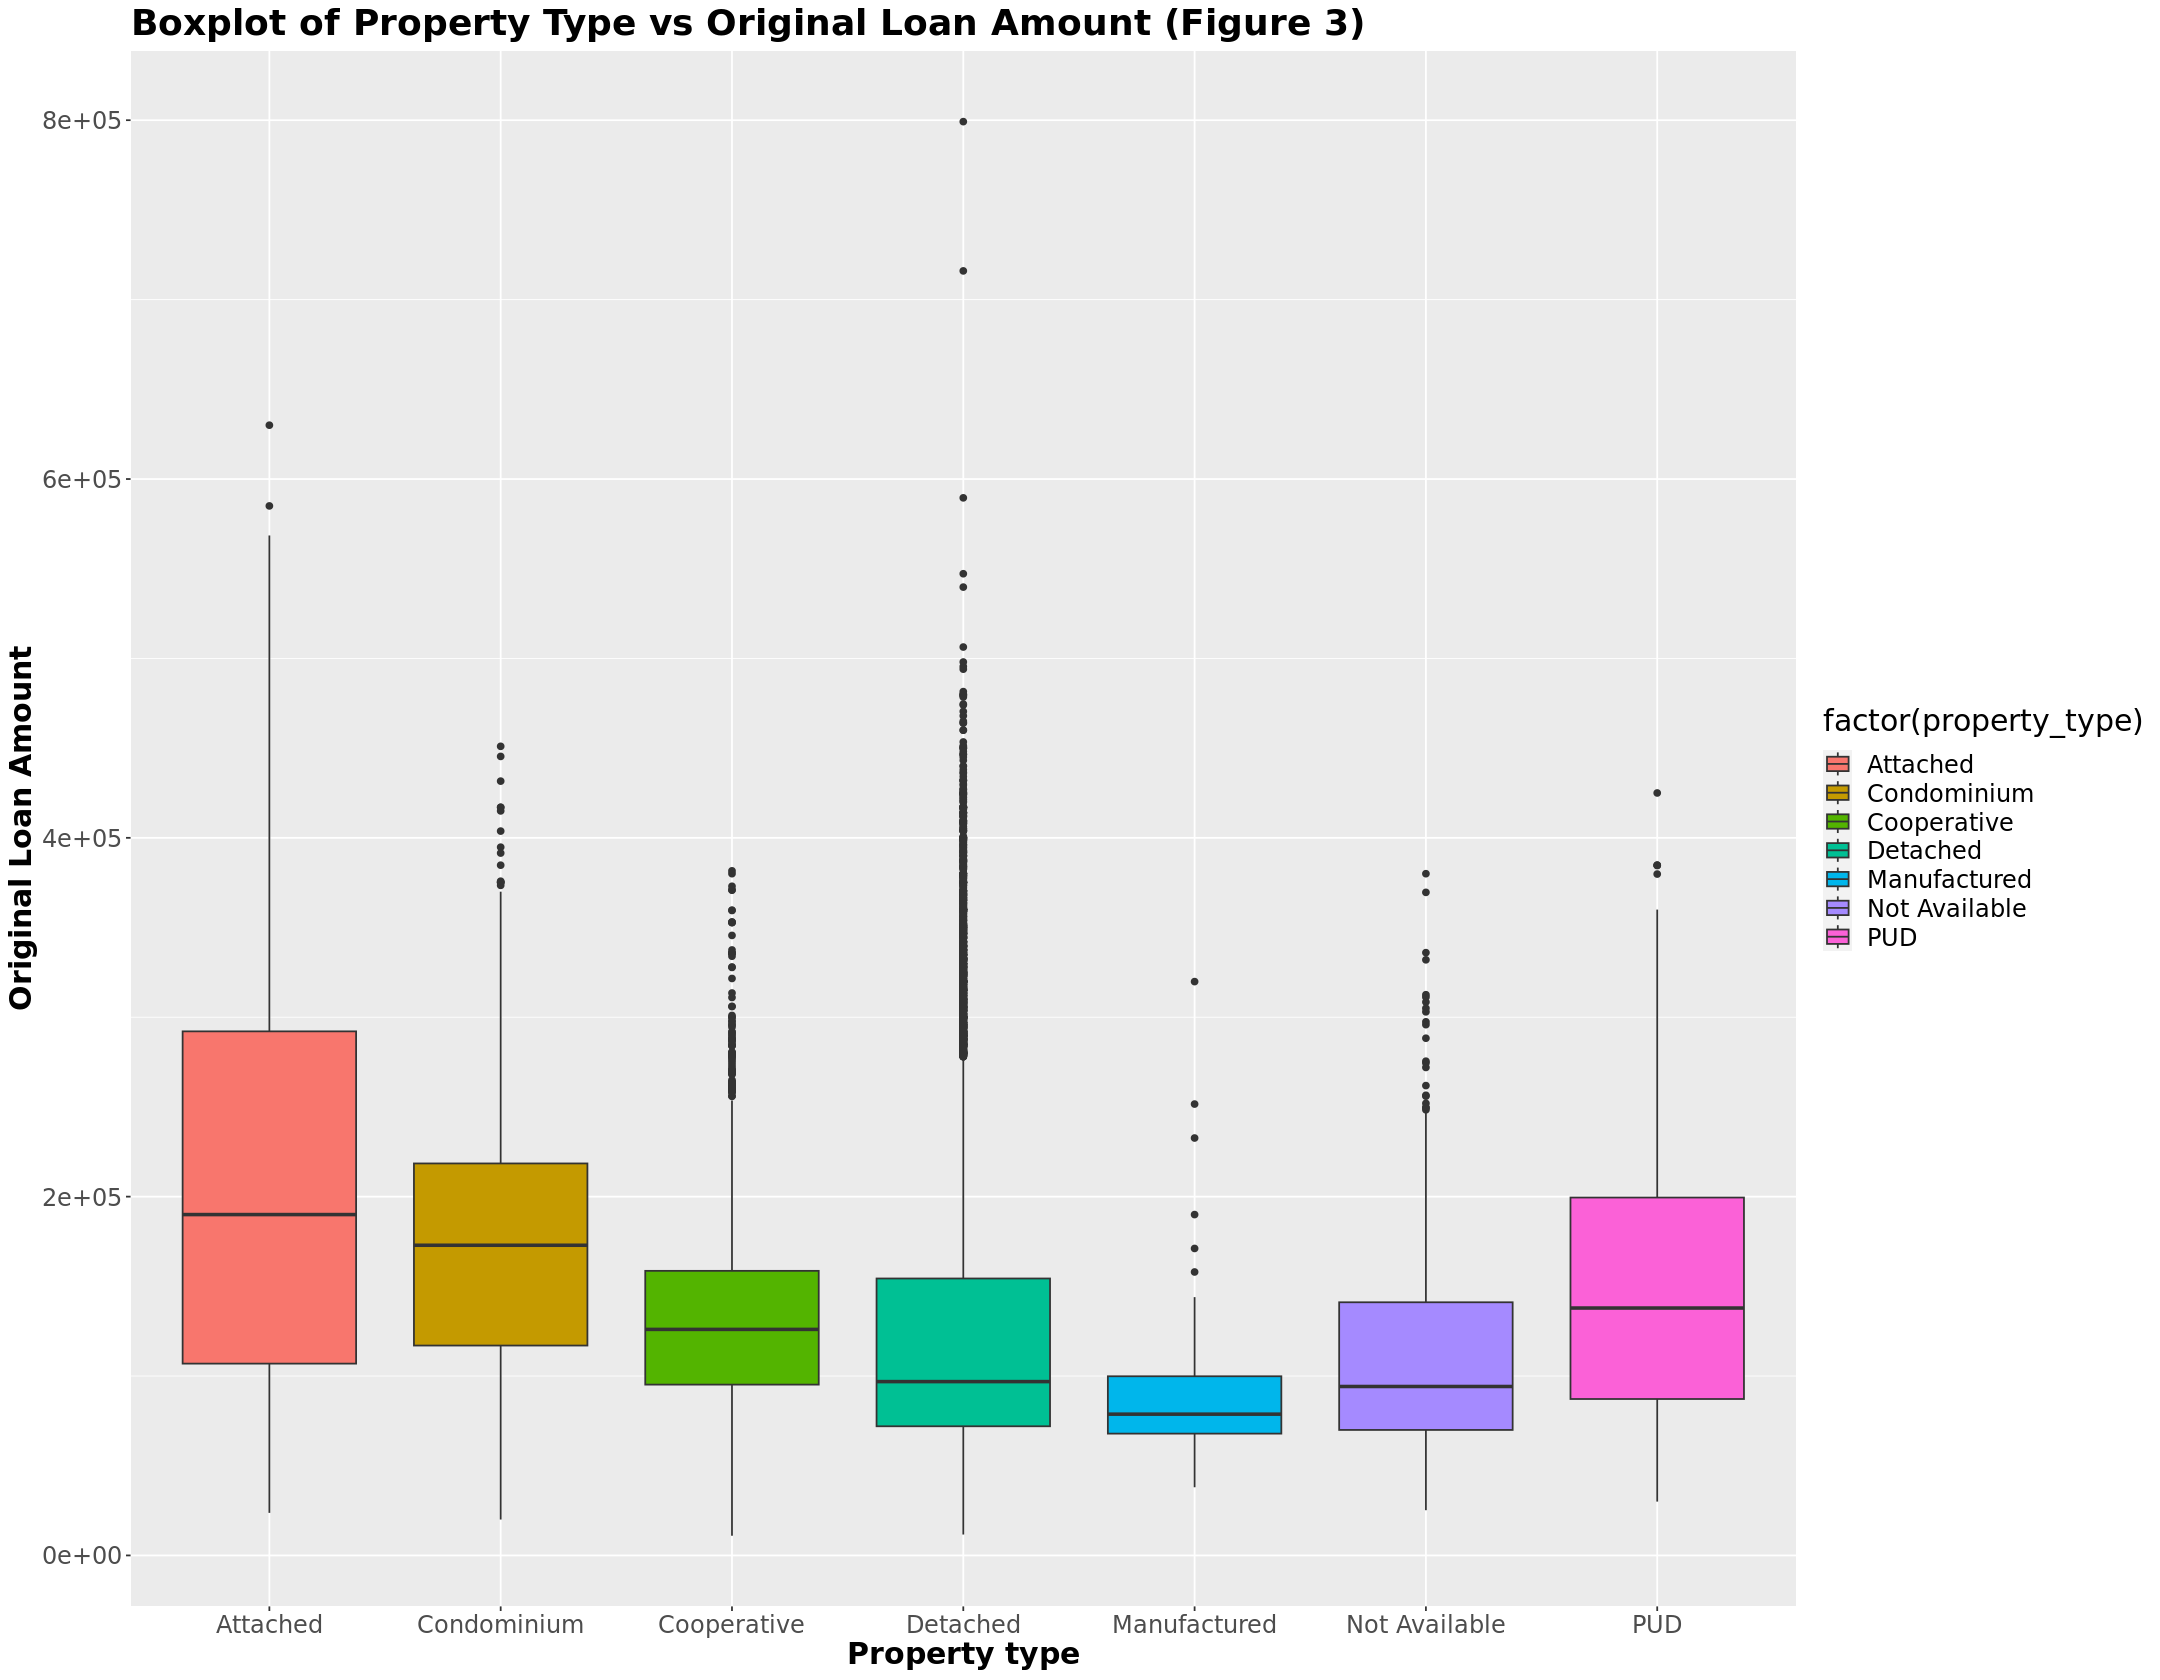

In [88]:
options(repr.plot.width = 18, repr.plot.height = 14) 

plot_original_amount_vs_property_type <- 
    mortgage |>
    ggplot(aes(x = factor(property_type), y = original_loan_amount,fill = factor(property_type) )) +
    geom_boxplot() +
    ggtitle("Boxplot of Property Type vs Original Loan Amount (Figure 3)") +
    xlab("Property type") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

plot_original_amount_vs_property_type 

ggsave("./images/plot_original_amount_vs_property_type.png", plot_original_amount_vs_property_type, height = 14, width = 18, units = "in")

The lowest property type is manufactured which is understandable because they are assembled on the factory off site then transported to the location, these homes typically are on the lower side of cost, 

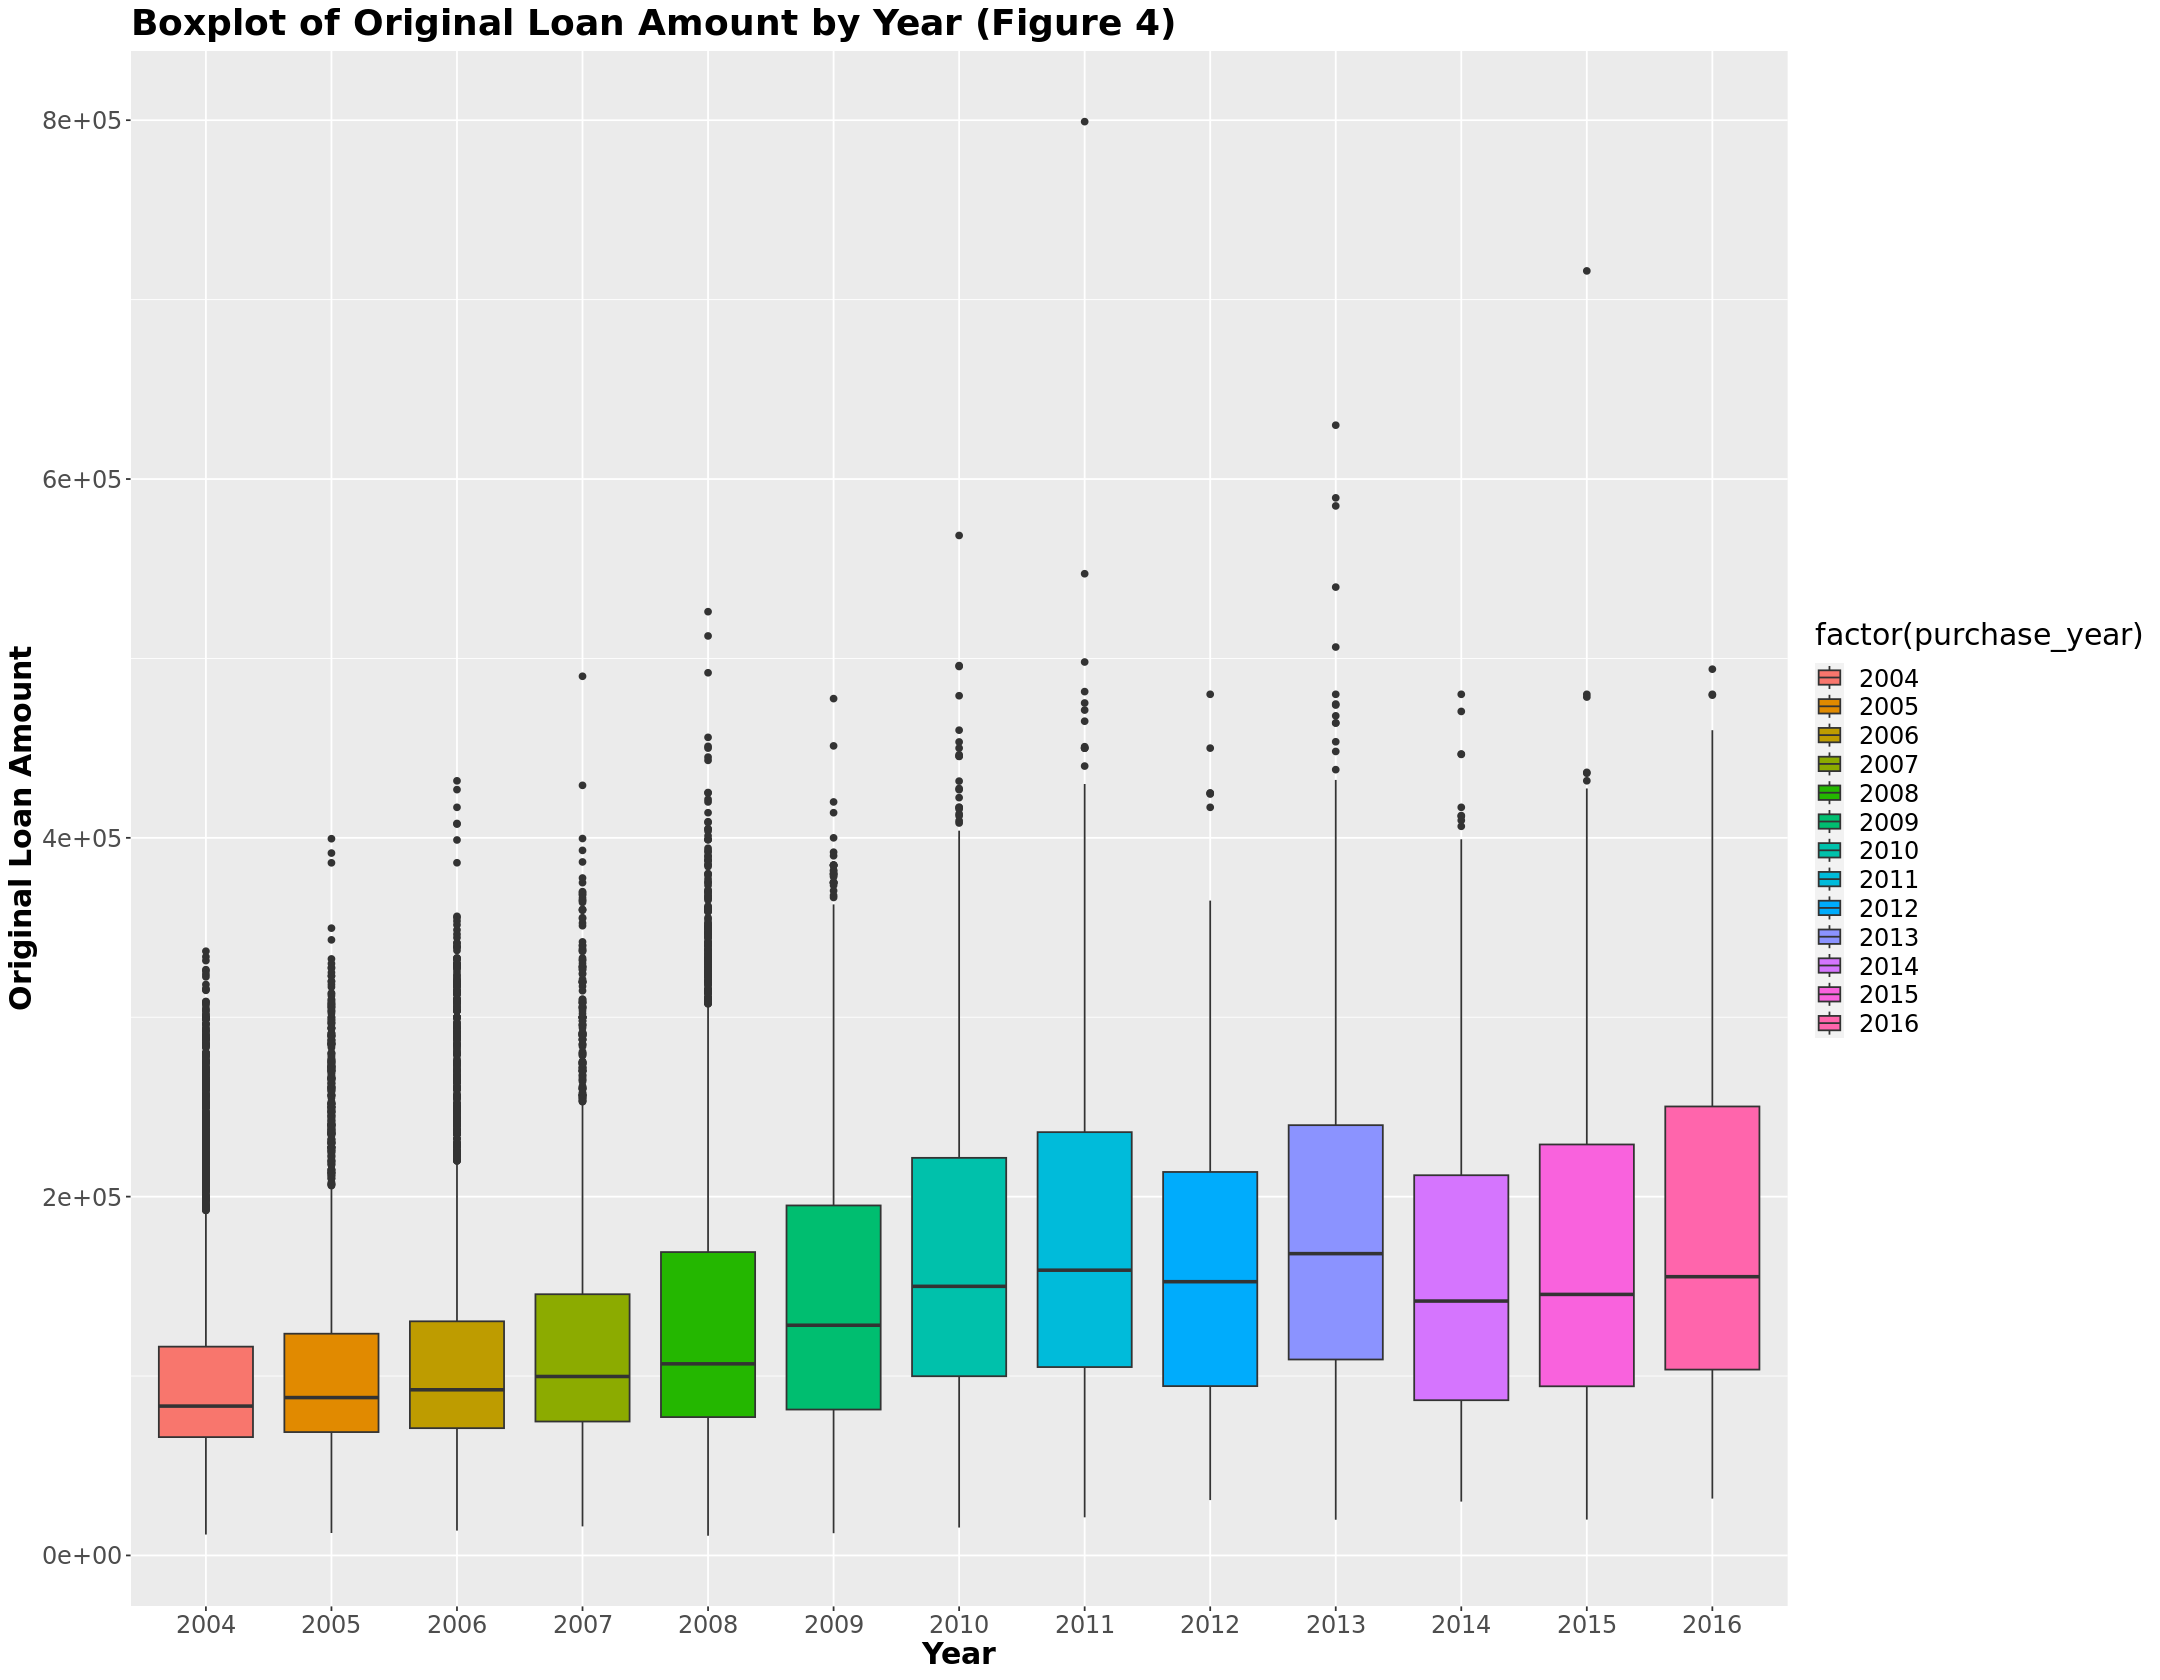

In [91]:
options(repr.plot.width = 18, repr.plot.height = 14) 

plot_original_amount_by_year <- 
    mortgage |>
    ggplot(aes(x = factor(purchase_year), y = original_loan_amount , fill = factor(purchase_year))) +
    geom_boxplot() +
    ggtitle("Boxplot of Original Loan Amount by Year (Figure 4)") +
    xlab("Year") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

plot_original_amount_by_year

ggsave("./images/ploy_original_amount_by_year.png", plot_original_amount_by_year, height = 14, width = 18)

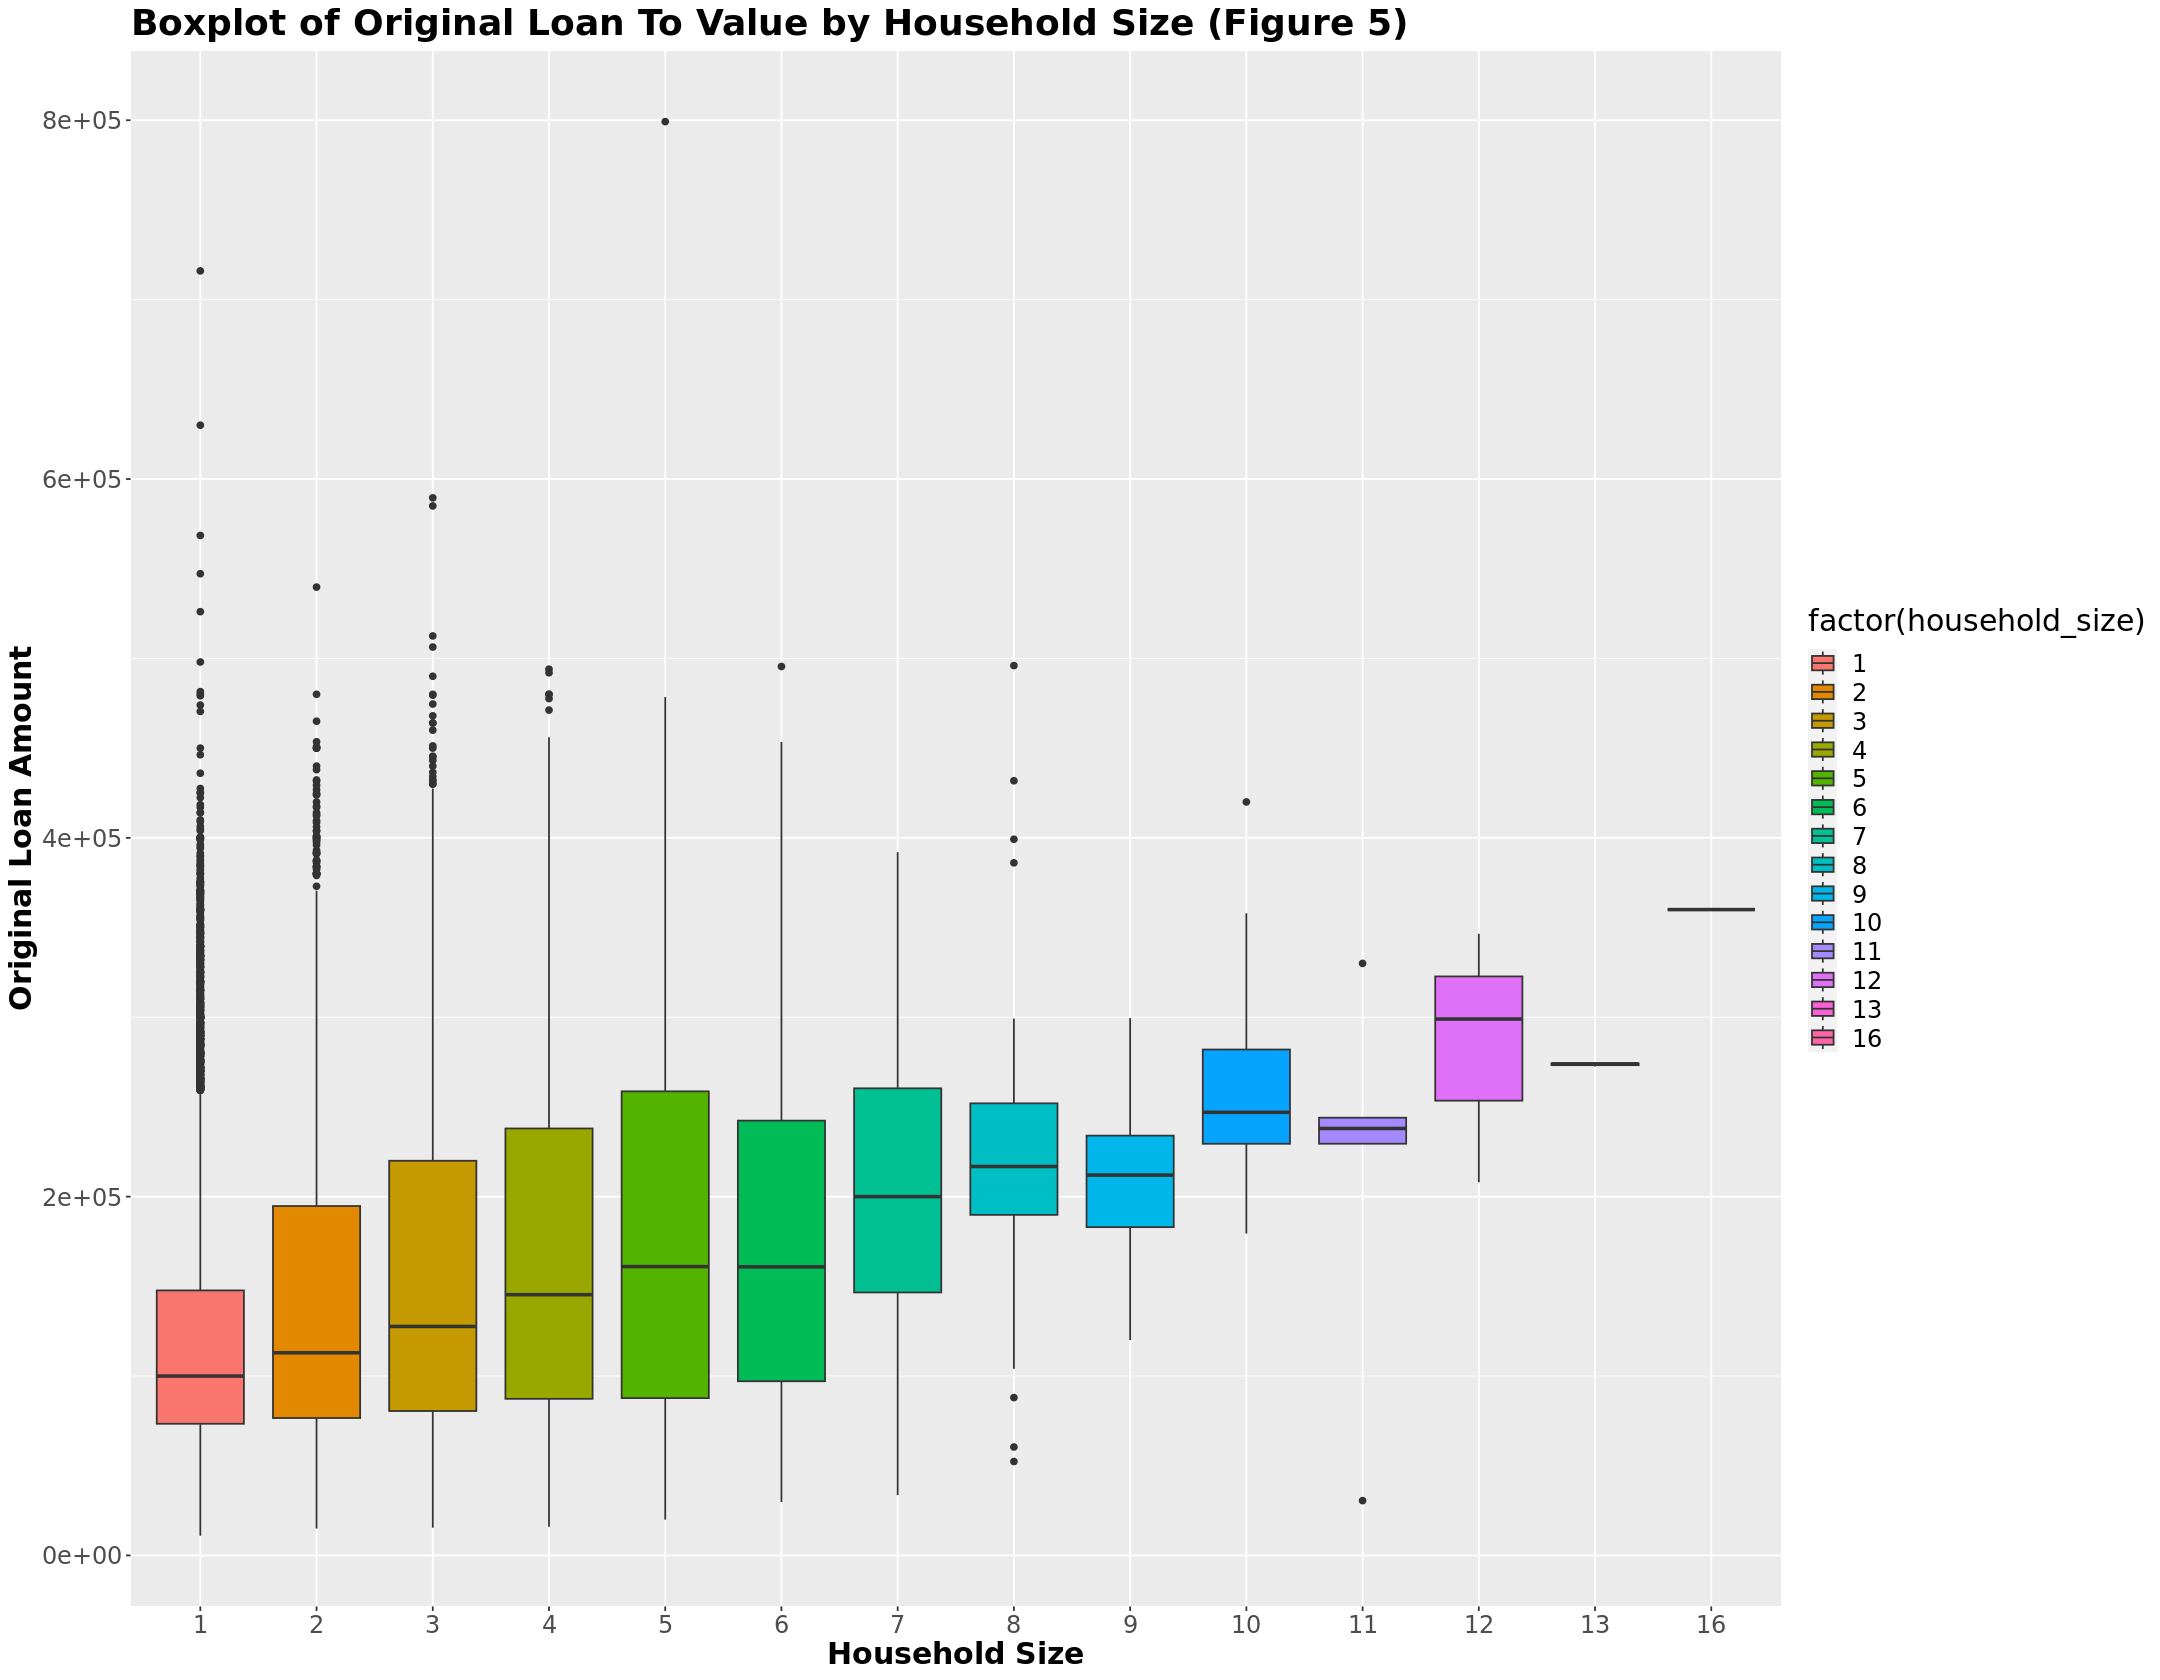

In [93]:
options(repr.plot.width = 18, repr.plot.height = 14) 

plot_original_amount_vs_household_size <- 
    mortgage |>
    ggplot(aes(x = factor(household_size), y =  original_loan_amount, fill = factor(household_size))) +
    geom_boxplot() +
    ggtitle("Boxplot of Original Loan To Value by Household Size (Figure 5)") +
    xlab("Household Size") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

plot_original_amount_vs_household_size

ggsave("./images/plot_original_amount_vs_household_size.png", plot_original_amount_vs_household_size, height = 14, width =18)

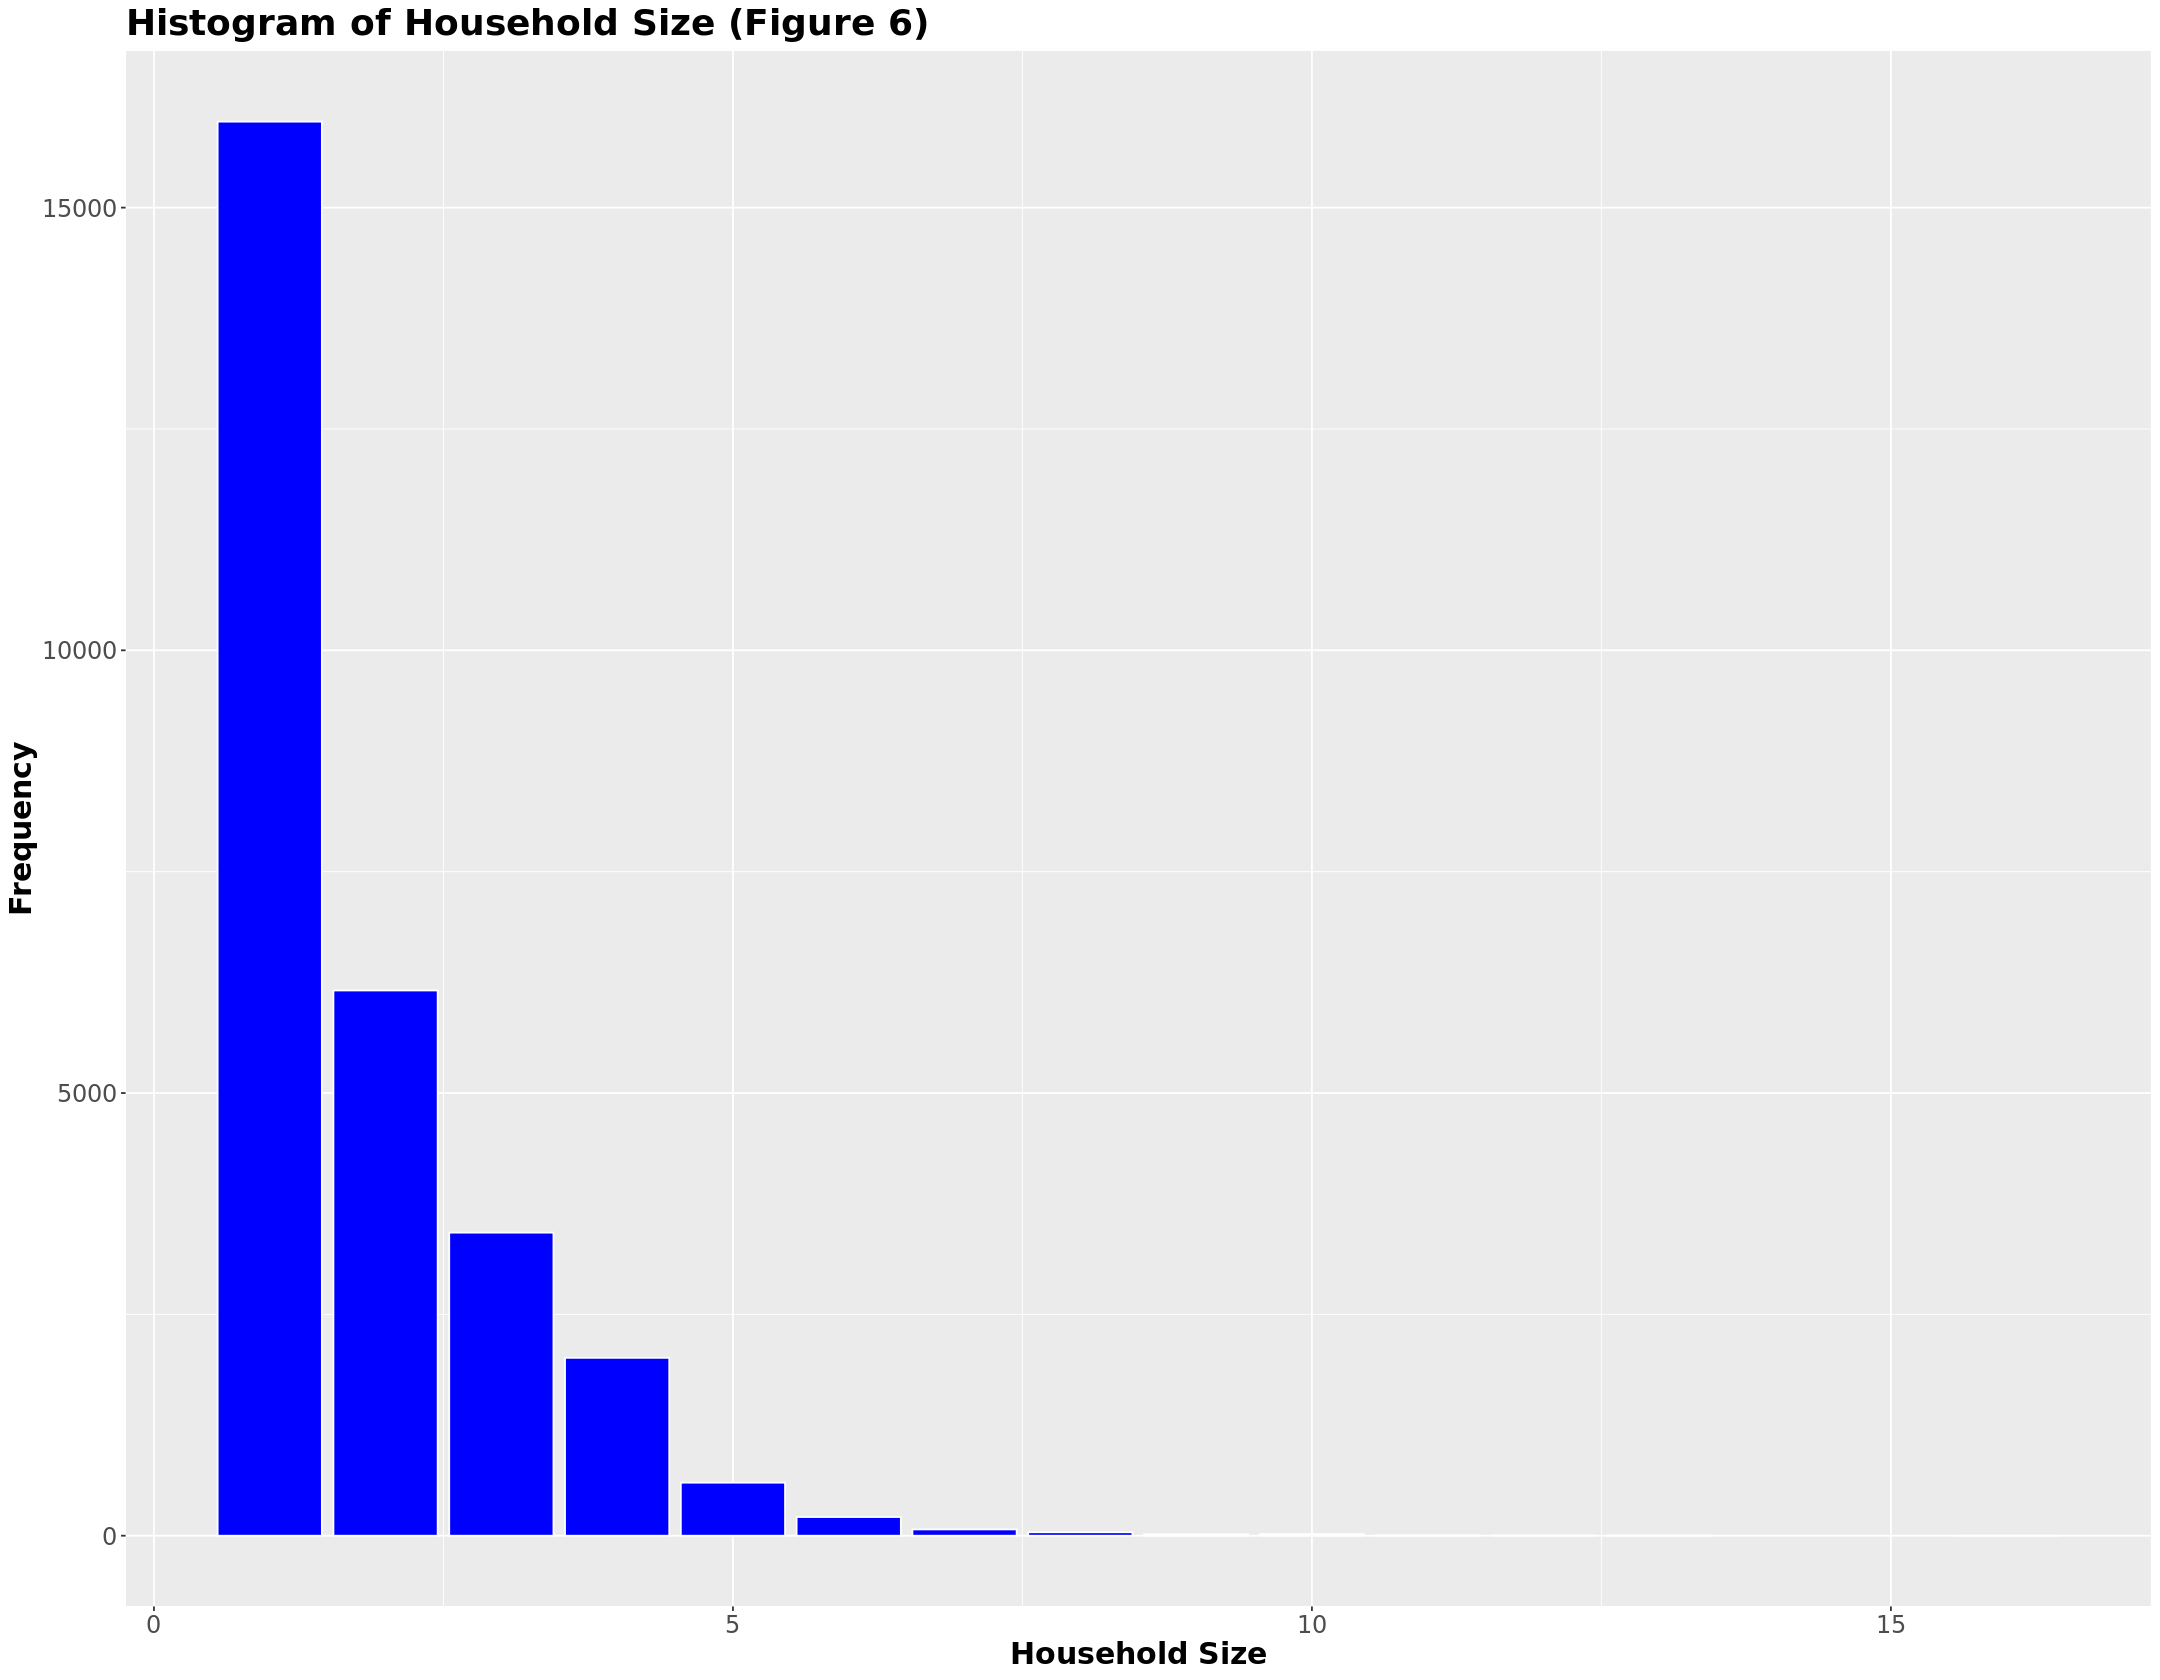

In [100]:
options(repr.plot.width = 18, repr.plot.height = 14) 

# Corrected household_size_plot using geom_bar()
household_size_plot <- mortgage |>
    ggplot(aes(x = household_size)) +
    geom_bar(fill = "blue", color = "white") +  # Corrected to geom_bar
    ggtitle("Histogram of Household Size (Figure 6)") +
    xlab("Household Size") +
    ylab("Frequency") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

household_size_plot

ggsave("./images/household_size_plot.png", household_size_plot, height = 14, width=18)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


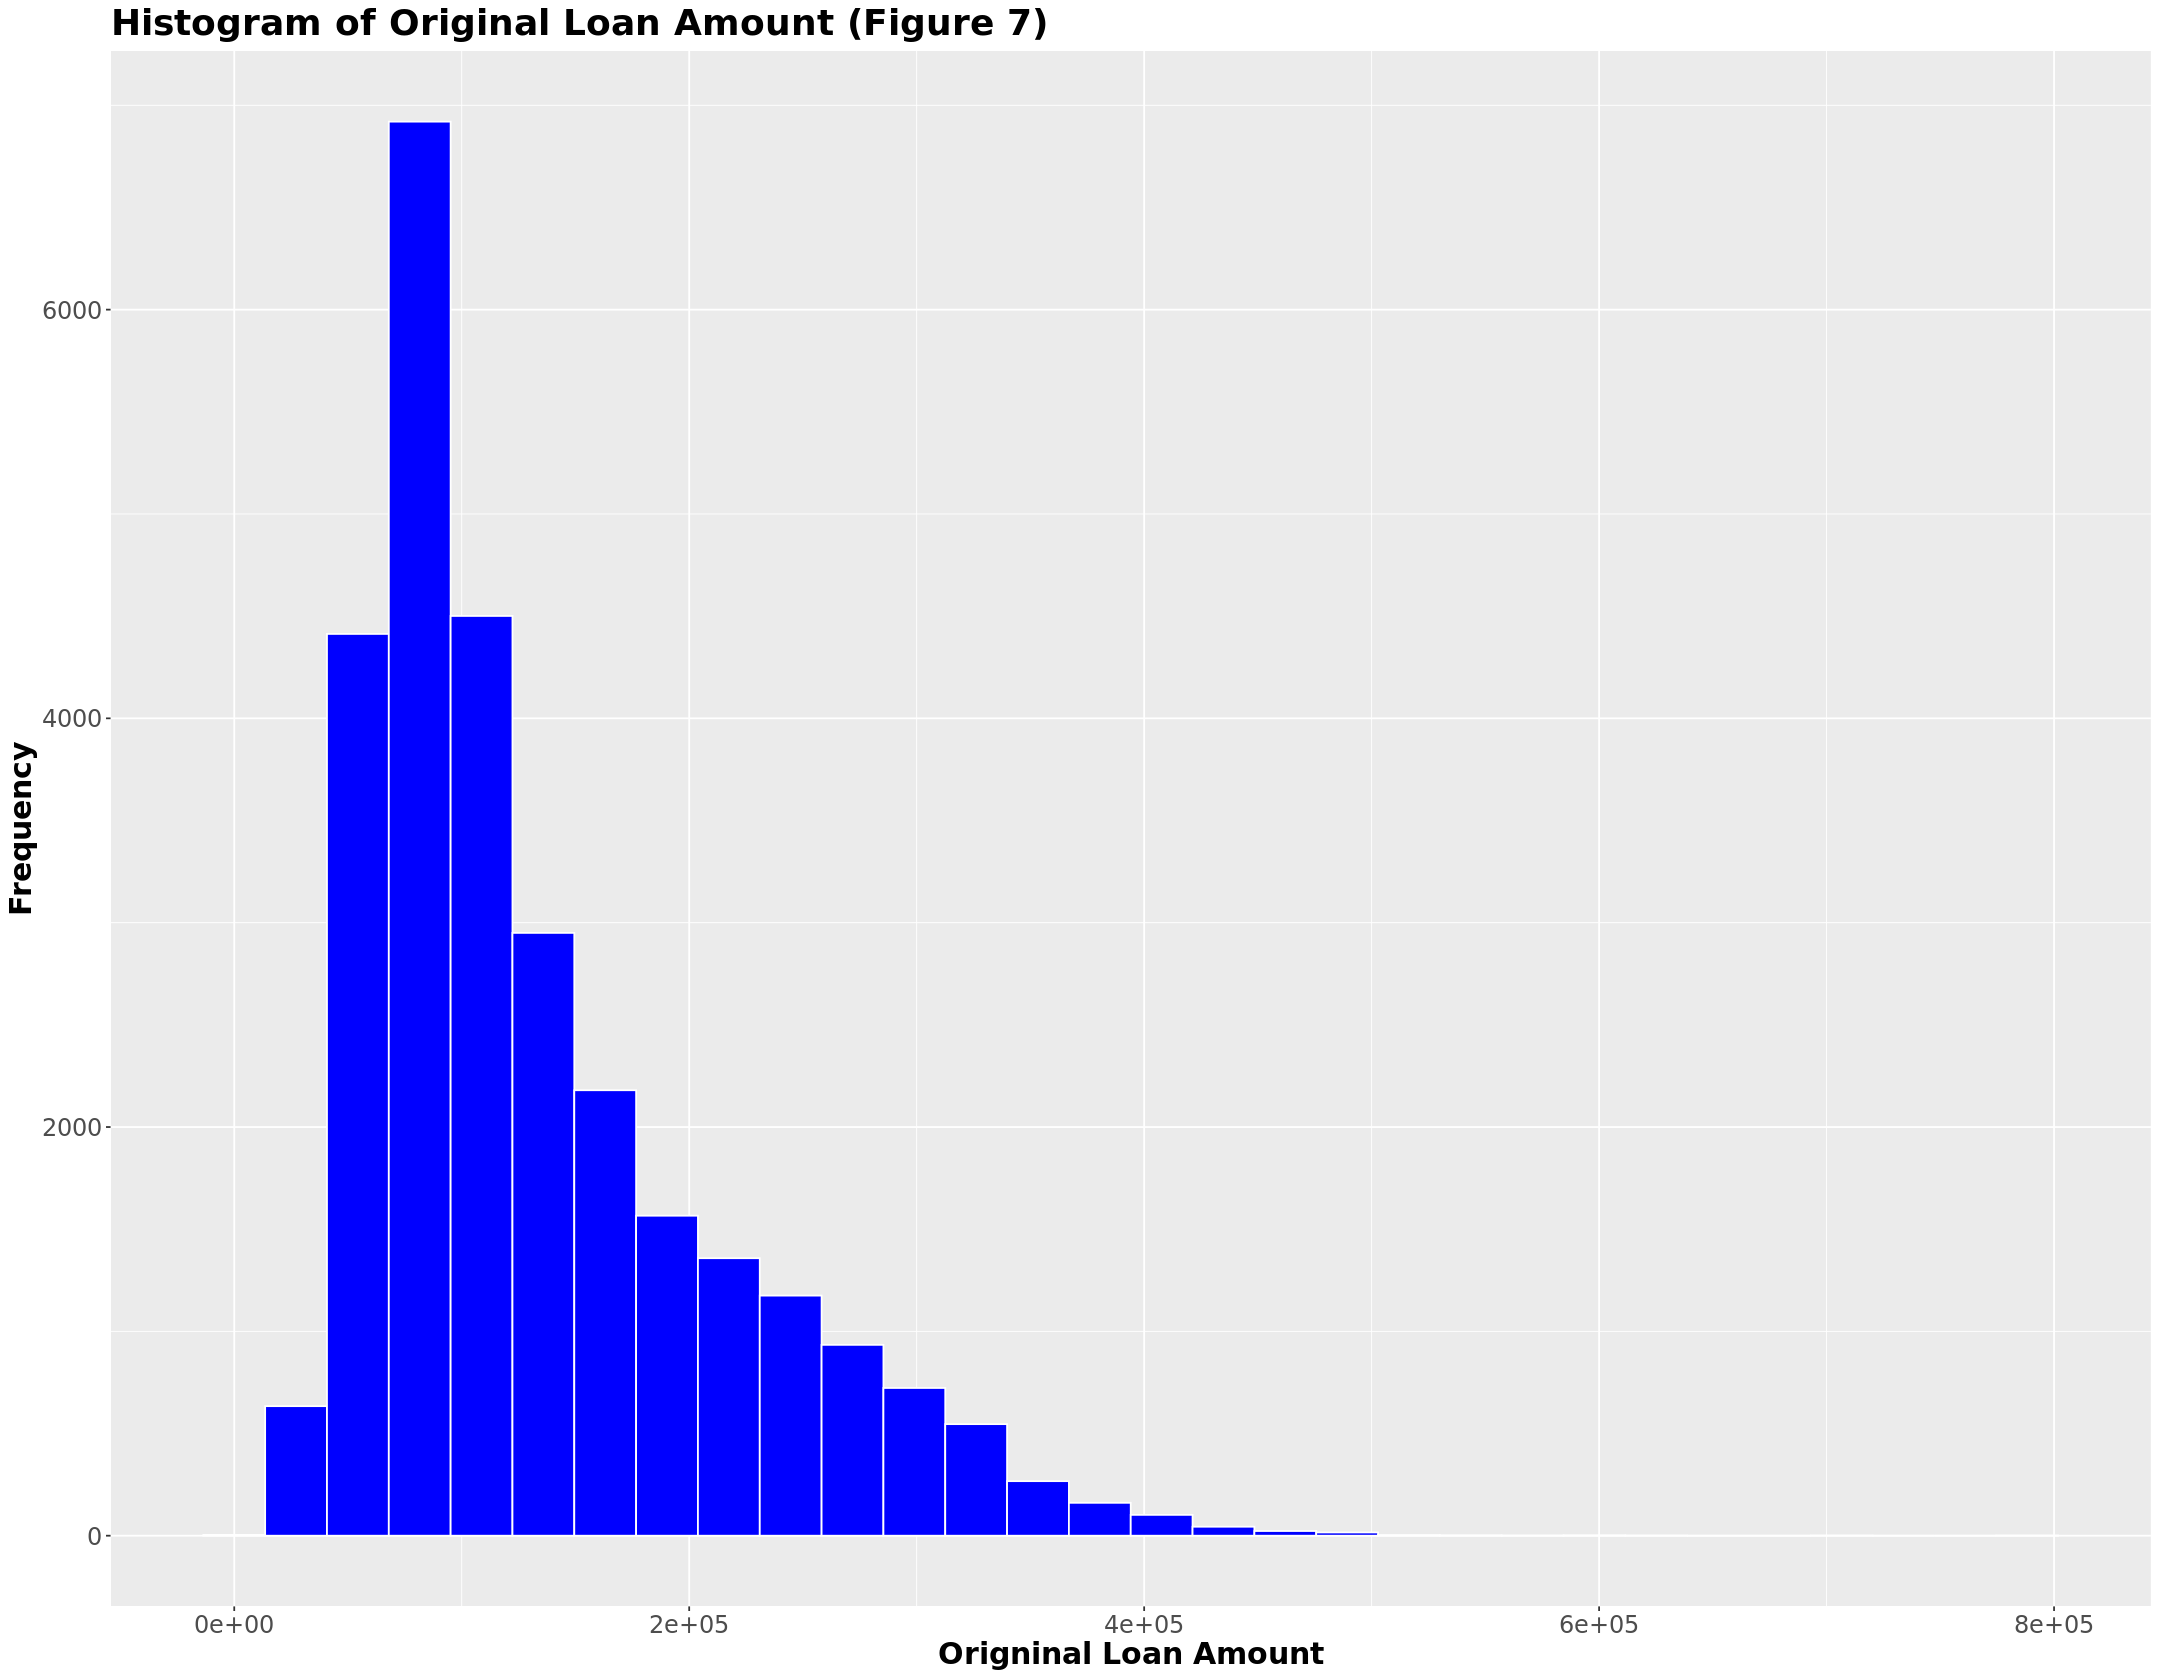

In [101]:
original_loan_amount_plot <- mortgage |>
    ggplot(aes(x = original_loan_amount)) +
    geom_histogram(fill = "blue", color = "white") +  # Corrected to geom_bar
    ggtitle("Histogram of Original Loan Amount (Figure 7)") +
    xlab("Origninal Loan Amount") +
    ylab("Frequency") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

original_loan_amount_plot

ggsave("./images/original_loan_amount_plot.png", original_loan_amount_plot, height = 14, width = 16)

In [415]:
# Fixing the error in the last cell by creating a tibble from the unique counties
library(tibble)  # Ensure tibble is loaded

# Convert unique counties into a tibble, then count the number of unique rows
unique_counties <- as_tibble(unique(mortgage$county), .name_repair = "unique")

count(unique_counties)

A tibble: 1 × 1 
 
 n 
 <int> 
 
 
 62

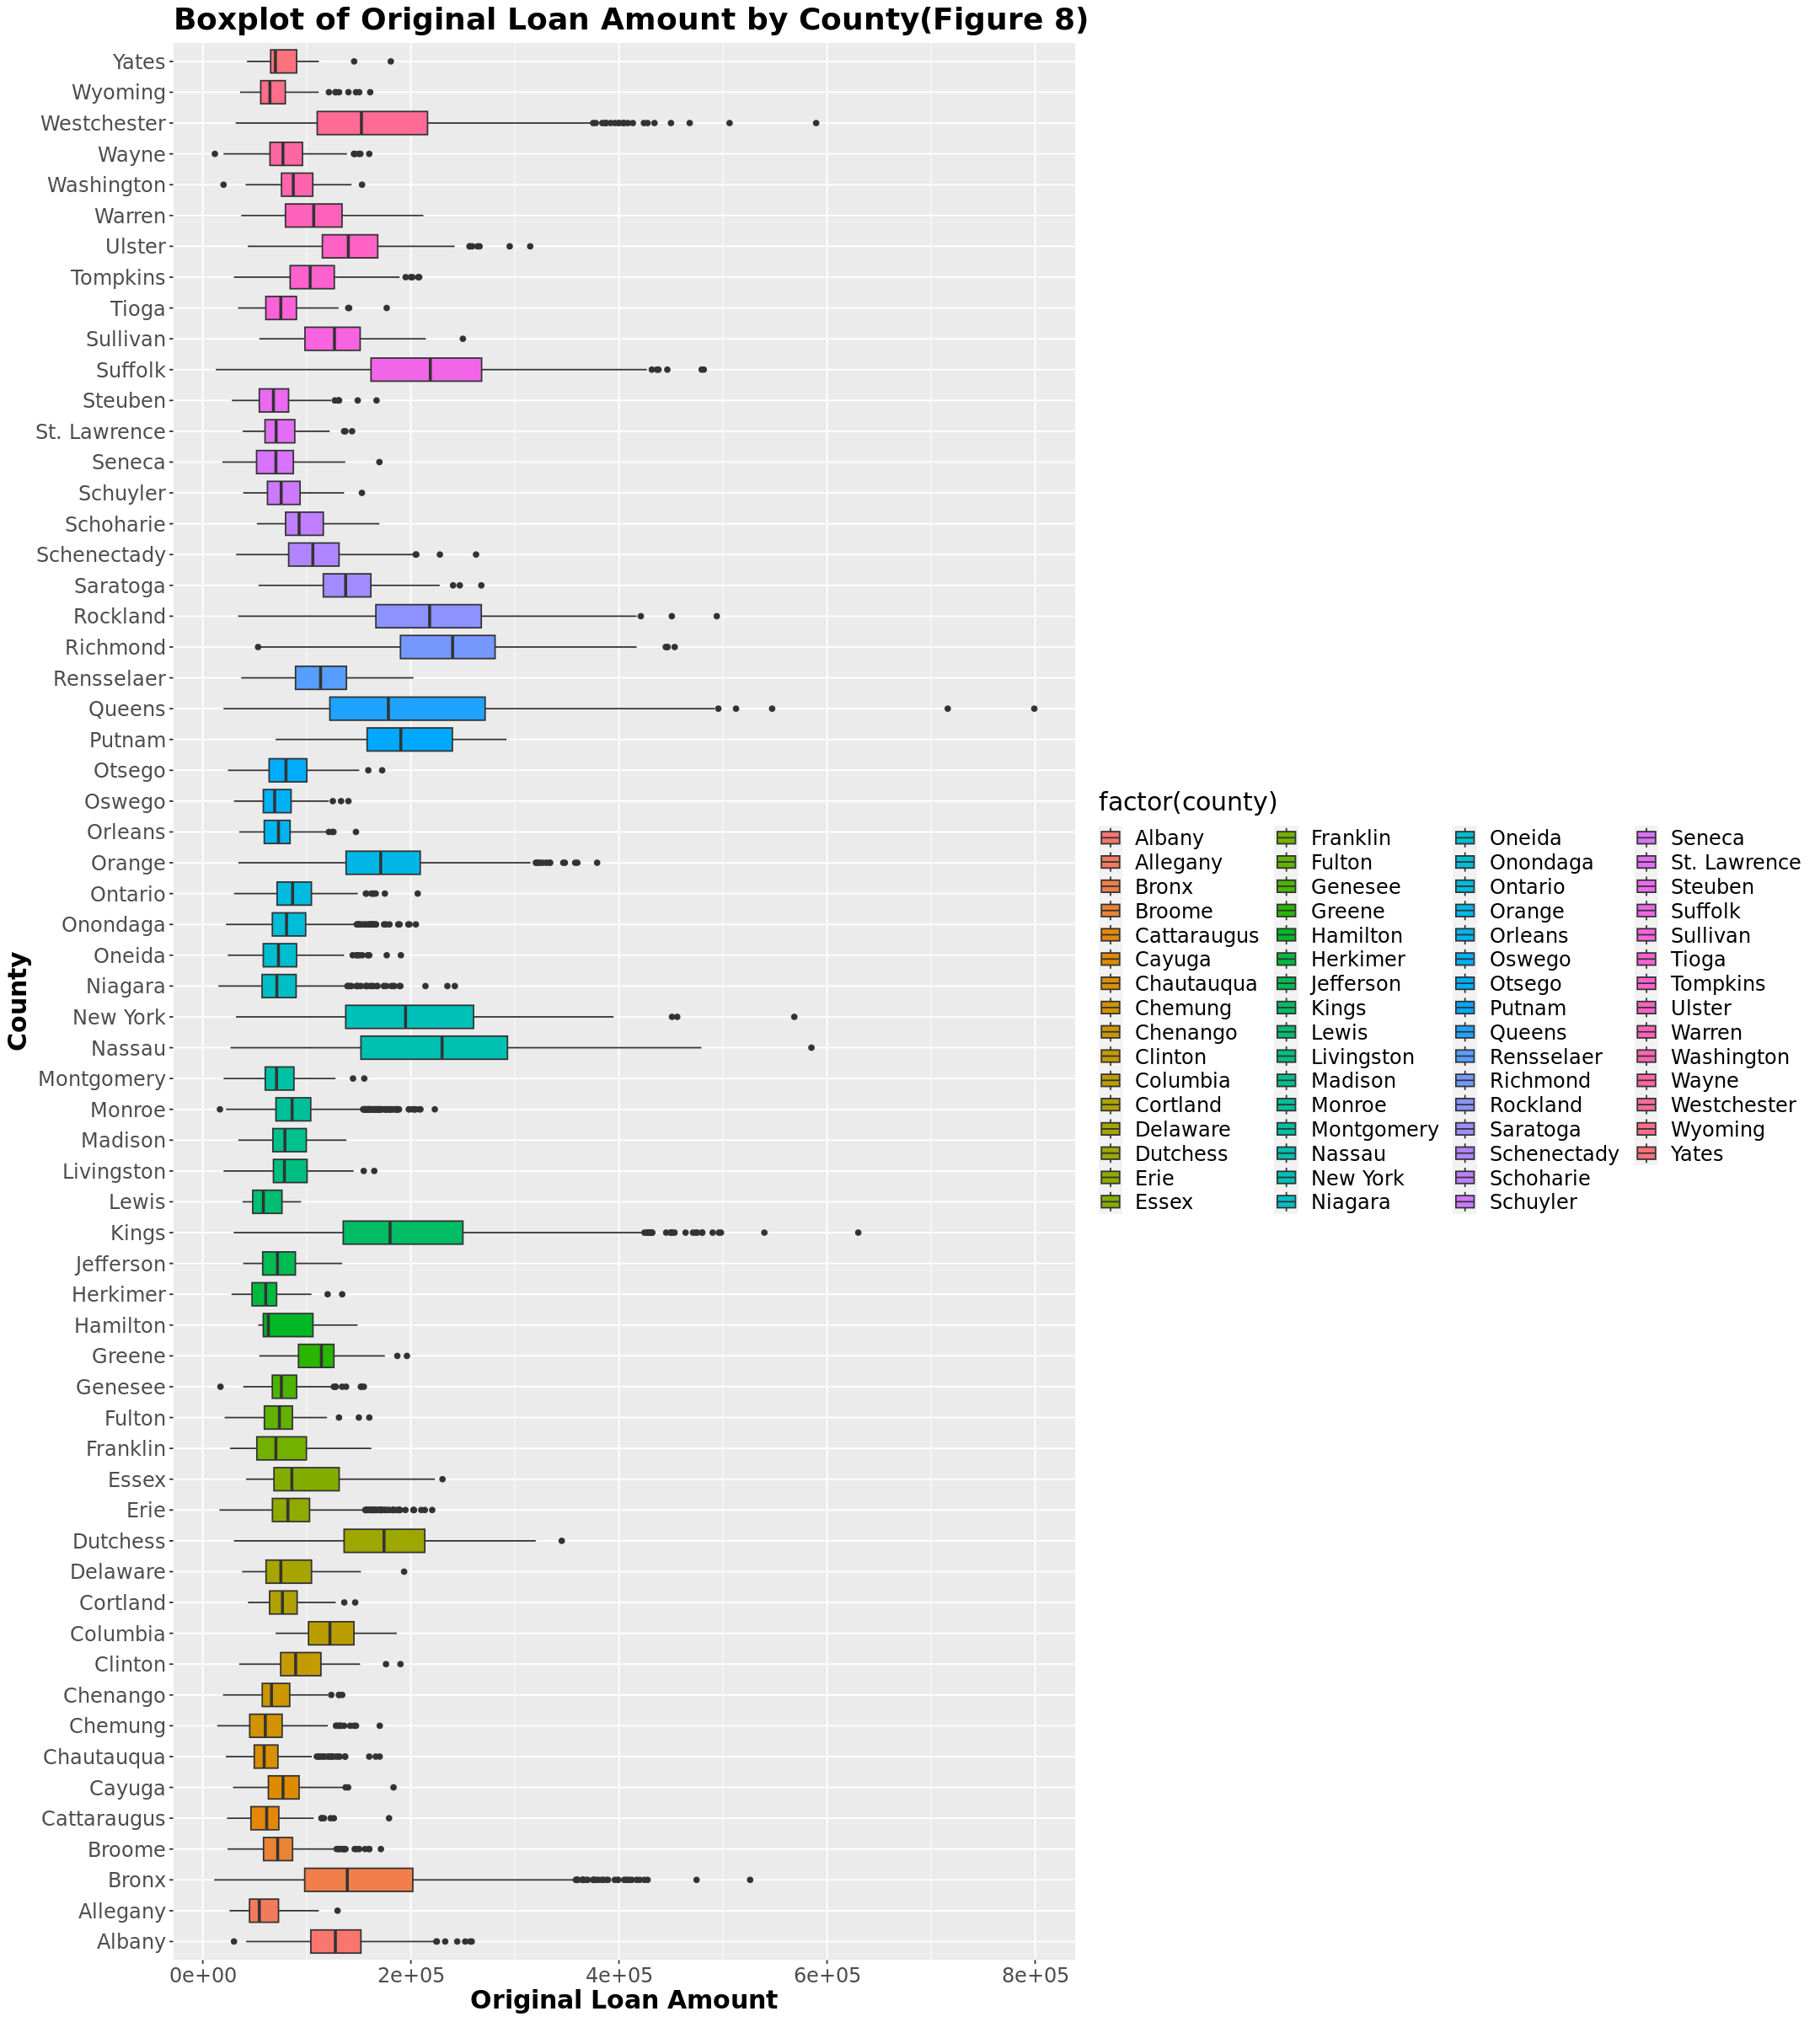

In [102]:
options(repr.plot.width = 18, repr.plot.height = 20) 

plot_original_loan_by_county <- 
    mortgage |>
    ggplot(aes(x = factor(county), y =  original_loan_amount, fill = factor(county))) +
    geom_boxplot() +
    ggtitle("Boxplot of Original Loan Amount by County(Figure 8)") +
    xlab("County") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) + coord_flip()

plot_original_loan_by_county

ggsave("./images/plot_original_loan_by_county.png", plot_original_loan_by_county, height = 20, width = 20 )

# Model Selection

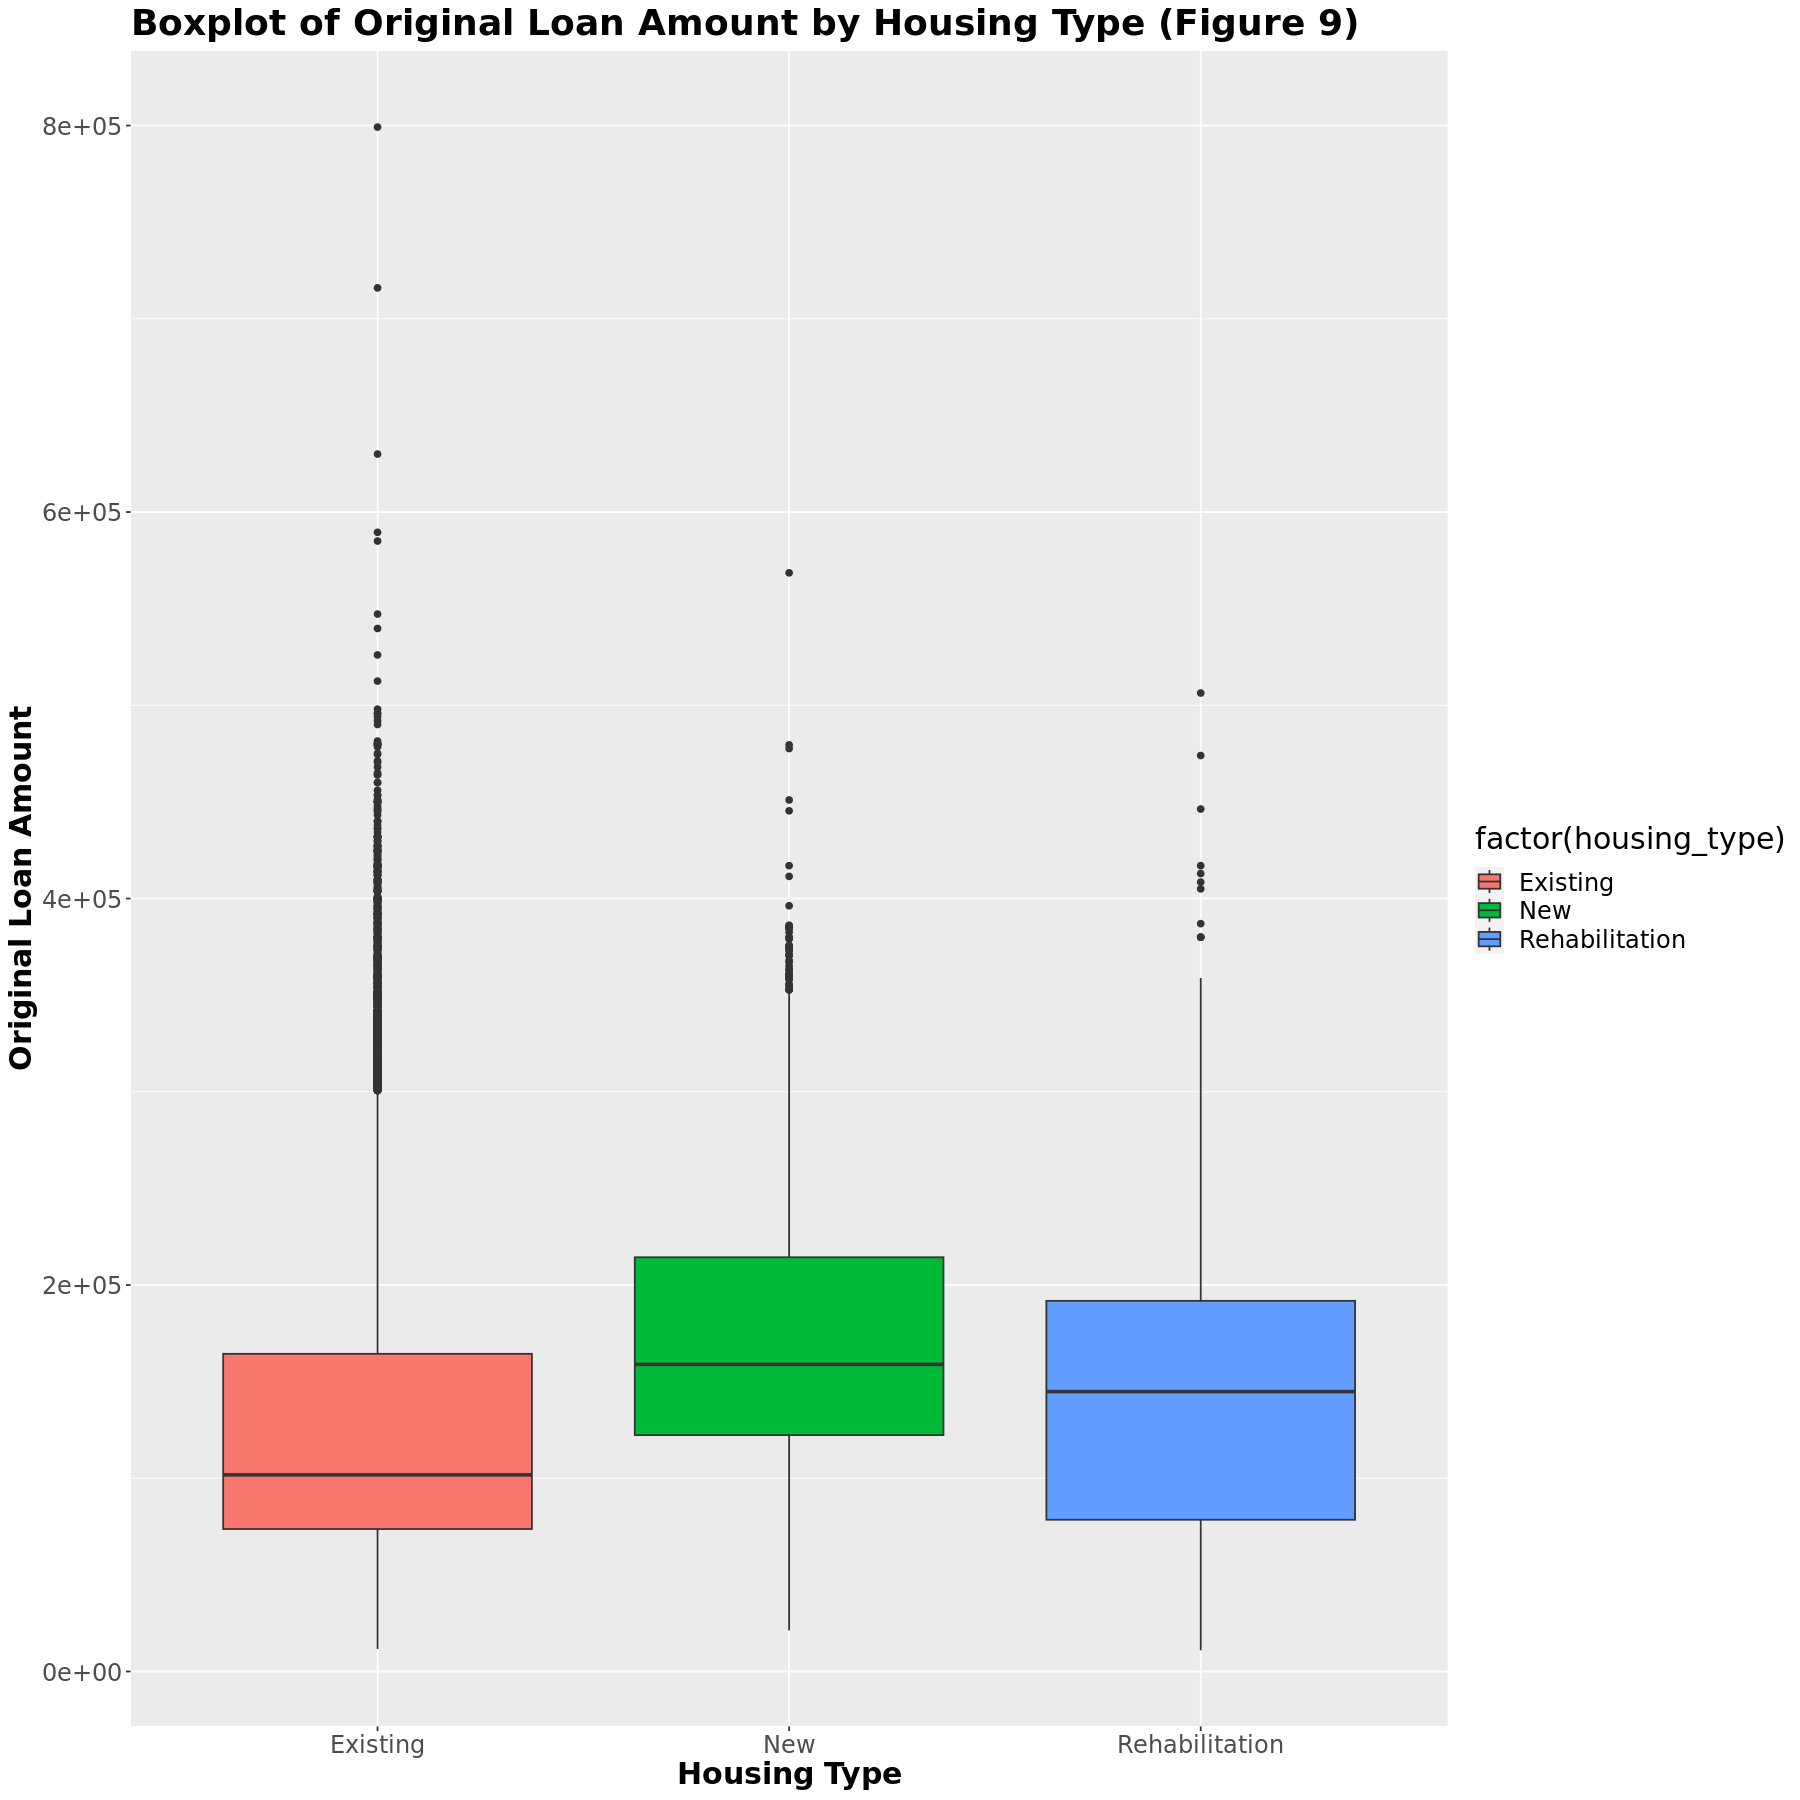

In [137]:
options(repr.plot.width = 15, repr.plot.height = 15) 

plot_original_loan_by_housing_type <- 
    mortgage |>
    ggplot(aes(x = factor(housing_type), y =  original_loan_amount, fill = factor(housing_type))) +
    geom_boxplot() +
    ggtitle("Boxplot of Original Loan Amount by Housing Type (Figure 9)") +
    xlab("Housing Type") +
    ylab("Original Loan Amount") +
    theme(
        text = element_text(size = 18),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) 

plot_original_loan_by_housing_type

ggsave("./images/plot_original_loan_by_housing_type.png", plot_original_loan_by_housing_type, height = 15, width = 15)

In [107]:
baseline_model <- lm(sqrt(original_loan_amount) ~., data = mortgage_clean)

summary(baseline_model)

# Use transformation for response variable
# cannot log(SONYMA_amount) since containing zeroes


Call:
lm(formula = sqrt(original_loan_amount) ~ ., data = mortgage_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-237.274  -27.795   -0.431   27.067  266.574 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -9.372e+03  2.011e+02 -46.610  < 2e-16 ***
purchase_year               4.744e+00  1.002e-01  47.349  < 2e-16 ***
original_loan_to_value      1.504e+00  3.117e-02  48.258  < 2e-16 ***
loan_typeStep               5.923e+01  2.684e+00  22.068  < 2e-16 ***
SONYMA_amount               1.085e-02  1.488e-04  72.899  < 2e-16 ***
original_term               1.971e-02  1.493e-02   1.320 0.186905    
countyAllegany             -1.015e+02  9.214e+00 -11.015  < 2e-16 ***
countyBronx                 8.523e+01  3.494e+00  24.393  < 2e-16 ***
countyBroome               -7.475e+01  2.977e+00 -25.113  < 2e-16 ***
countyCattaraugus          -9.594e+01  5.566e+00 -17.237  < 2e-16 ***
countyCayuga               -7.095e+0

In [109]:
png("qqplot_baseline_model.png", width = 800, height = 600)

qqnorm(residuals(baseline_model), main = "Q-Q Plot of Baseline Model")
qqline(residuals(baseline_model), col = "red")

dev.off()

# Using sqrt on response variable since it favors the normality assumption than log response variable

png: 2

In [111]:
options(repr.plot.width = 18, repr.plot.height = 14) 

png("residual_plot_baseline_model.png", width = 1100, height = 900)

plot(fitted(baseline_model), residuals(baseline_model),
     main = "Residual Plot for Baseline Model",
     xlab = "Fitted Values",
     ylab = "Residuals",
     pch = 20,
     col = rgb(0, 0, 0, 0.3))  # semi-transparent black
abline(h = 0, col = "red")

dev.off()

# Random, no pattern

png: 2

In [118]:
# Fixing the issue with model selection using regsubsets and accessing BIC values.

# Perform forward stepwise selection 
regfit_fwd <- regsubsets(sqrt(original_loan_amount) ~ ., data = mortgage_clean, nvmax = NULL, method = "forward")

# Summarize the regsubsets object to extract BIC values
regfit_fwd_summary <- summary(regfit_fwd)

# Get the model with the lowest BIC
best_model <- which.min(regfit_fwd_summary$bic)

# Extract the selected predictors from the best model
selected_predictors <- names(coef(regfit_fwd, best_model))[-1]  # Remove intercept
selected_predictors

'purchase_year' 'original_loan_to_value' 'loan_typeStep' 'SONYMA_amount' 'countyAllegany' 'countyBronx' 'countyBroome' 'countyCattaraugus' 'countyCayuga' 'countyChautauqua' 'countyChemung' 'countyChenango' 'countyClinton' 'countyColumbia' 'countyCortland' 'countyDelaware' 'countyDutchess' 'countyErie' 'countyEssex' 'countyFranklin' 'countyFulton' 'countyGenesee' 'countyGreene' 'countyHerkimer' 'countyJefferson' 'countyKings' 'countyLewis' 'countyLivingston' 'countyMadison' 'countyMonroe' 'countyMontgomery' 'countyNassau' 'countyNew York' 'countyNiagara' 'countyOneida' 'countyOnondaga' 'countyOntario' 'countyOrange' 'countyOrleans' 'countyOswego' 'countyOtsego' 'countyPutnam' 'countyQueens' 'countyRensselaer' 'countyRichmond' 'countyRockland' 'countySaratoga' 'countySchenectady' 'countySchoharie' 'countySchuyler' 'countySeneca' 'countySt. Lawrence' 'countySteuben' 'countySuffolk' 'countySullivan' 'countyTioga' 'countyTompkins' 'countyUlster' 'countyWarren' 'countyWashington' 'countyWayne' 'countyWestchester' 'countyWyoming' 'countyYates' 'num_of_units2 Family' 'num_of_units3 Family' 'num_of_units4 Family' 'property_typeCondominium' 'property_typeCooperative' 'housing_typeRehabilitation' 'household_size'

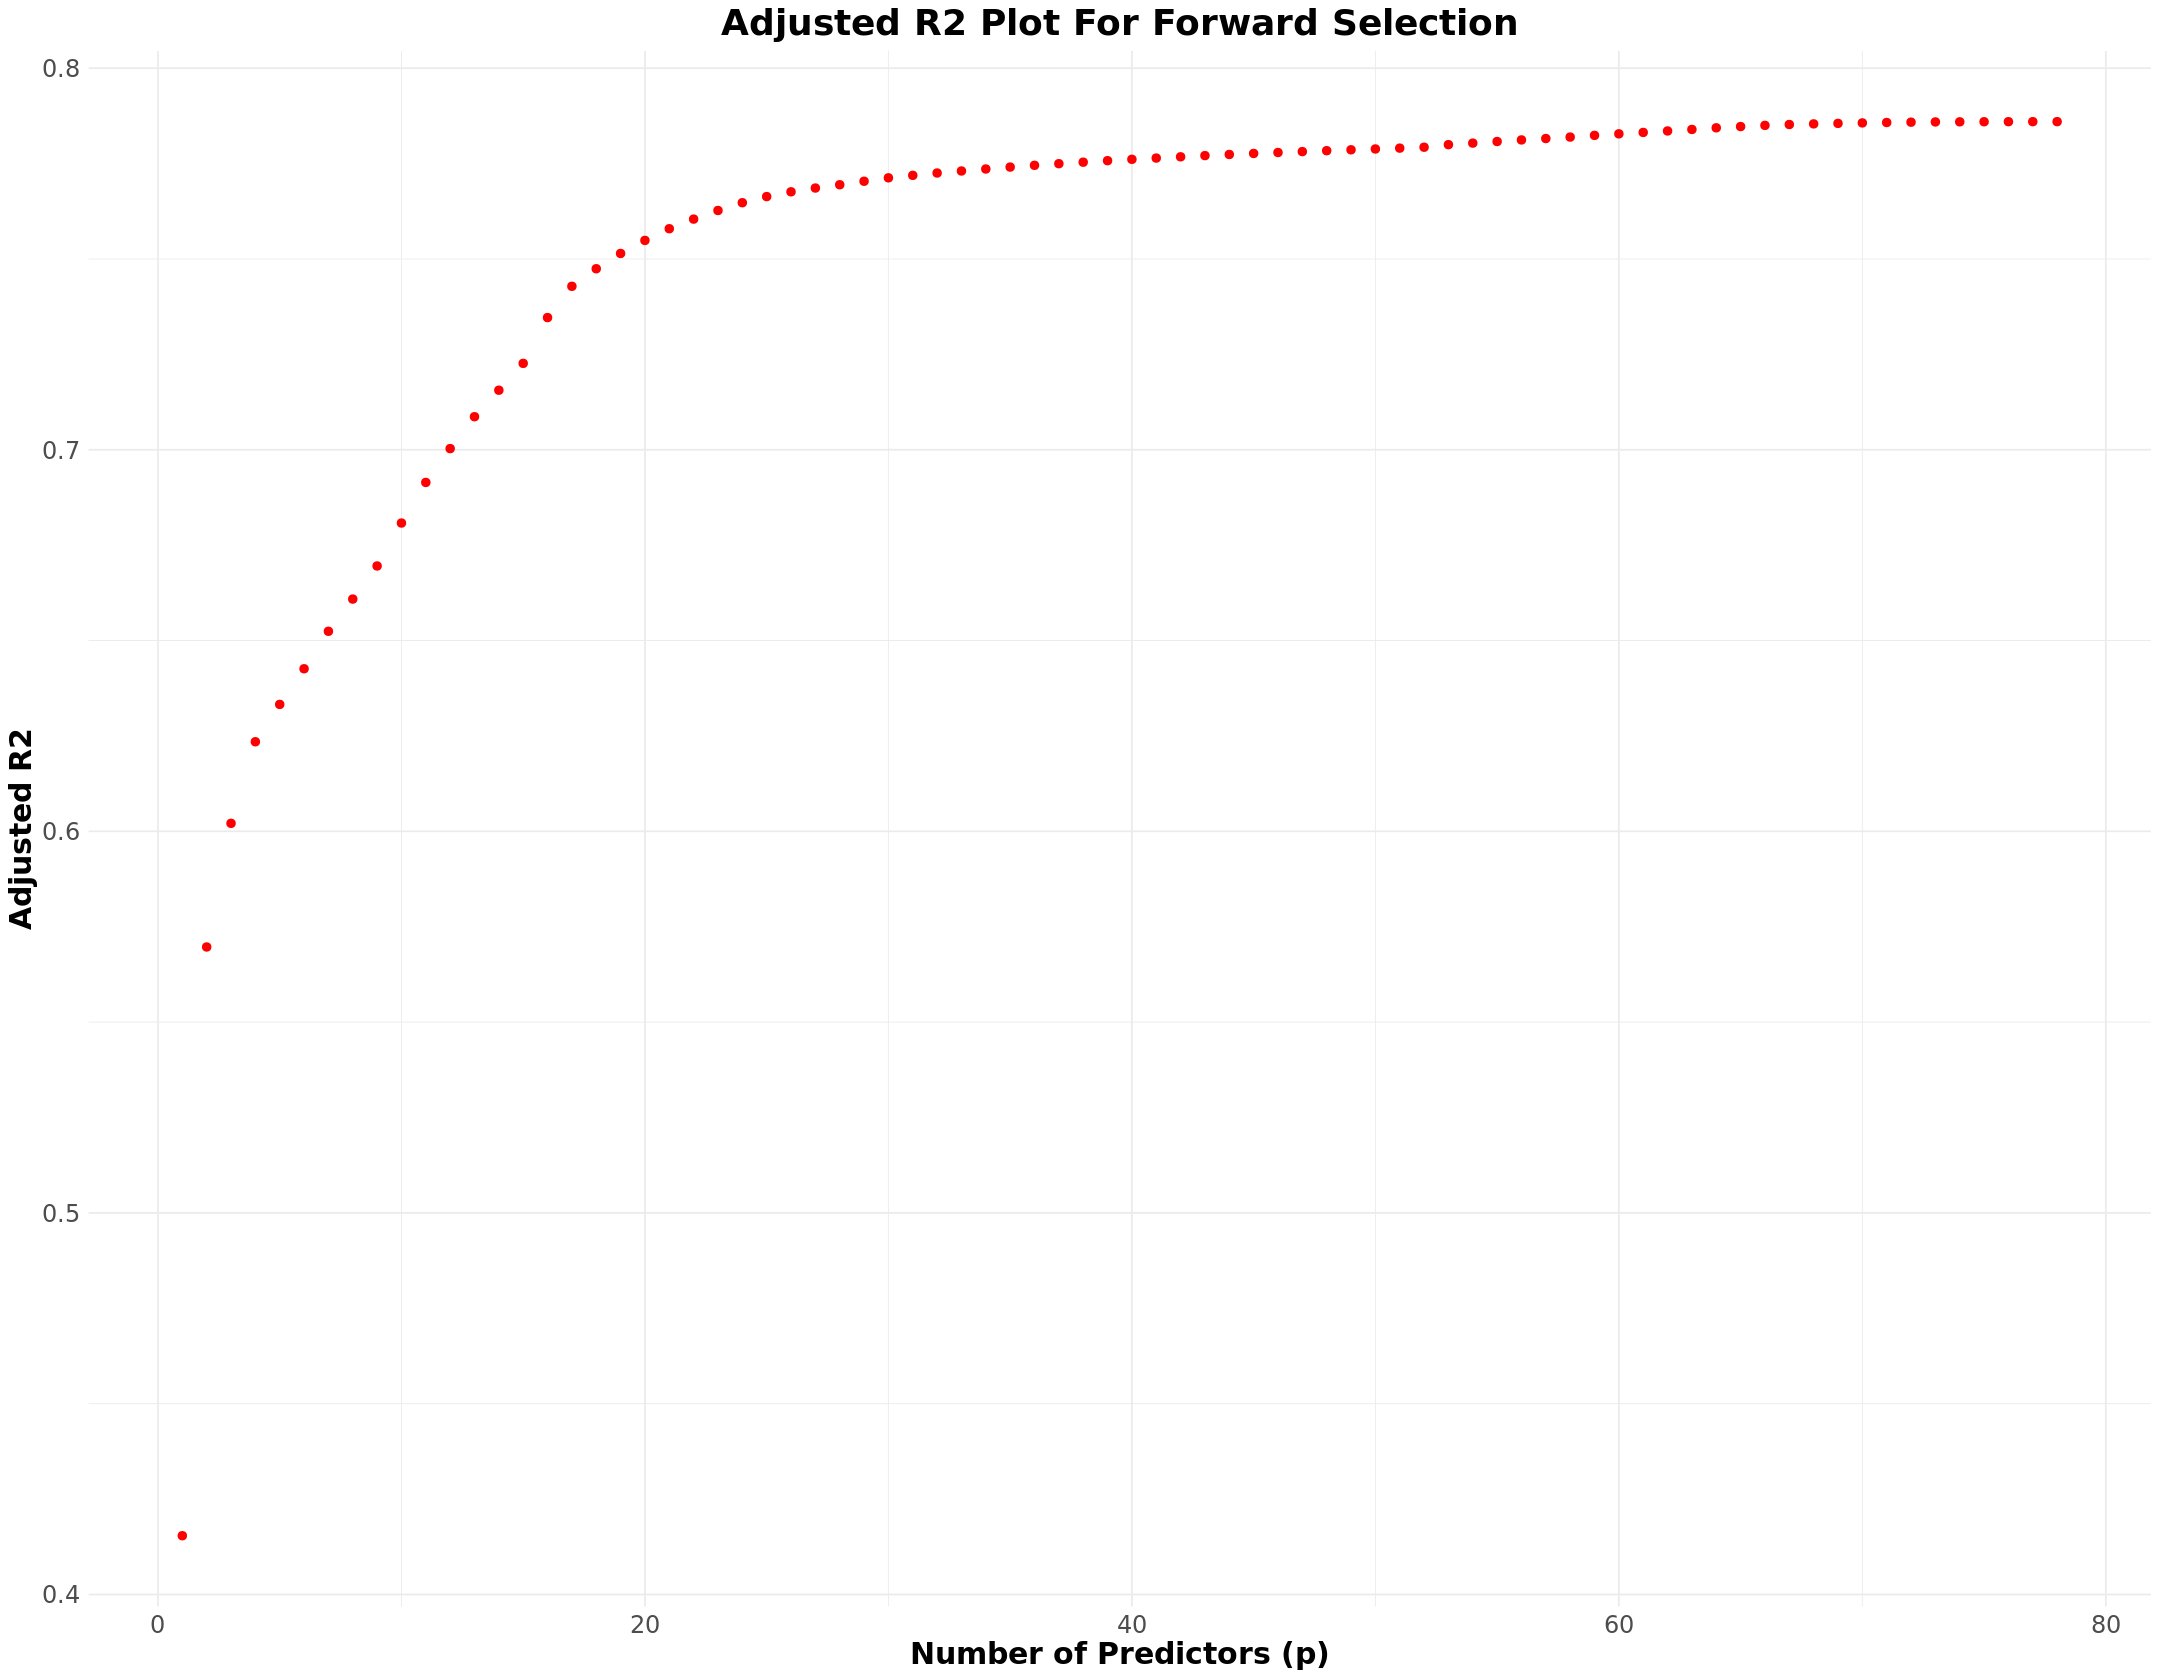

In [120]:
# Corrected code for the adjusted R2 plot for the forward selection model
reg_summary_fwd <- summary(regfit_fwd)


adjR2_values_fwd <- reg_summary_fwd$adjr2
num_predictors_fwd <- rowSums(reg_summary_fwd$which) - 1

# Create a data frame for plotting
plot_data_fwd <- data.frame(
  num_predictors = num_predictors_fwd,
  adjr2_values = adjR2_values_fwd
)

# Create the plot
Adjr2_plot_fwd <- ggplot(plot_data_fwd, aes(x = num_predictors, y = adjr2_values)) +
  geom_point(color = 'red', size = 2) +
  labs(
    x = "Number of Predictors (p)",
    y = "Adjusted R2",
    title = "Adjusted R2 Plot For Forward Selection"
  ) +
  theme_minimal() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold", hjust = 0.5),
    axis.title = element_text(face = "bold"))

Adjr2_plot_fwd

ggsave("./images/adjr2_plot_forward.png", Adjr2_plot_fwd, height = 15, width = 15)

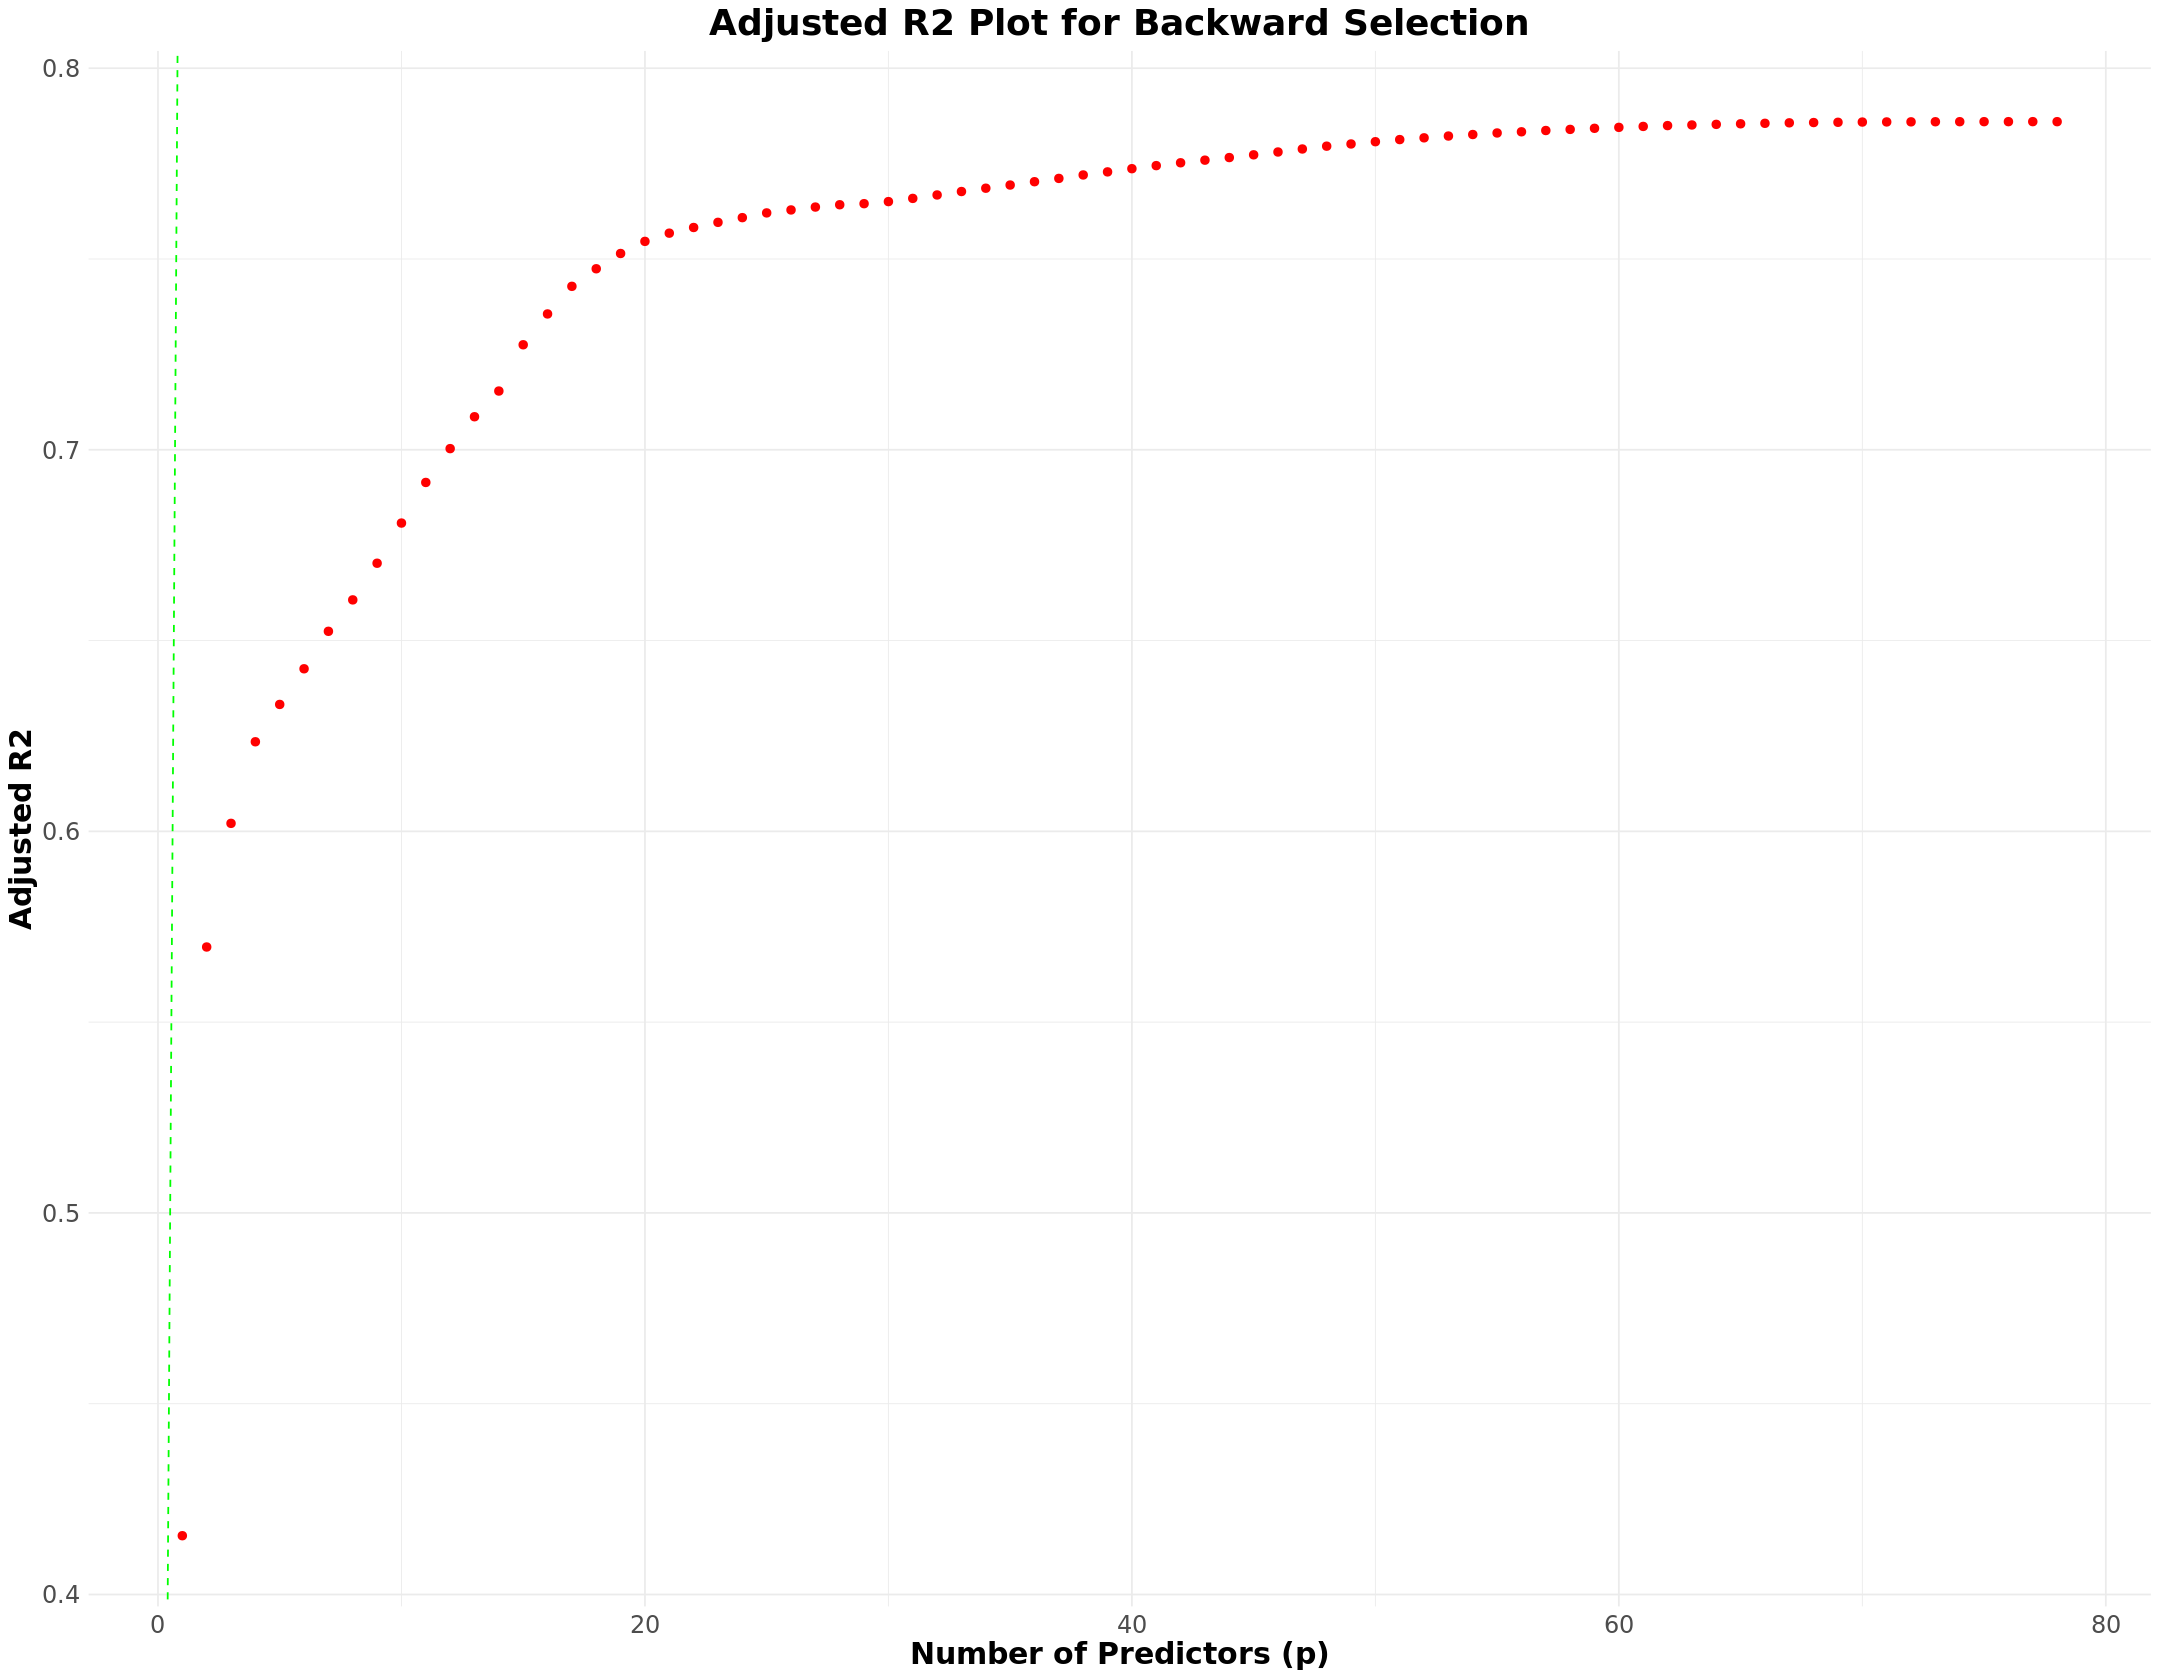

In [133]:
regfit_bwd <- regsubsets(sqrt(original_loan_amount) ~ ., data = mortgage_clean, nvmax = NULL, method = "backward")

reg_summary_bwd <- summary(regfit_bwd)

adjR2_bwd <- reg_summary_bwd$adjr2

num_predictors_bwd <- rowSums(reg_summary_bwd$which) - 1

plot_data_bwd <- data.frame(
  num_predictors = num_predictors_bwd,
  adjr2_values = adjR2_bwd
)
Adjr2_plot_bwd <- ggplot(plot_data_bwd, aes(x = num_predictors, y = adjR2_bwd)) +
  geom_point(color = 'red', size = 2) +
  geom_abline(intercept = 0, slope = 1, color = 'green', linetype = "dashed") +
  labs(
    x = "Number of Predictors (p)",
    y = "Adjusted R2",
    title = "Adjusted R2 Plot for Backward Selection"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
Adjr2_plot_bwd

ggsave("./images/adjr2_plot_backward_2.png", Adjr2_plot_bwd, height = 15, width = 15)

In [457]:
stepwise_model <- step(baseline_model, direction = "both", trace = FALSE)
summary(stepwise_model)$adj.r.squared

# Choose random covariates until reach the best model, getting same R^2 as the back and forward.

0.78598072924478

In [124]:
# Correcting the variable name in the regression formula
additive_model <- lm(sqrt(original_loan_amount) ~ ., data = mortgage_clean)
interact_model <- lm(sqrt(original_loan_amount) ~ . + SONYMA_amount * household_size + SONYMA_amount * original_term, data = mortgage_clean)
summary(additive_model)

# Choose additive model because principle of parsimony


Call:
lm(formula = sqrt(original_loan_amount) ~ ., data = mortgage_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-237.274  -27.795   -0.431   27.067  266.574 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -9.372e+03  2.011e+02 -46.610  < 2e-16 ***
purchase_year               4.744e+00  1.002e-01  47.349  < 2e-16 ***
original_loan_to_value      1.504e+00  3.117e-02  48.258  < 2e-16 ***
loan_typeStep               5.923e+01  2.684e+00  22.068  < 2e-16 ***
SONYMA_amount               1.085e-02  1.488e-04  72.899  < 2e-16 ***
original_term               1.971e-02  1.493e-02   1.320 0.186905    
countyAllegany             -1.015e+02  9.214e+00 -11.015  < 2e-16 ***
countyBronx                 8.523e+01  3.494e+00  24.393  < 2e-16 ***
countyBroome               -7.475e+01  2.977e+00 -25.113  < 2e-16 ***
countyCattaraugus          -9.594e+01  5.566e+00 -17.237  < 2e-16 ***
countyCayuga               -7.095e+0

In [125]:
cp_values_bwd <- reg_summary_bwd$cp
cp_values_bwd

36383.0670358941 21236.4396040029 18055.5245803361 15956.850476652 14996.7958472014 14079.9254038126 13116.464940057 12308.6397727197 11366.2393228241 10333.6749217454 9289.88139423995 8420.52321460508 7601.2967231586 6941.1522083226 5752.05813380669 4960.31769804822 4251.35789209957 3800.40612119356 3408.64947070126 3098.29213625418 2887.81446424908 2743.02951171312 2611.43511547105 2491.30294362913 2370.70892148202 2295.40594175624 2222.07099023751 2163.701717139 2136.94101706859 2084.45120514732 2003.32419101333 1915.98077455714 1828.44040757671 1744.26256113597 1663.71230987929 1579.10195712511 1495.30261691662 1407.58701737649 1329.6598795474 1248.31614159674 1170.62947946276 1098.43183987167 1032.27071542892 966.620783033894 897.168619090418 825.563559667851 749.235769407434 677.875012652788 622.449703469269 565.250693277154 511.716748072216 467.709285101493 422.564007157303 384.622200239413 345.975475981872 316.642321716041 284.74941857114 257.171543487304 230.376882715955 207.172724734228 184.090415050745 163.696196830122 148.632138448676 134.269992009635 120.640944903953 109.074723762773 97.7702807234964 91.3484424603121 85.8797442761934 80.691135433186 78.8399177628889 77.2925582378557 76.0622025882039 75.4804419356442 75.7565581267336 76.4023325608796 77.0823526734275 79

In [126]:
cp_values_fwd <- reg_summary_fwd$cp
cp_values_fwd



36383.0670358941 21236.4396040029 18055.5245803361 15956.850476652 14996.7958472014 14079.9254038126 13116.464940057 12288.3144333863 11437.4608202597 10333.6749217454 9289.88139423994 8420.52321460507 7601.2967231586 6920.65266292832 6231.13672146271 5054.69890997462 4251.35789209958 3800.40612119356 3408.64947070126 3073.9861345127 2774.47694023567 2528.11076424009 2307.26602764924 2108.61882583859 1951.88846324941 1830.10569689846 1734.31557608619 1650.44894568745 1561.70397327746 1474.80170476196 1412.3260665368 1352.78935375711 1301.7930112969 1251.32600432105 1203.0477268202 1158.77261973387 1117.80233708013 1080.31141821882 1042.25985368824 1008.90894232615 977.292038339569 946.147383577842 916.183884155602 888.053607269703 862.917065851536 839.235672930889 817.051191917126 794.646402322953 772.595508386854 752.640656564938 732.185945433575 709.617805824411 644.570560033957 605.953845795626 566.005995293723 526.557014376991 491.366483565802 455.069423322606 412.316136625002 373.929080720074 338.790794836063 302.010453118579 264.734835322153 223.524217393988 192.148287850243 163.034702461027 141.740815663892 126.69770280283 115.080176623349 103.617633093665 94.259003106712 87.1055103988692 81.8573523017258 79.9101080240835 78.6724862148876 78.0991554647662 78.3690542880613 79

In [127]:
#reg_summary

# Finding out choose which covariates but choose all (includes all of the counties)

In [130]:
# Correcting the Cp plot by directly using cp_values from the forward or backward stepwise selection

# Use cp_values_bwd or cp_values_fwd based on the model approach you'd like to visualize
cp_values <- cp_values_bwd  # You can replace this with cp_values_fwd if needed

png("cp_plot_model_selection.png", width = 800, height = 600)

plot(cp_values, type = "b", pch = 19,
     xlab = "Number of Predictors",
     ylab = "Mallow's Cp",
     main = "Model Selection Using Cp")

dev.off()

# Final answer is 79 predictors based on the plot since p = Cp = 79 at that point 
# => All backward, forward and stepwise with same R^2 and Cp favor full model => Choose full model

png: 2

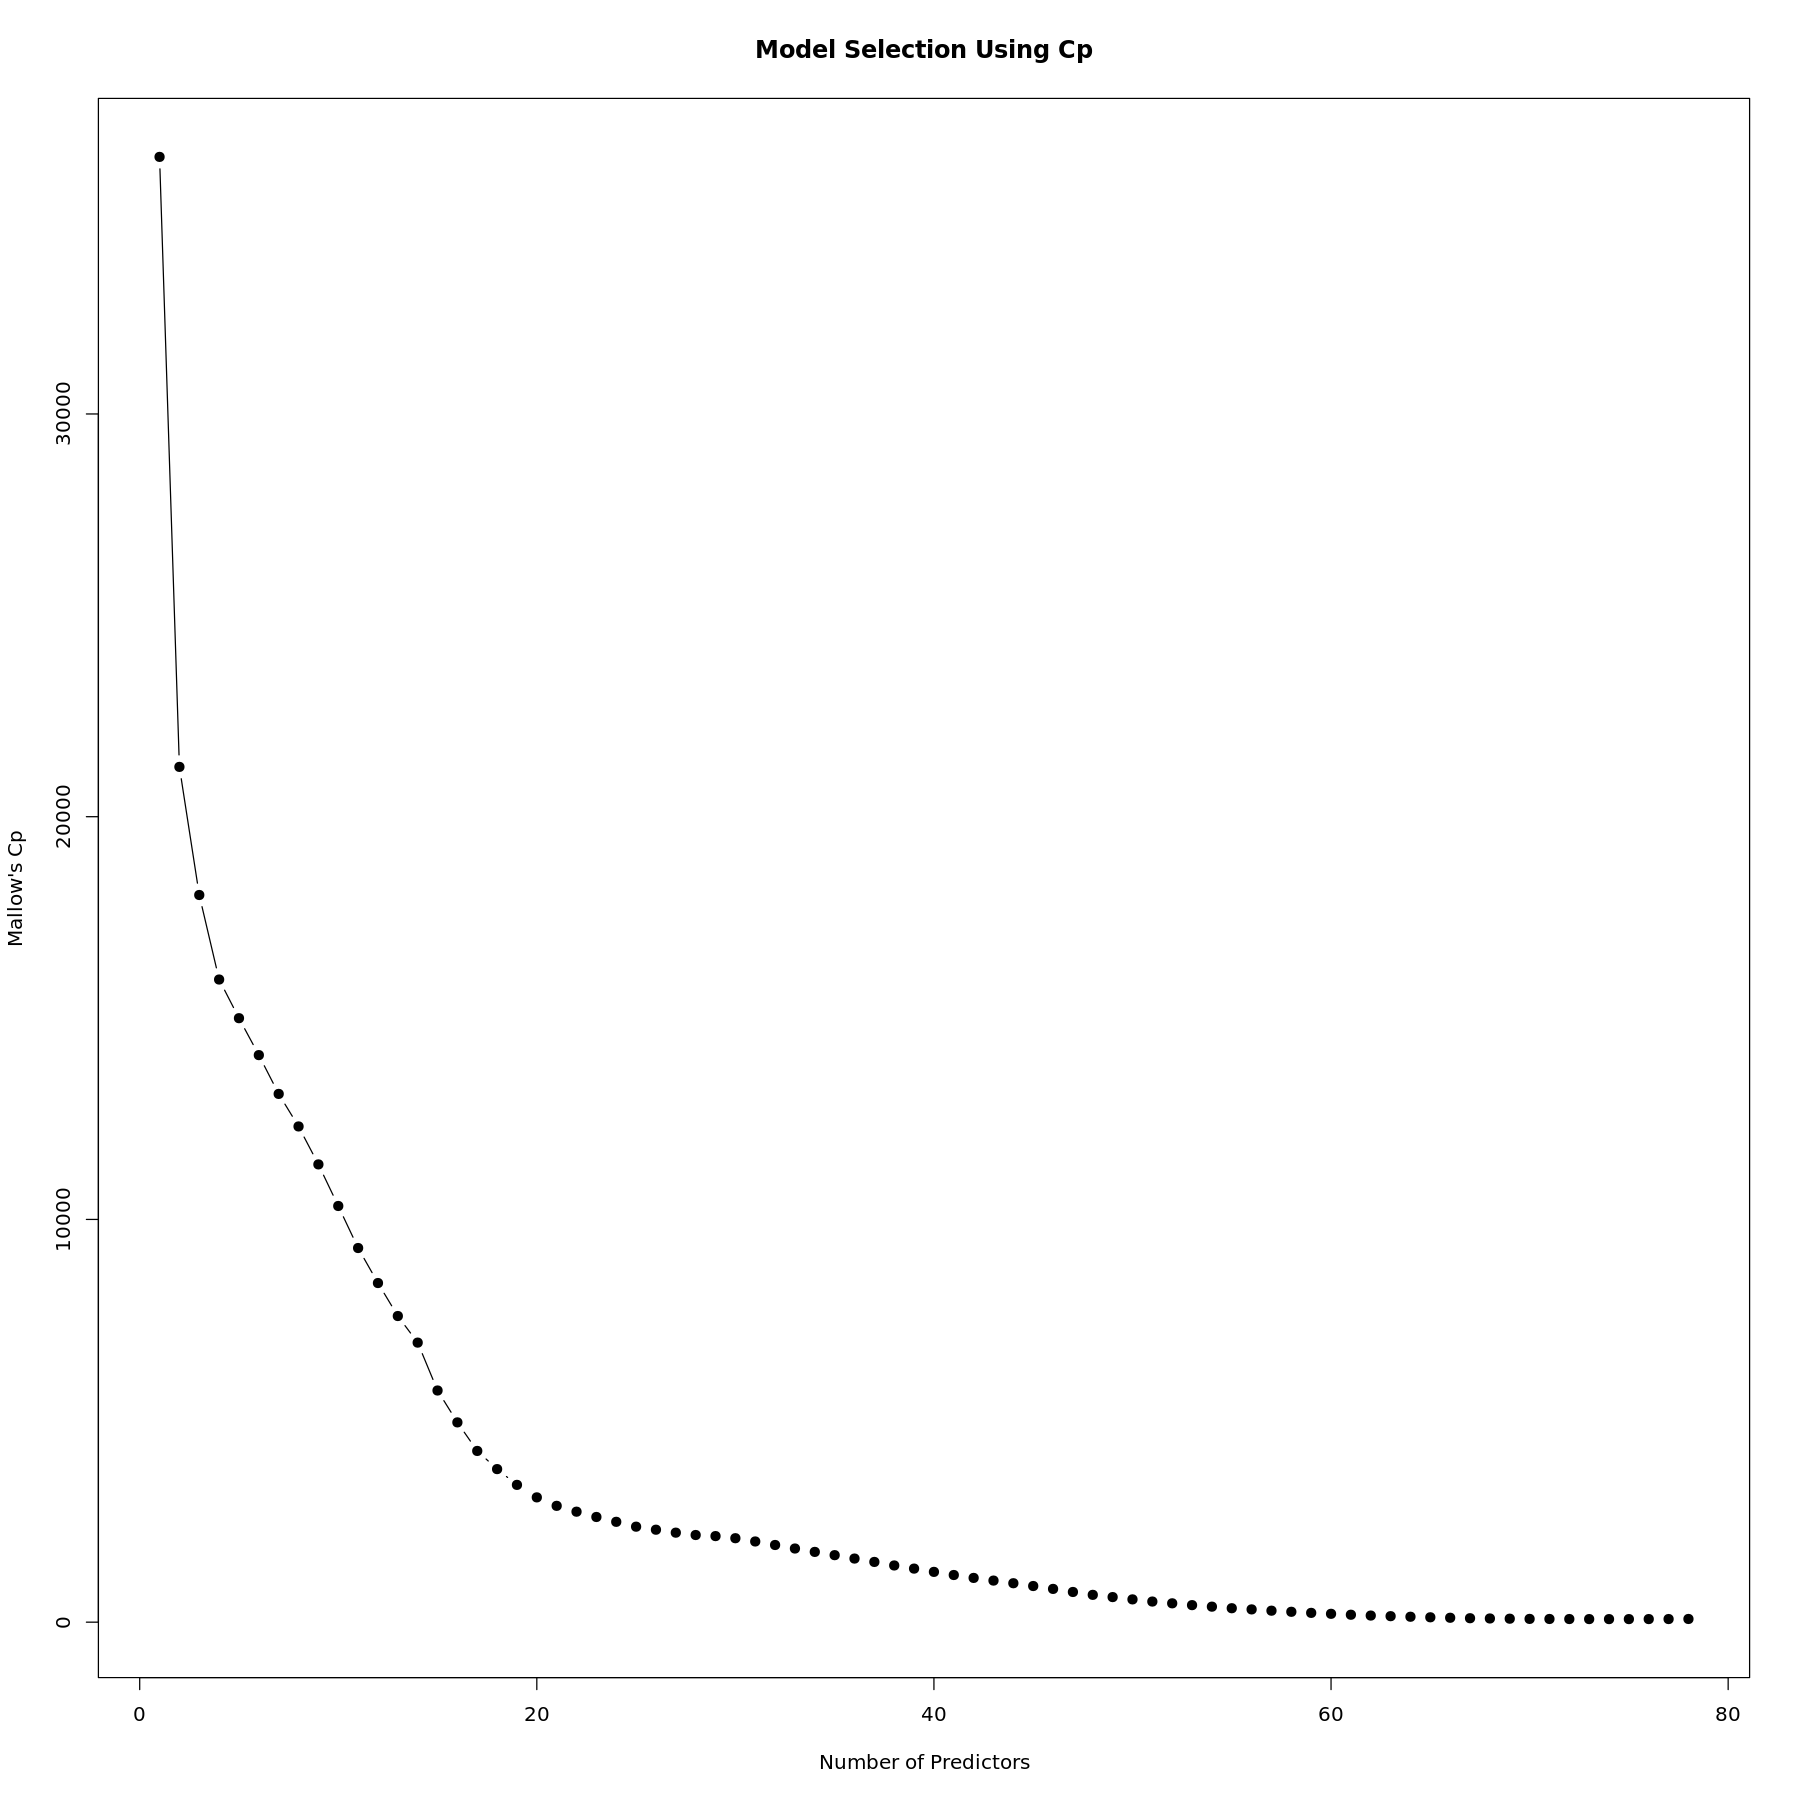

In [138]:
plot(cp_values, type = "b", pch = 19,
     xlab = "Number of Predictors",
     ylab = "Mallow's Cp",
     main = "Model Selection Using Cp")

# New Final Report

# Title

## I. Introduction

Mortgage loans play a significant role in shaping housing affordability, and we will explore their crucial influence in one of the largest and most economically diverse cities in the U.S. This project aims to explain the dynamics of mortgage loan amount to borrowers in the counties of New York state, U.S., that offered by the State of New York Mortgage Agency (SONYMA) with regards to their backgrounds such as household size, the type of property they desire and their financial background. Doing so, we will be able to provide someone who is looking for a mortgage loan in New York with SONYMA data-driven evidence on how their geolocation and personal background and their specific situations affect the amount of loan they may receive.

## II. Data Analysis

### IIa. Data Information

The data we are using is published by the State of New York under Open Data NY. It can be found on
[https://data.ny.gov/Economic-Development/State-of-New-York-Mortgage-Agency-SONYMA-Loans-Pur/2
2ew-dxez/about_data]

The specific information about the variables being explored are as follows:
- **Original Loan Amount (Numeric)**: The response variable which is the original mortgage amount borrowed encoded in US dollars.
- **SONYMA DPAL/CCAL Amount (Numeric)**: the amount of DPAL/CCAL support offered by SONYMA encoded in US dollars.
- **Bond Series (Text)**: The bond series from which used by SONYMA to purchase the mortgage encoded as a categorical variable with 120 categories.
- **Loan Purchase Date (Text)**: The date the loan is purchased by SONYMA from the original mortgage lender.
- **Purchase Year (Numeric)**: The year the loan is purchased by SONYMA from the original mortgage lender.
- **Original Loan To Value (Numeric)**: The ratio of the original mortgage loan and the value of the house encoded as 0-100 ratio.
- **Loan Type (Text)**: The type of mortgage loan provided to the homebuyer encoded as a categorical variable with 2 categories.
- **Original Term (Numeric)**: The term length of the mortgage provided to the homebuyer in days.
- **County (Text)**: The county where the house being mortgaged is located.
- **FIPS Code (Numeric)**: The numeric equivalent to County.
- **Number of Units (Text)**: The number of units being funded by the mortgage.
- **Property Type (Text)**: The type of property being funded by the mortgage encoded as a categorical variable with 7 categories.
- **Housing Type (Text)**: The construction status of the house(s) being funded by the mortgage encoded as a categorical variable with 3 categories.
- **Household Size (Numeric)**: The number of person(s) living in the house funded by the mortgage.

## Data Cleaning
The original dataset contains Nulls in the SONYMA amount with around 26.3% (7516/28528). Choosing the loan amount as the response variable, it significantly depends on the SONYMA amount because as stated in the overview of the dataset, the SONYMA amount column implicitly represent the borrower financial background: credits report, income information, bank statements, property appraisals, etc. The correlation heat map below will show more detailedly other numeric explanatory will affect the response variable loan amount.

## EDA

As examining the loan amount that a borrower can get based on their application and SONYMA additional form assessment. We believe that the "Bond Series" and "Number of Units" columns are extraneous because it relates to how SONYMA operates their organization (as the special purpose enity of the government to manage the mortgage responsibilities according to the overview file of the data can be found in the link above). Moreover, the date that the loan purchased by SONYMA is discarded because it is considered to be irrelavent since we will keep the year column which is more meaningful for our research. The Loan type also seems to be inessential because 98% of 28528 the transactions have the same type. We also dropping the FIPS Code column because it is the numeric representation of the County that is more rational to use as Text type.

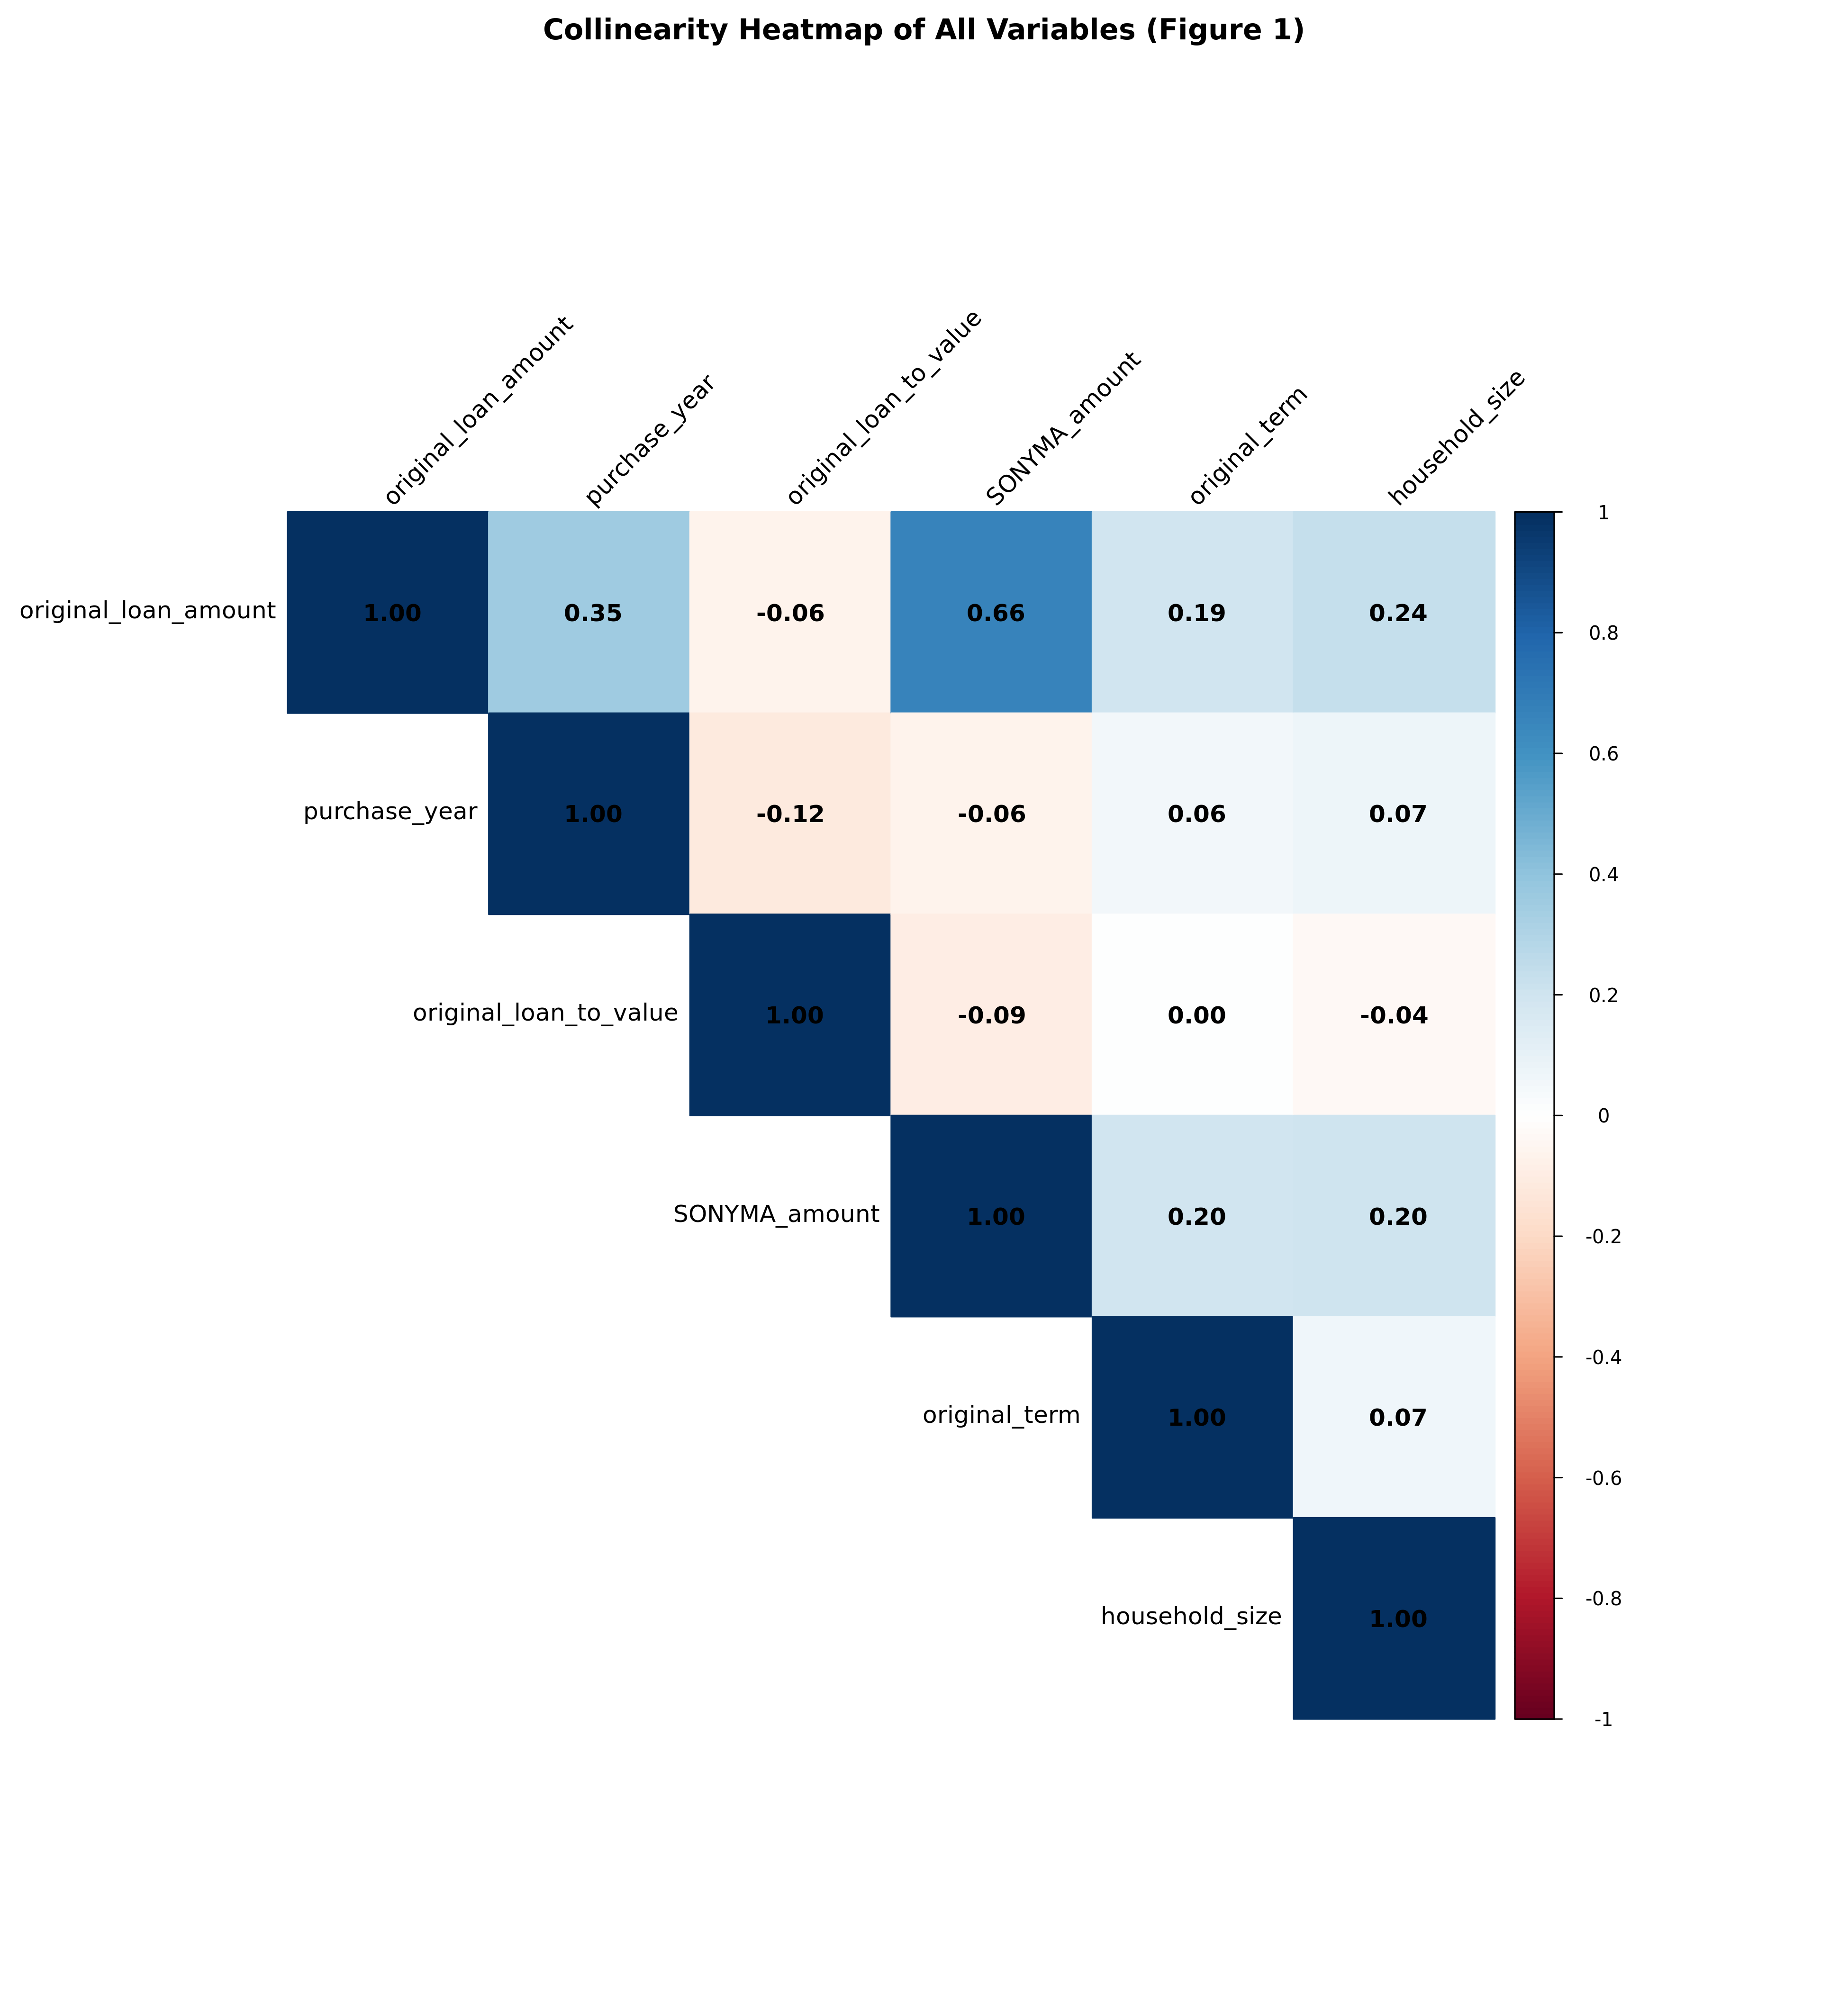

The heat map shows the correlation of each numeric covariates against each other. The SONYMA amount has the highest correlation of 0.66 with the original loan amount as expected because it implicitly represents the financial background of the borrowers which is the most important criterion to evaluate and determine the amount of loan a borrower can access. Moreover, the year when the borrowers asking for the loan, their family size and original term seems also to affect the amount of loan they can get.

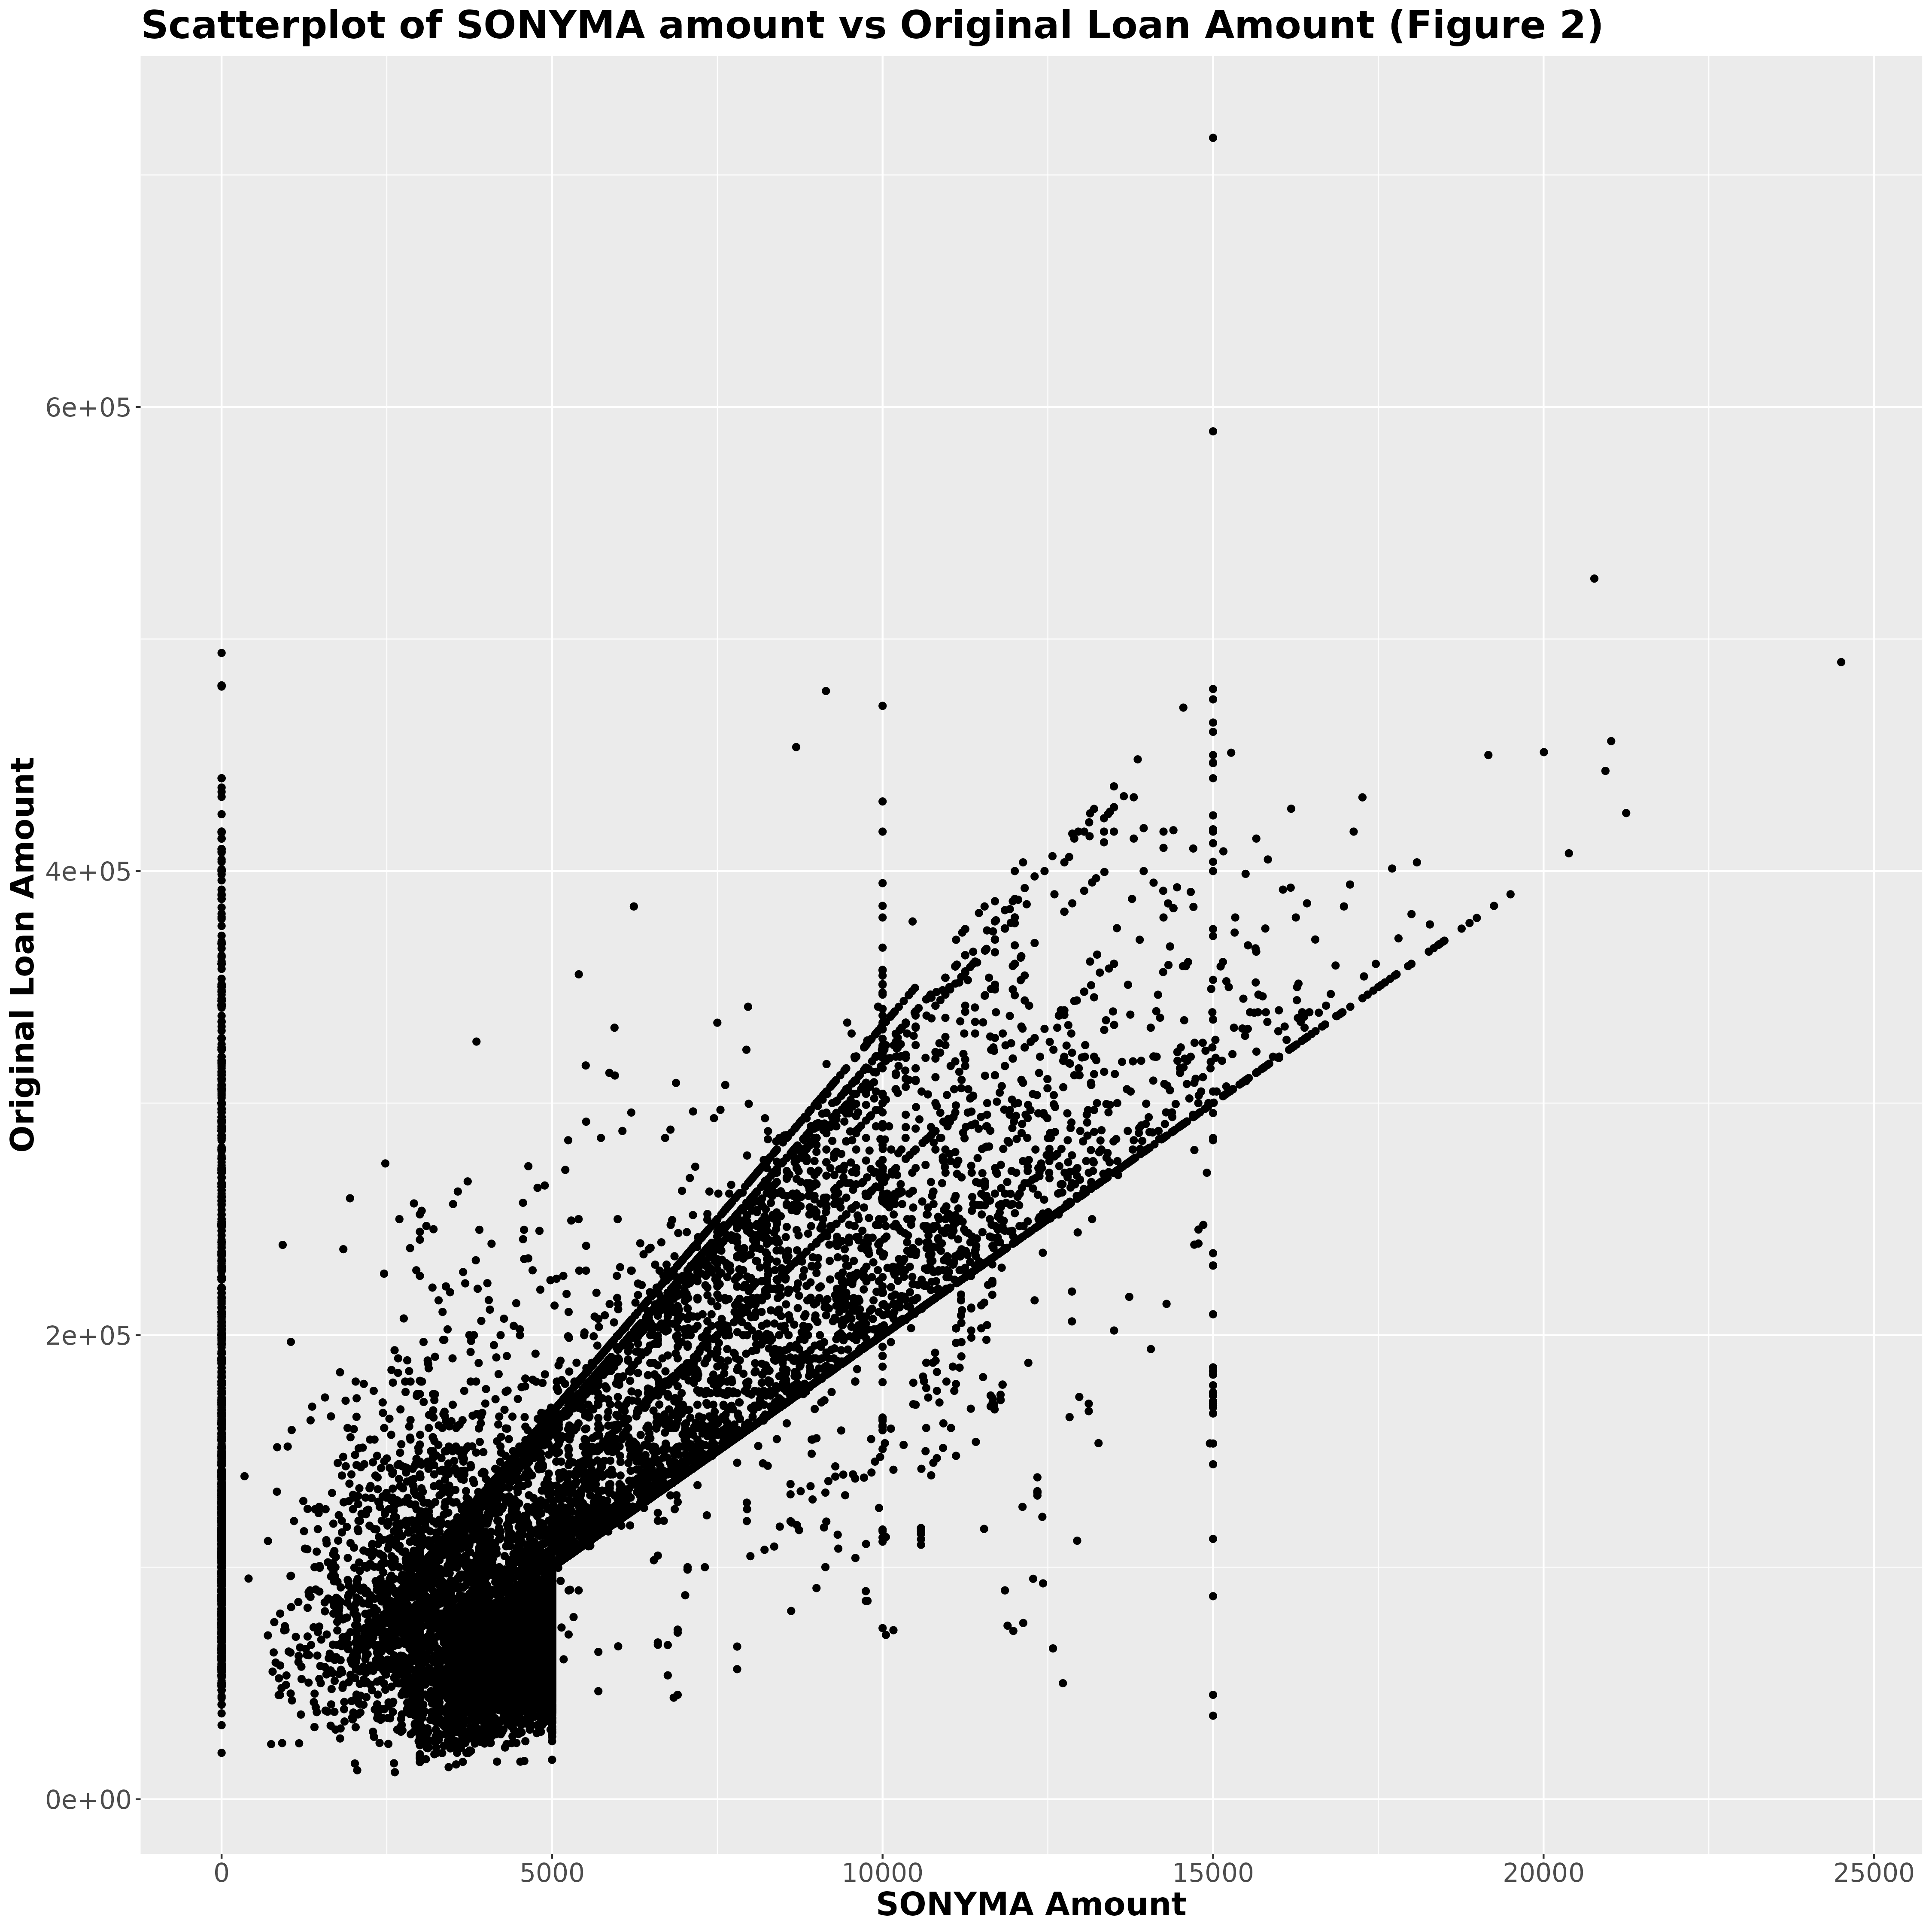

From the plot, we can see that there is a strong correlation between SONYMA amount and the original loan amount:


 - SONYMA amount increase with the original loan amount as larger loan typically receives more SONYMA amount

Cluster near origin: 


 - There is a cluster of data points in the lower left corner (small SONYMA amount and small original loan amount), this suggest that many loans are received with little to no SONYMA amount and a high number of people have low mortgage amount

Vertical lines at SONYMA amount = 0:


 - There's a thick vertical line at SONYMA amount = 0, meaning many borrowers received no SONYMA support regardless of their loan amount.
 - Those points spread widely in the y-direction (loan amount), implying SONYMA doesn't always contribute to all loans.


The plot shows banding lines radiating out, which could indicate:

 - Discrete levels of SONYMA support (e.g., fixed grant brackets).
 - Rounding or policy-driven thresholds in support allocation.


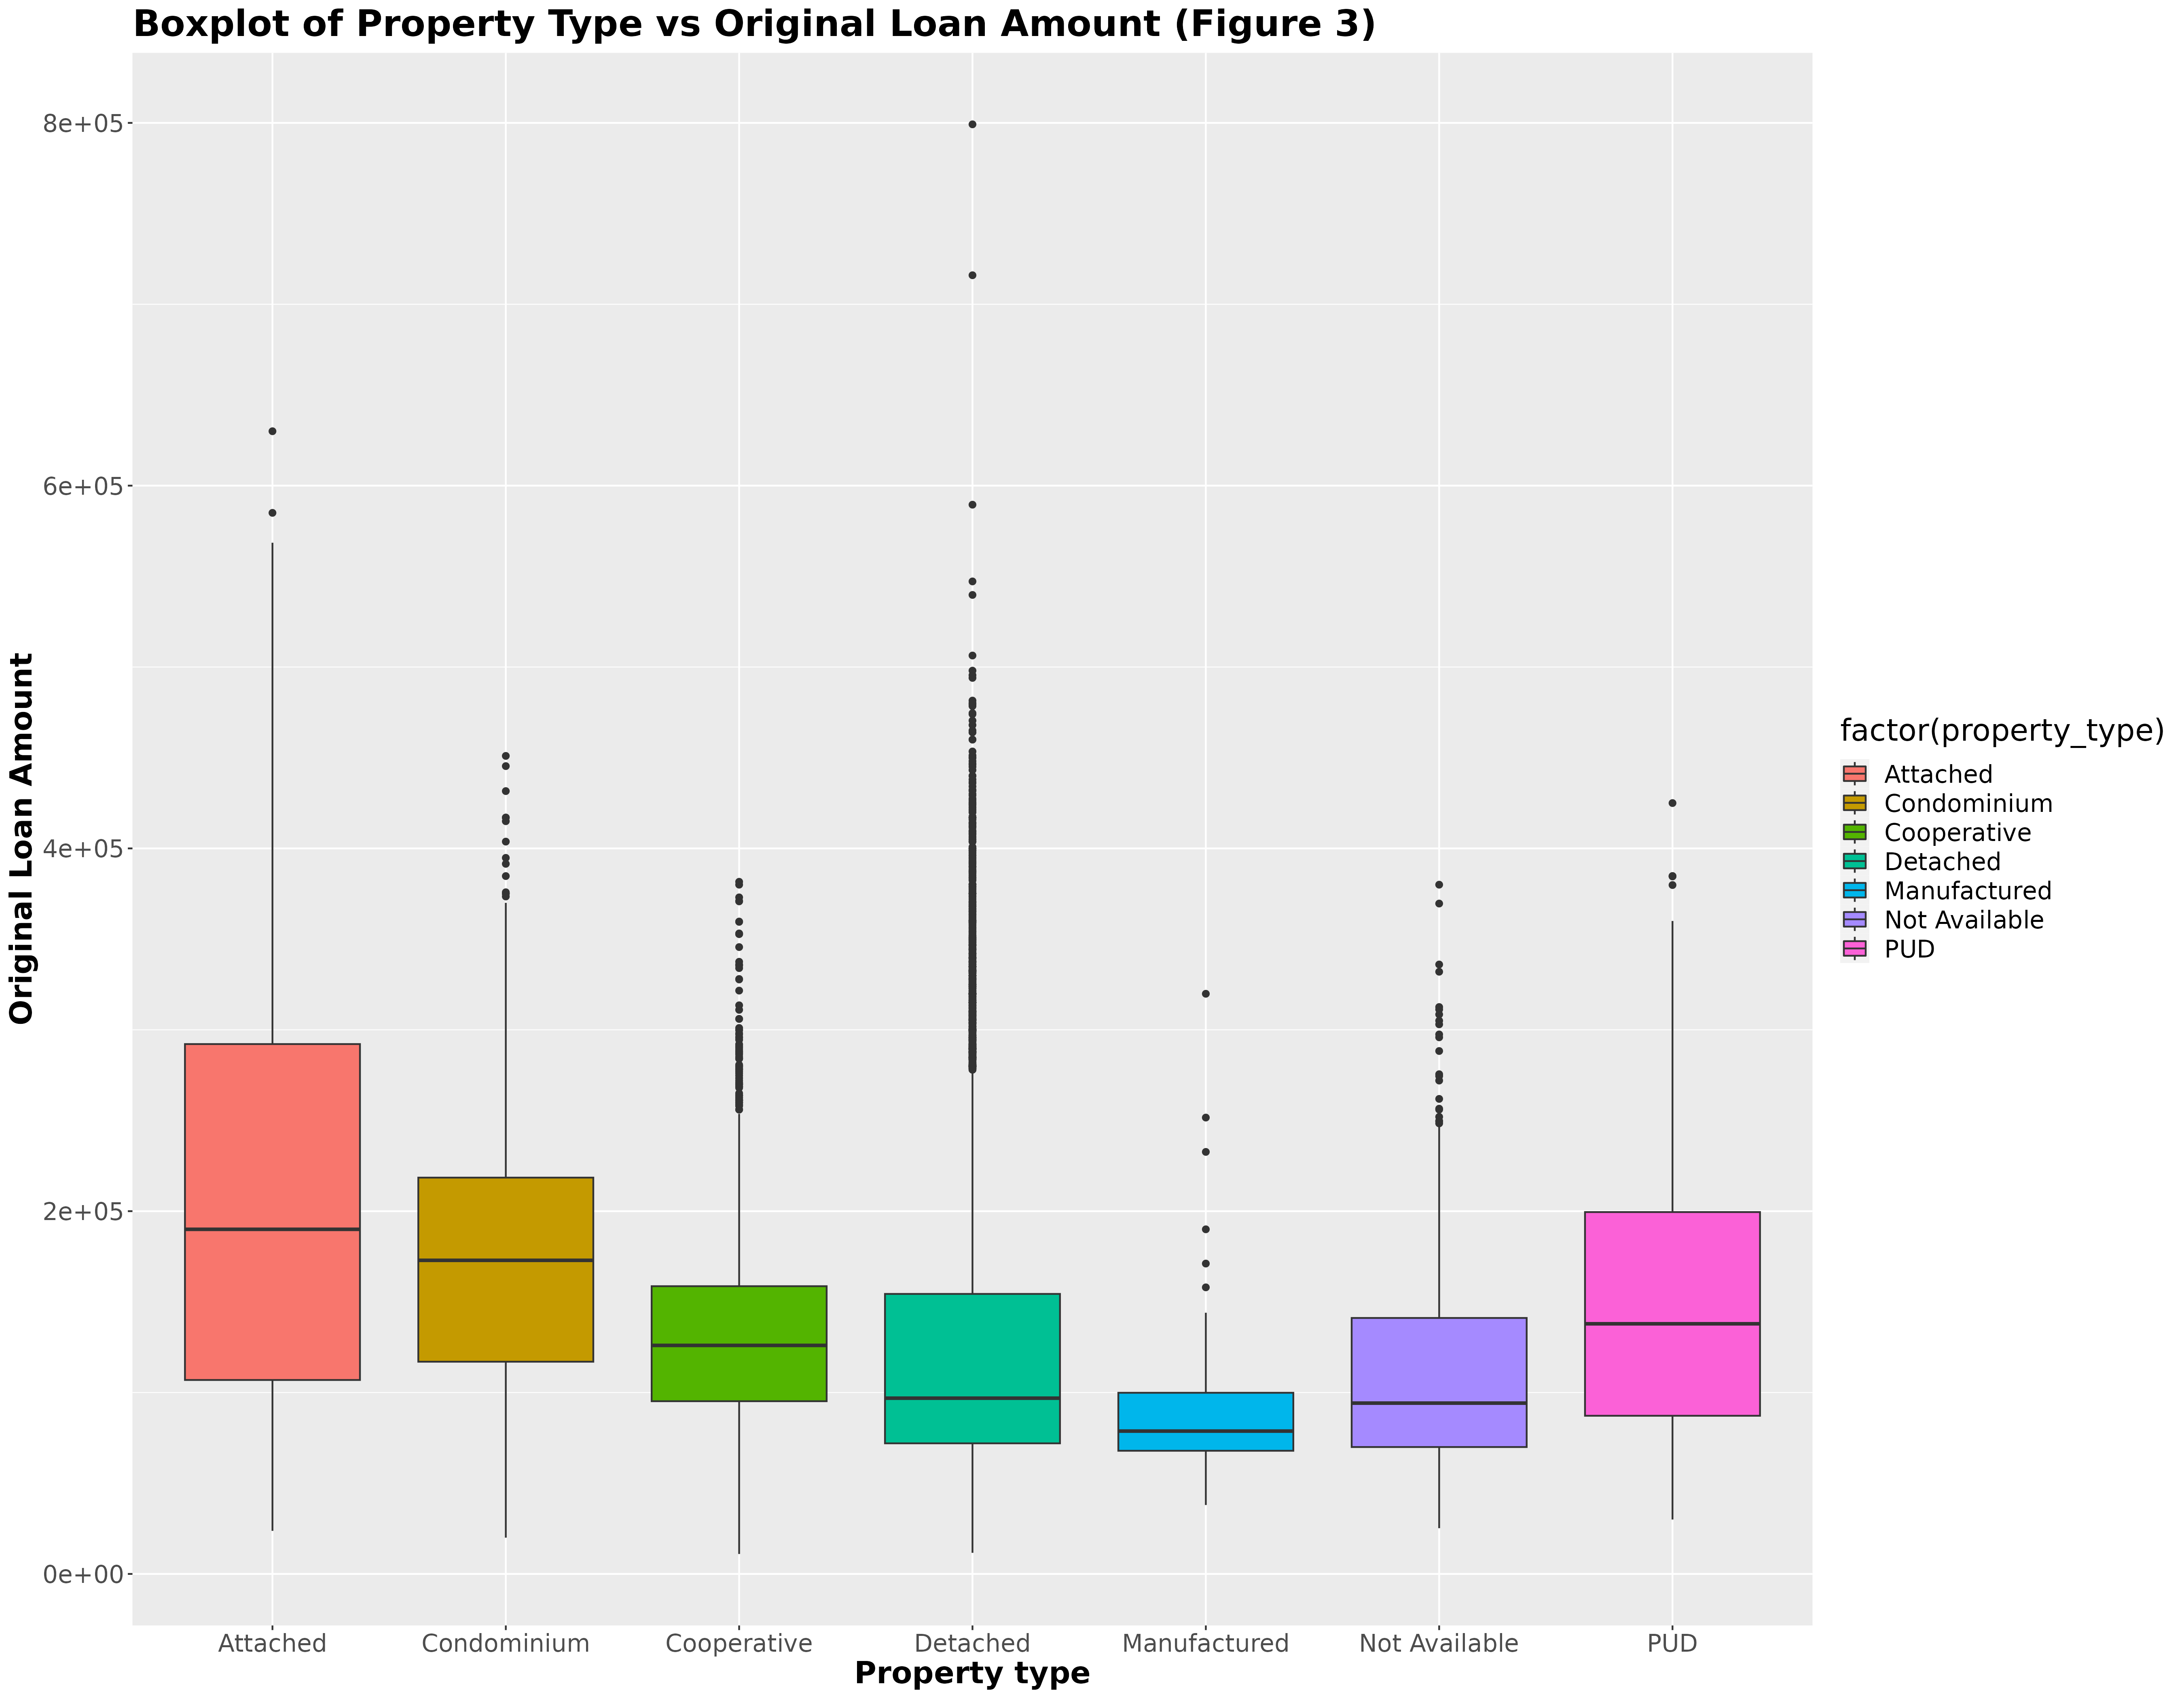

Variation by Property Type:

The median loan amount differs across property types, suggesting property type plays a role in how much people borrow.

 - Attached and PUD (Planned Unit Development) properties have some of the highest medians.

 - Manufactured and Cooperative homes have the lowest medians, indicating smaller loan amounts.

Spread of Loan Amounts:

 - Attached and Detached properties show a large spread, with long whiskers and many outliers—indicating more variability.

 - Manufactured homes show much tighter boxes and smaller spreads, suggesting more consistent (and generally smaller) loan sizes since these homes are assembled on the factory off site then transported to the location, these homes typically are on the lower side of cost,.

Outliers:

 - All property types include high-end outliers (especially Attached and Detached), some nearing $800,000.

 - Cooperative and Manufactured types have fewer extreme outliers.

"Not Available" Group:

 - This category has a wide spread and many outliers, which may indicate data quality issues or heterogeneous types lumped together.

PUD and Attached types not only have higher medians but also a larger upper quartile range—these may be associated with newer or higher-value developments.

Possible Implications:
Property Type as a Predictor: This categorical variable likely has predictive power

Segmentation: Borrower segments based on property type may behave differently in terms of loan size and affordability.

Policy Insight: Manufactured and cooperative home buyers may represent lower-income groups or more affordable housing options, potentially influencing funding strategies (e.g., SONYMA support).

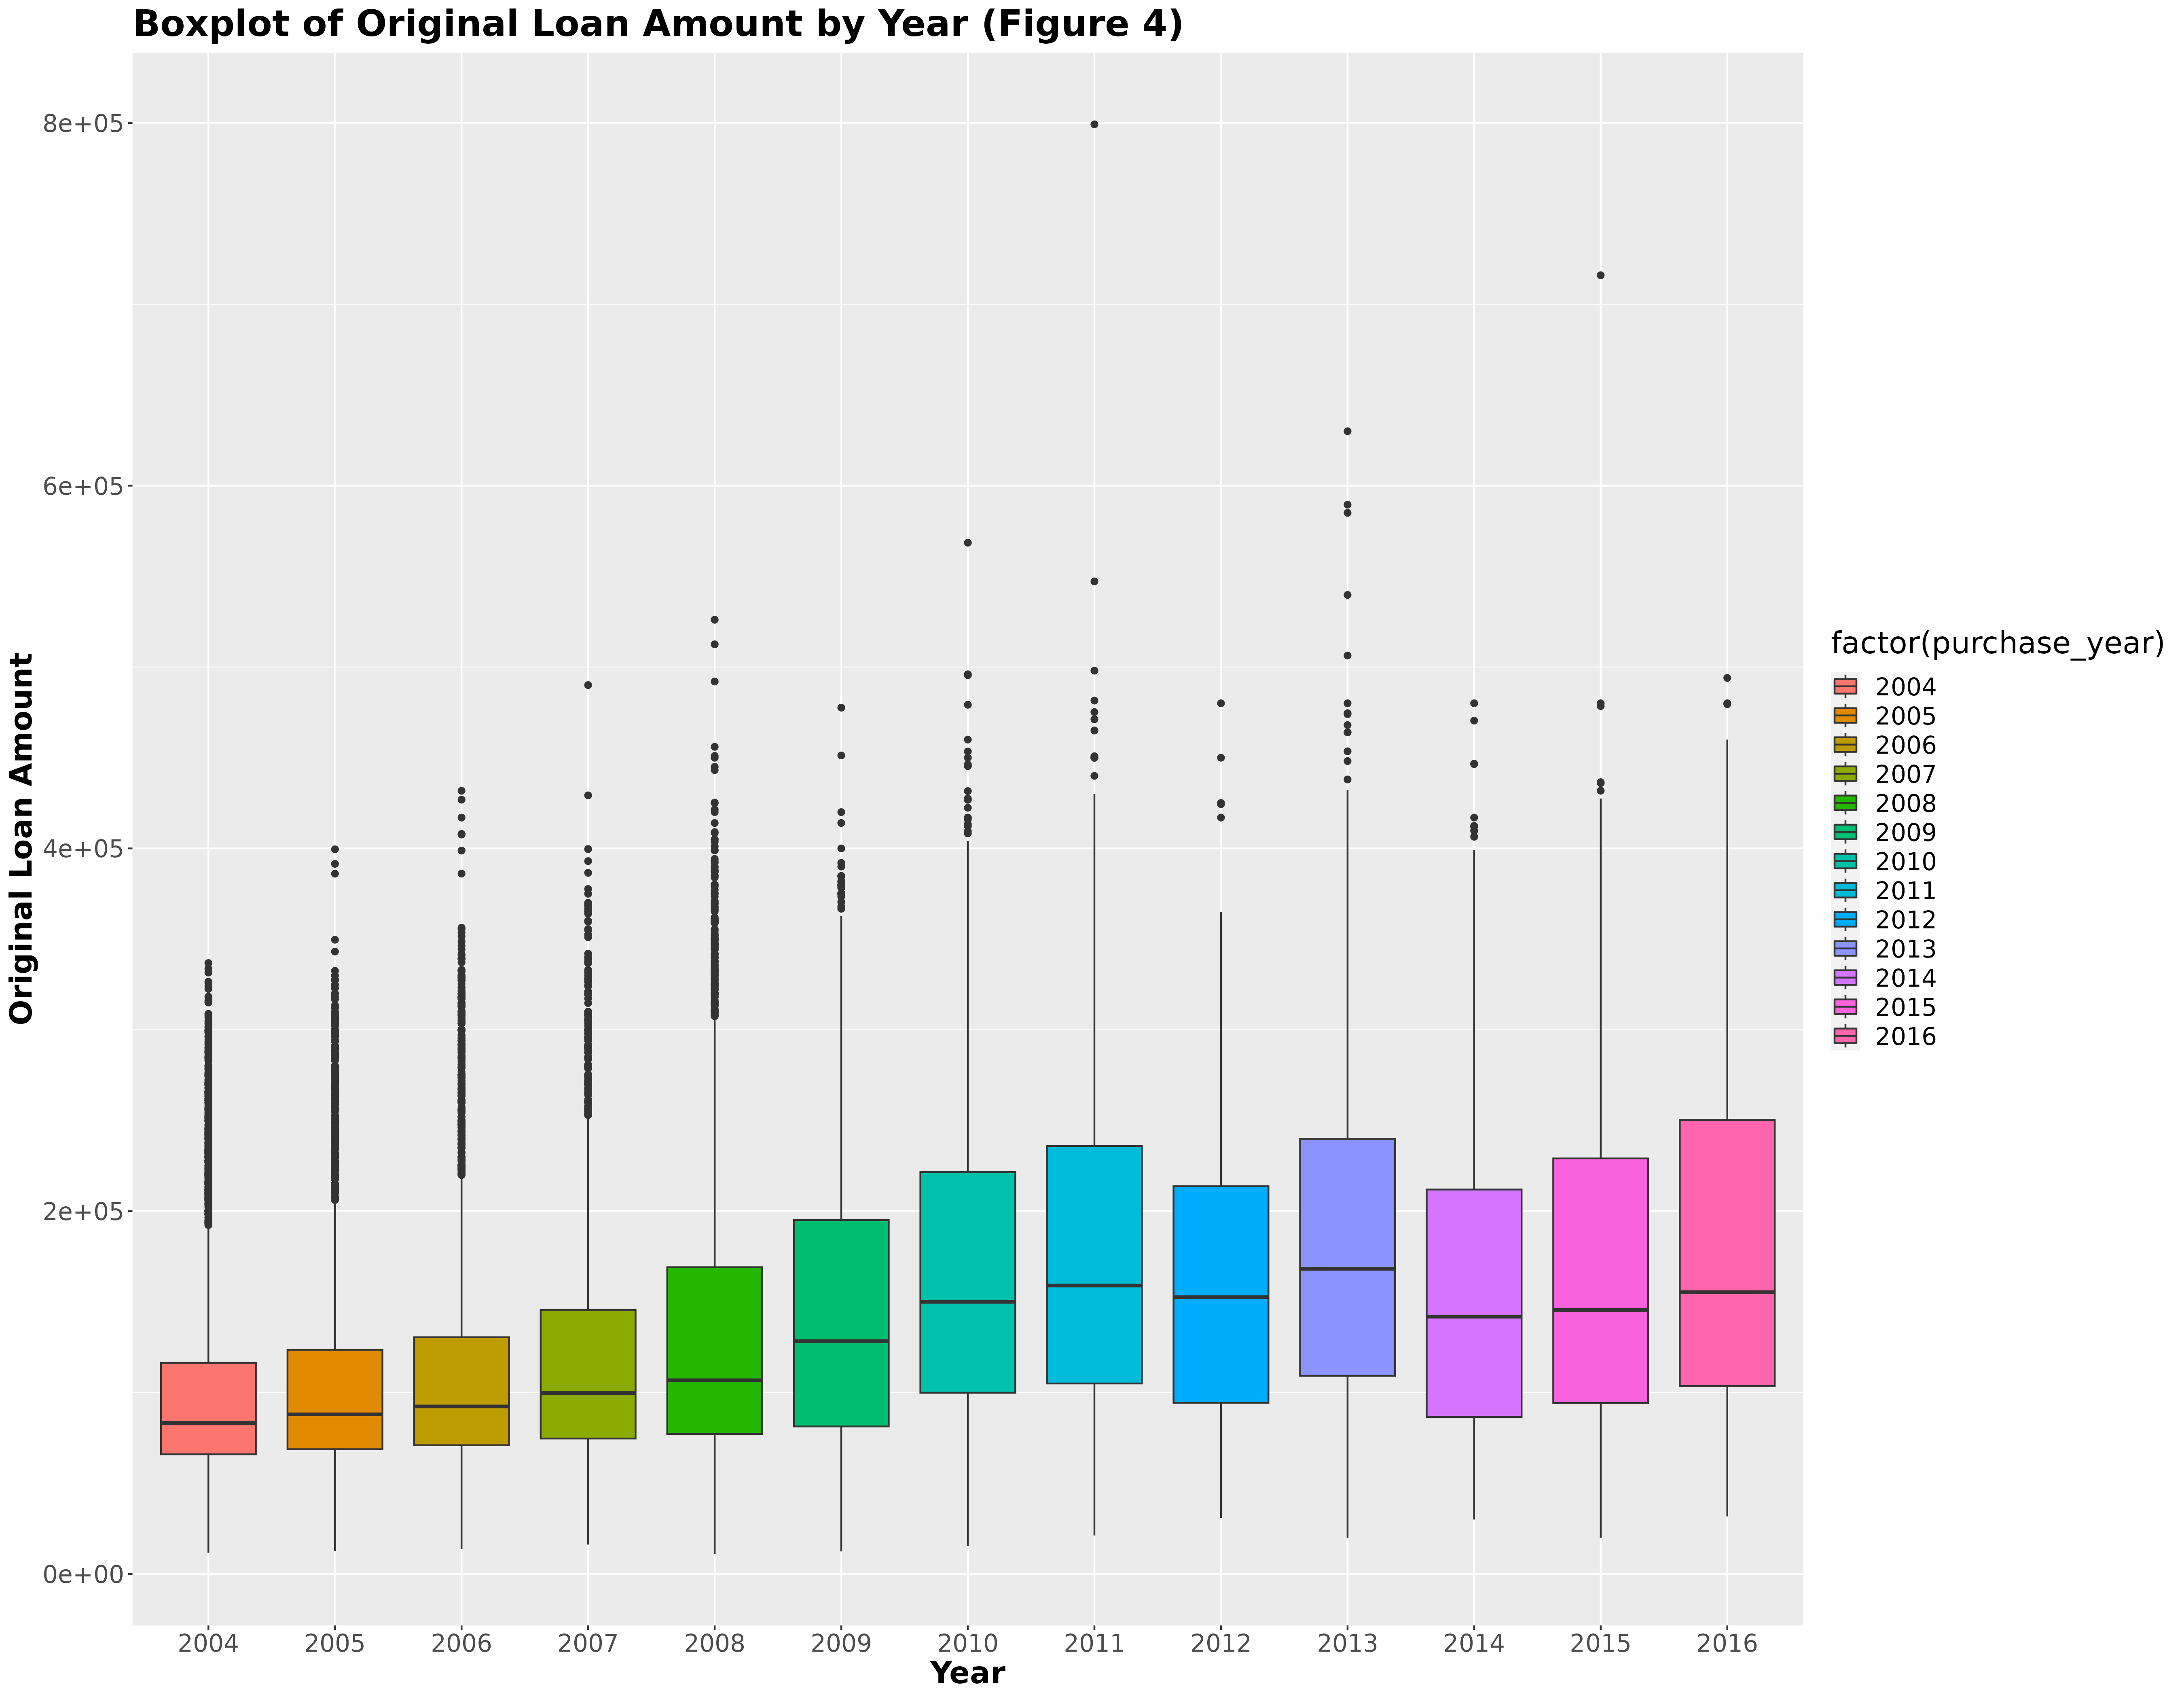

The year that SONYMA purchased the loan to redistribute for the borrowers seems not directly affect the amount of money the borrower can negotiate but we believe that it implicitly does. The amount that SONYMA purchase in a year might implicitly reflect the economical situation of that year that will affect the number of borrowers as well as  the amount of money and the inclination to start a mortgage loan. The plots show that the amount of purchasing steadily increase from 2004-2011 and fluctuate after that. We believe that overall, the tendency of buying new houses and requiring loan mortgage is increasing overtime and just fluctuate due to the financial crisis in the end of 2000s and in the beginning of the 2010s. However, in the long term, the amount of money people get as loan mortgage will increase.


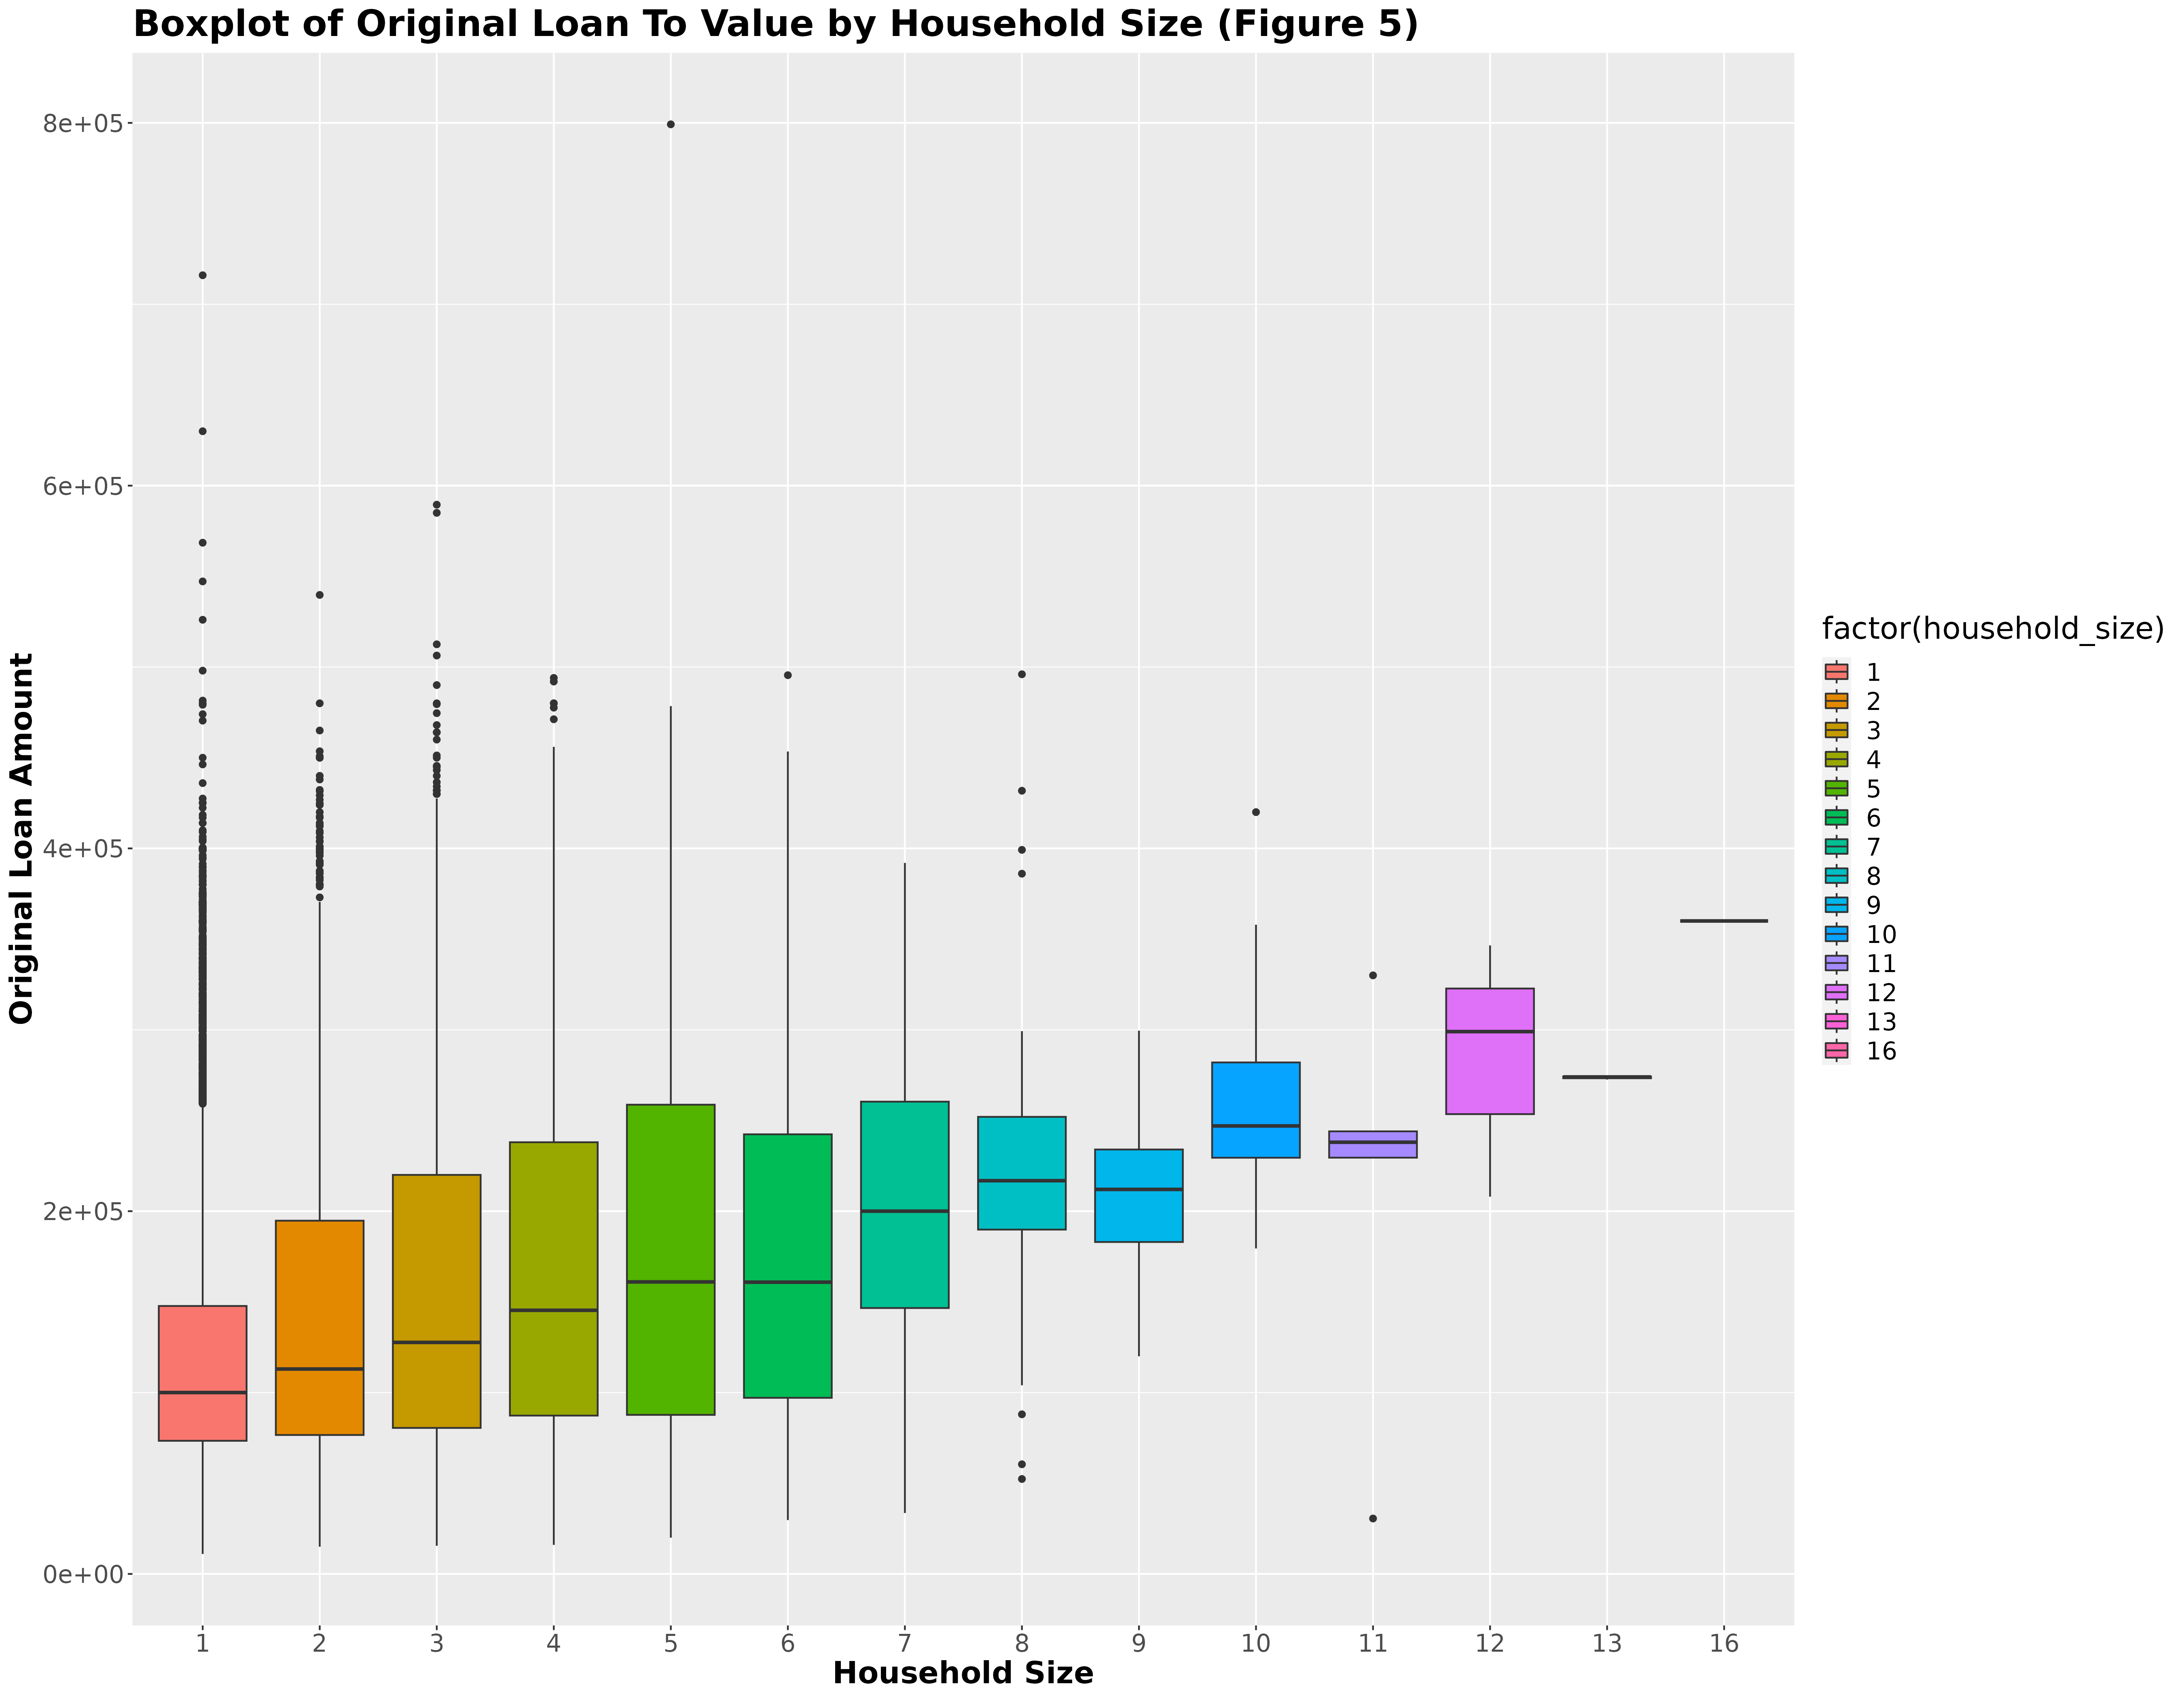

The plot suggests that households with larger size tend to have a greater loan amount. It can be explain that the larger the household size the larger space of the home they need and the more money in total they can make within a household. As a result, the loan amount they can get is larger to fulfill their demands.

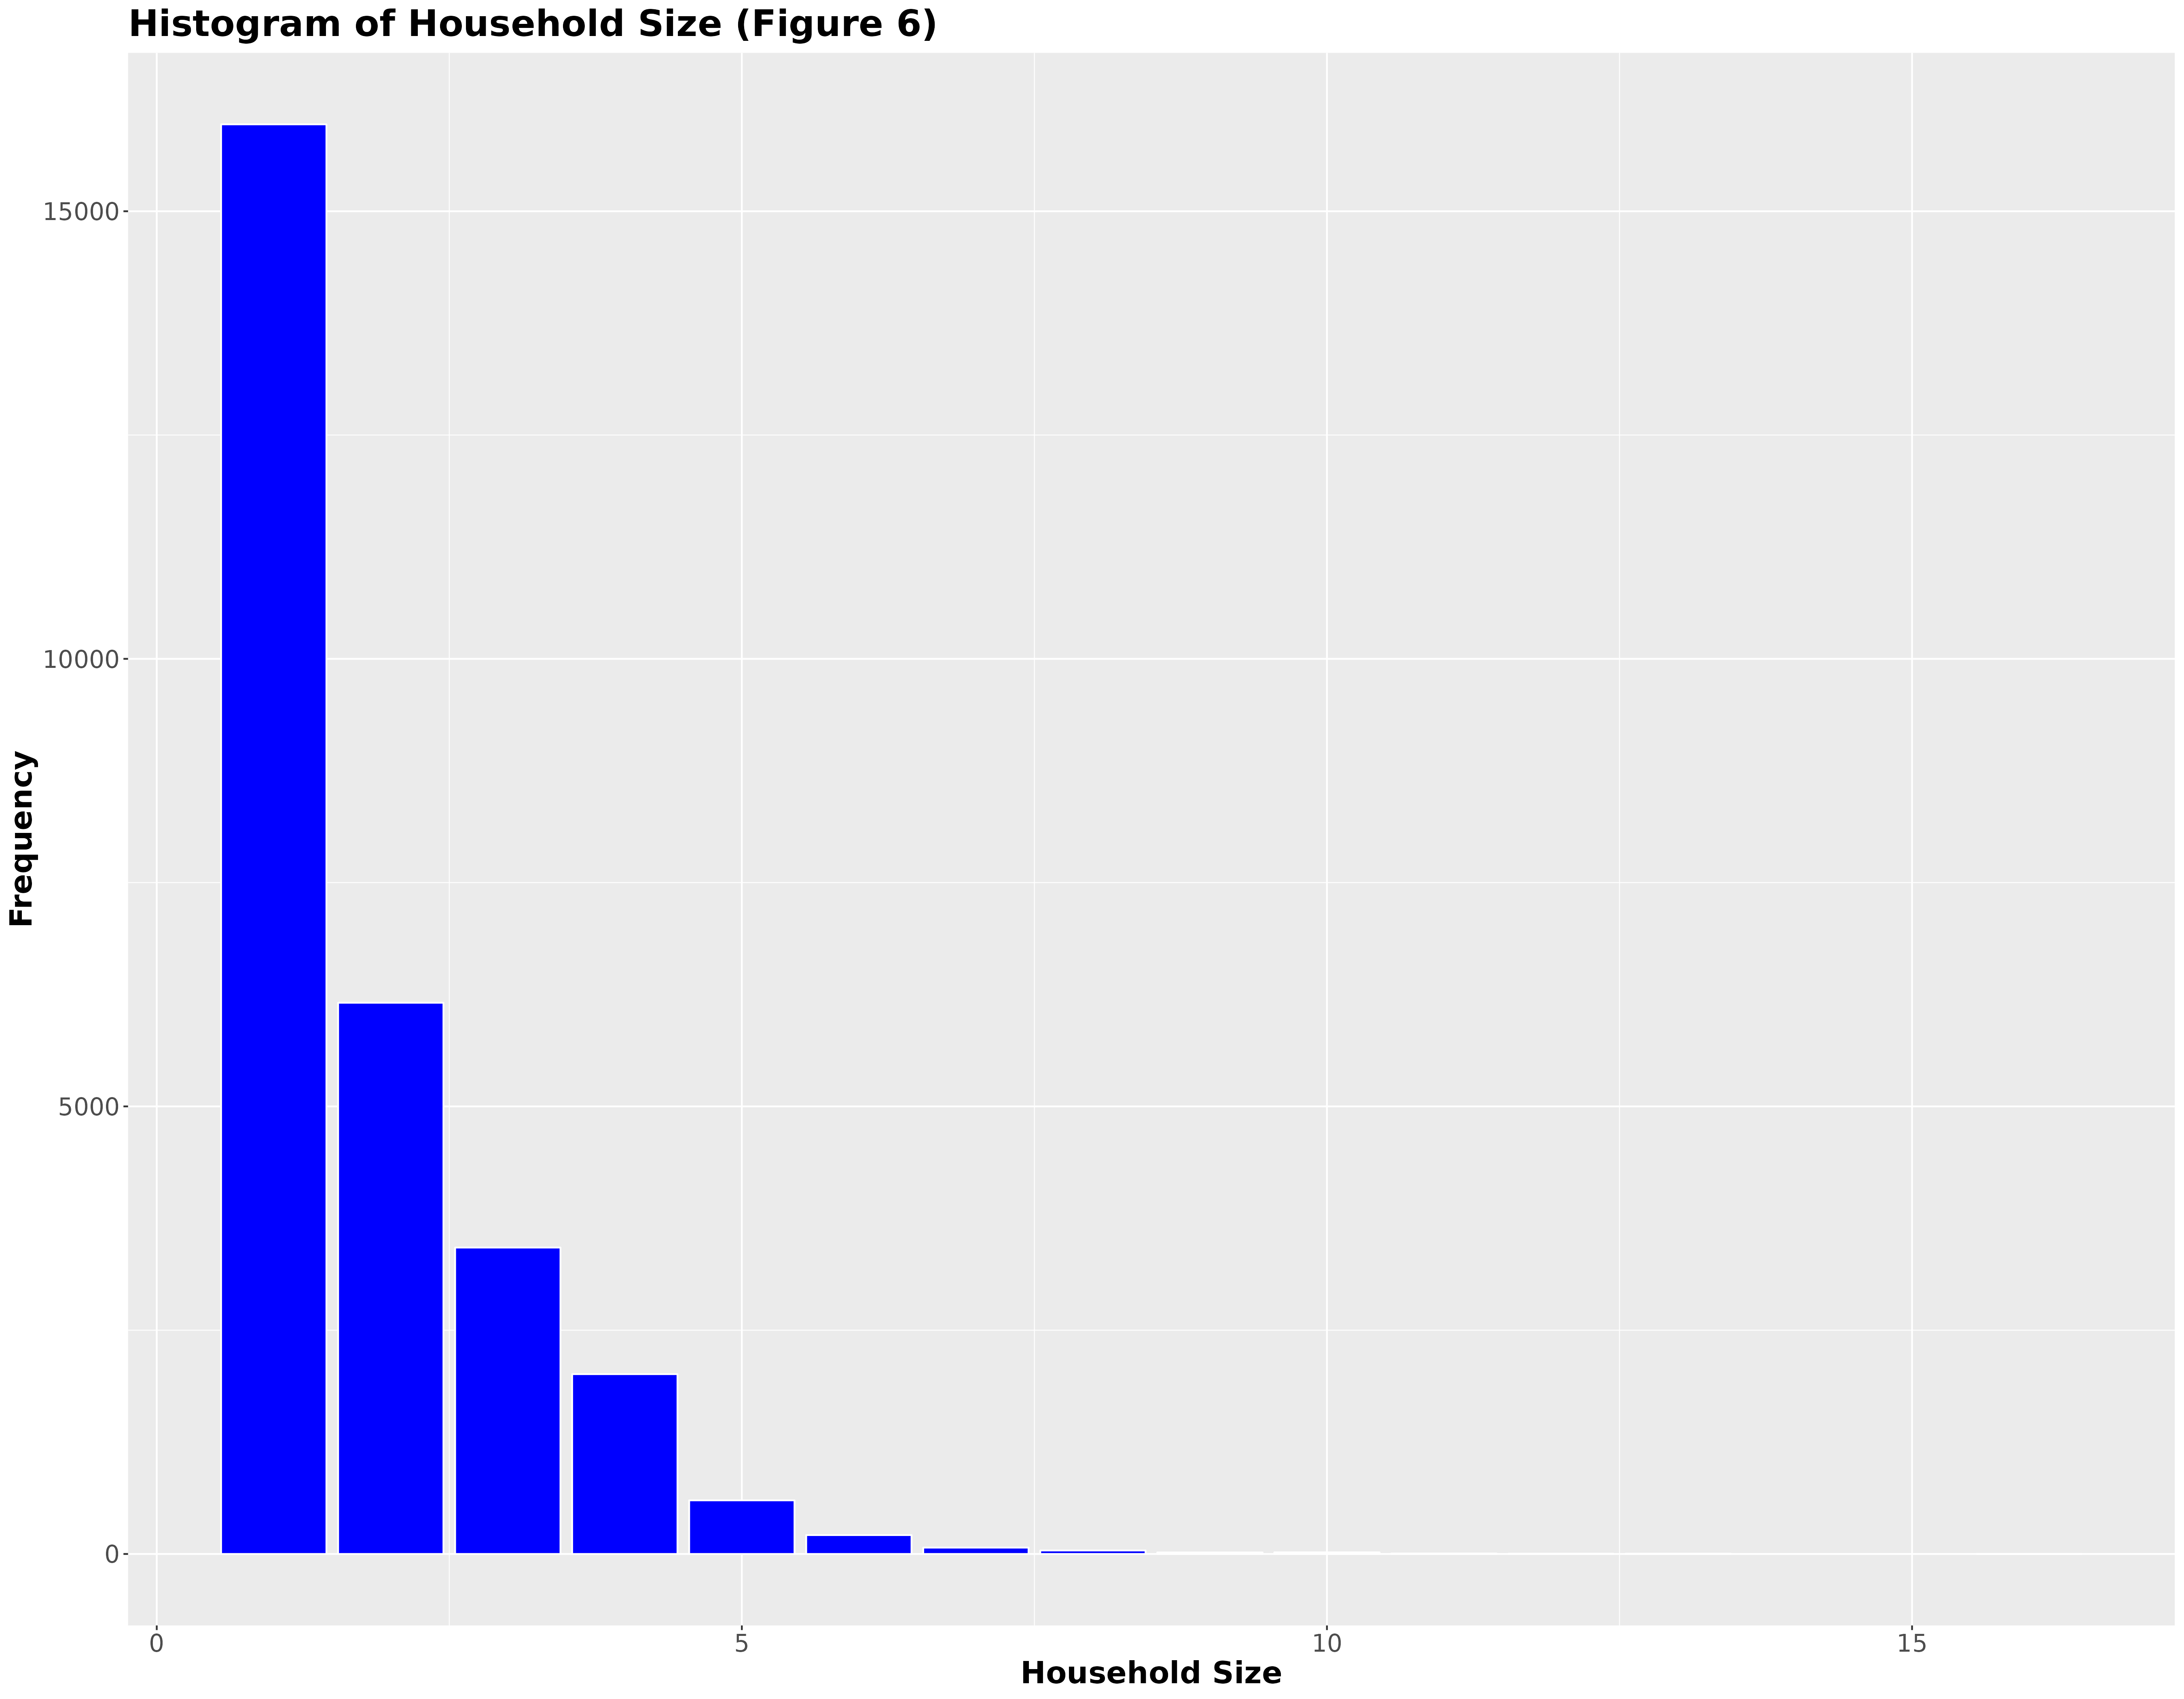

The most common household size of the borrower is 1 and 2. It is reasonable because most of them have low to moderate income and are first-time home buyer. They probably are the young people and young couples who have not formed a family yet and likely just are at the start of their careers and adulthoods.

Moreover, from this boxplot, there are a few things we can notice. Firstly, for smaller household sizes of six and below, there is a wide range of loan amounts, indicated by both the range of loan amount values and the interquartile range of the boxplots. This indicates high variability with several outliers, likely due to the fact that most homes bought fall within this category based on the histogram of household size, thus there is a large variety of homes in all price brackets that fall into these categories. 

Additionally, we notice that the median loan amount for each household size is different and increases as household size increases. This indicates that there may be a positive relationship between household size and loan amount. This is supported by the fact that the middle 50% of the data appears to increase in loan amount as household size increases.

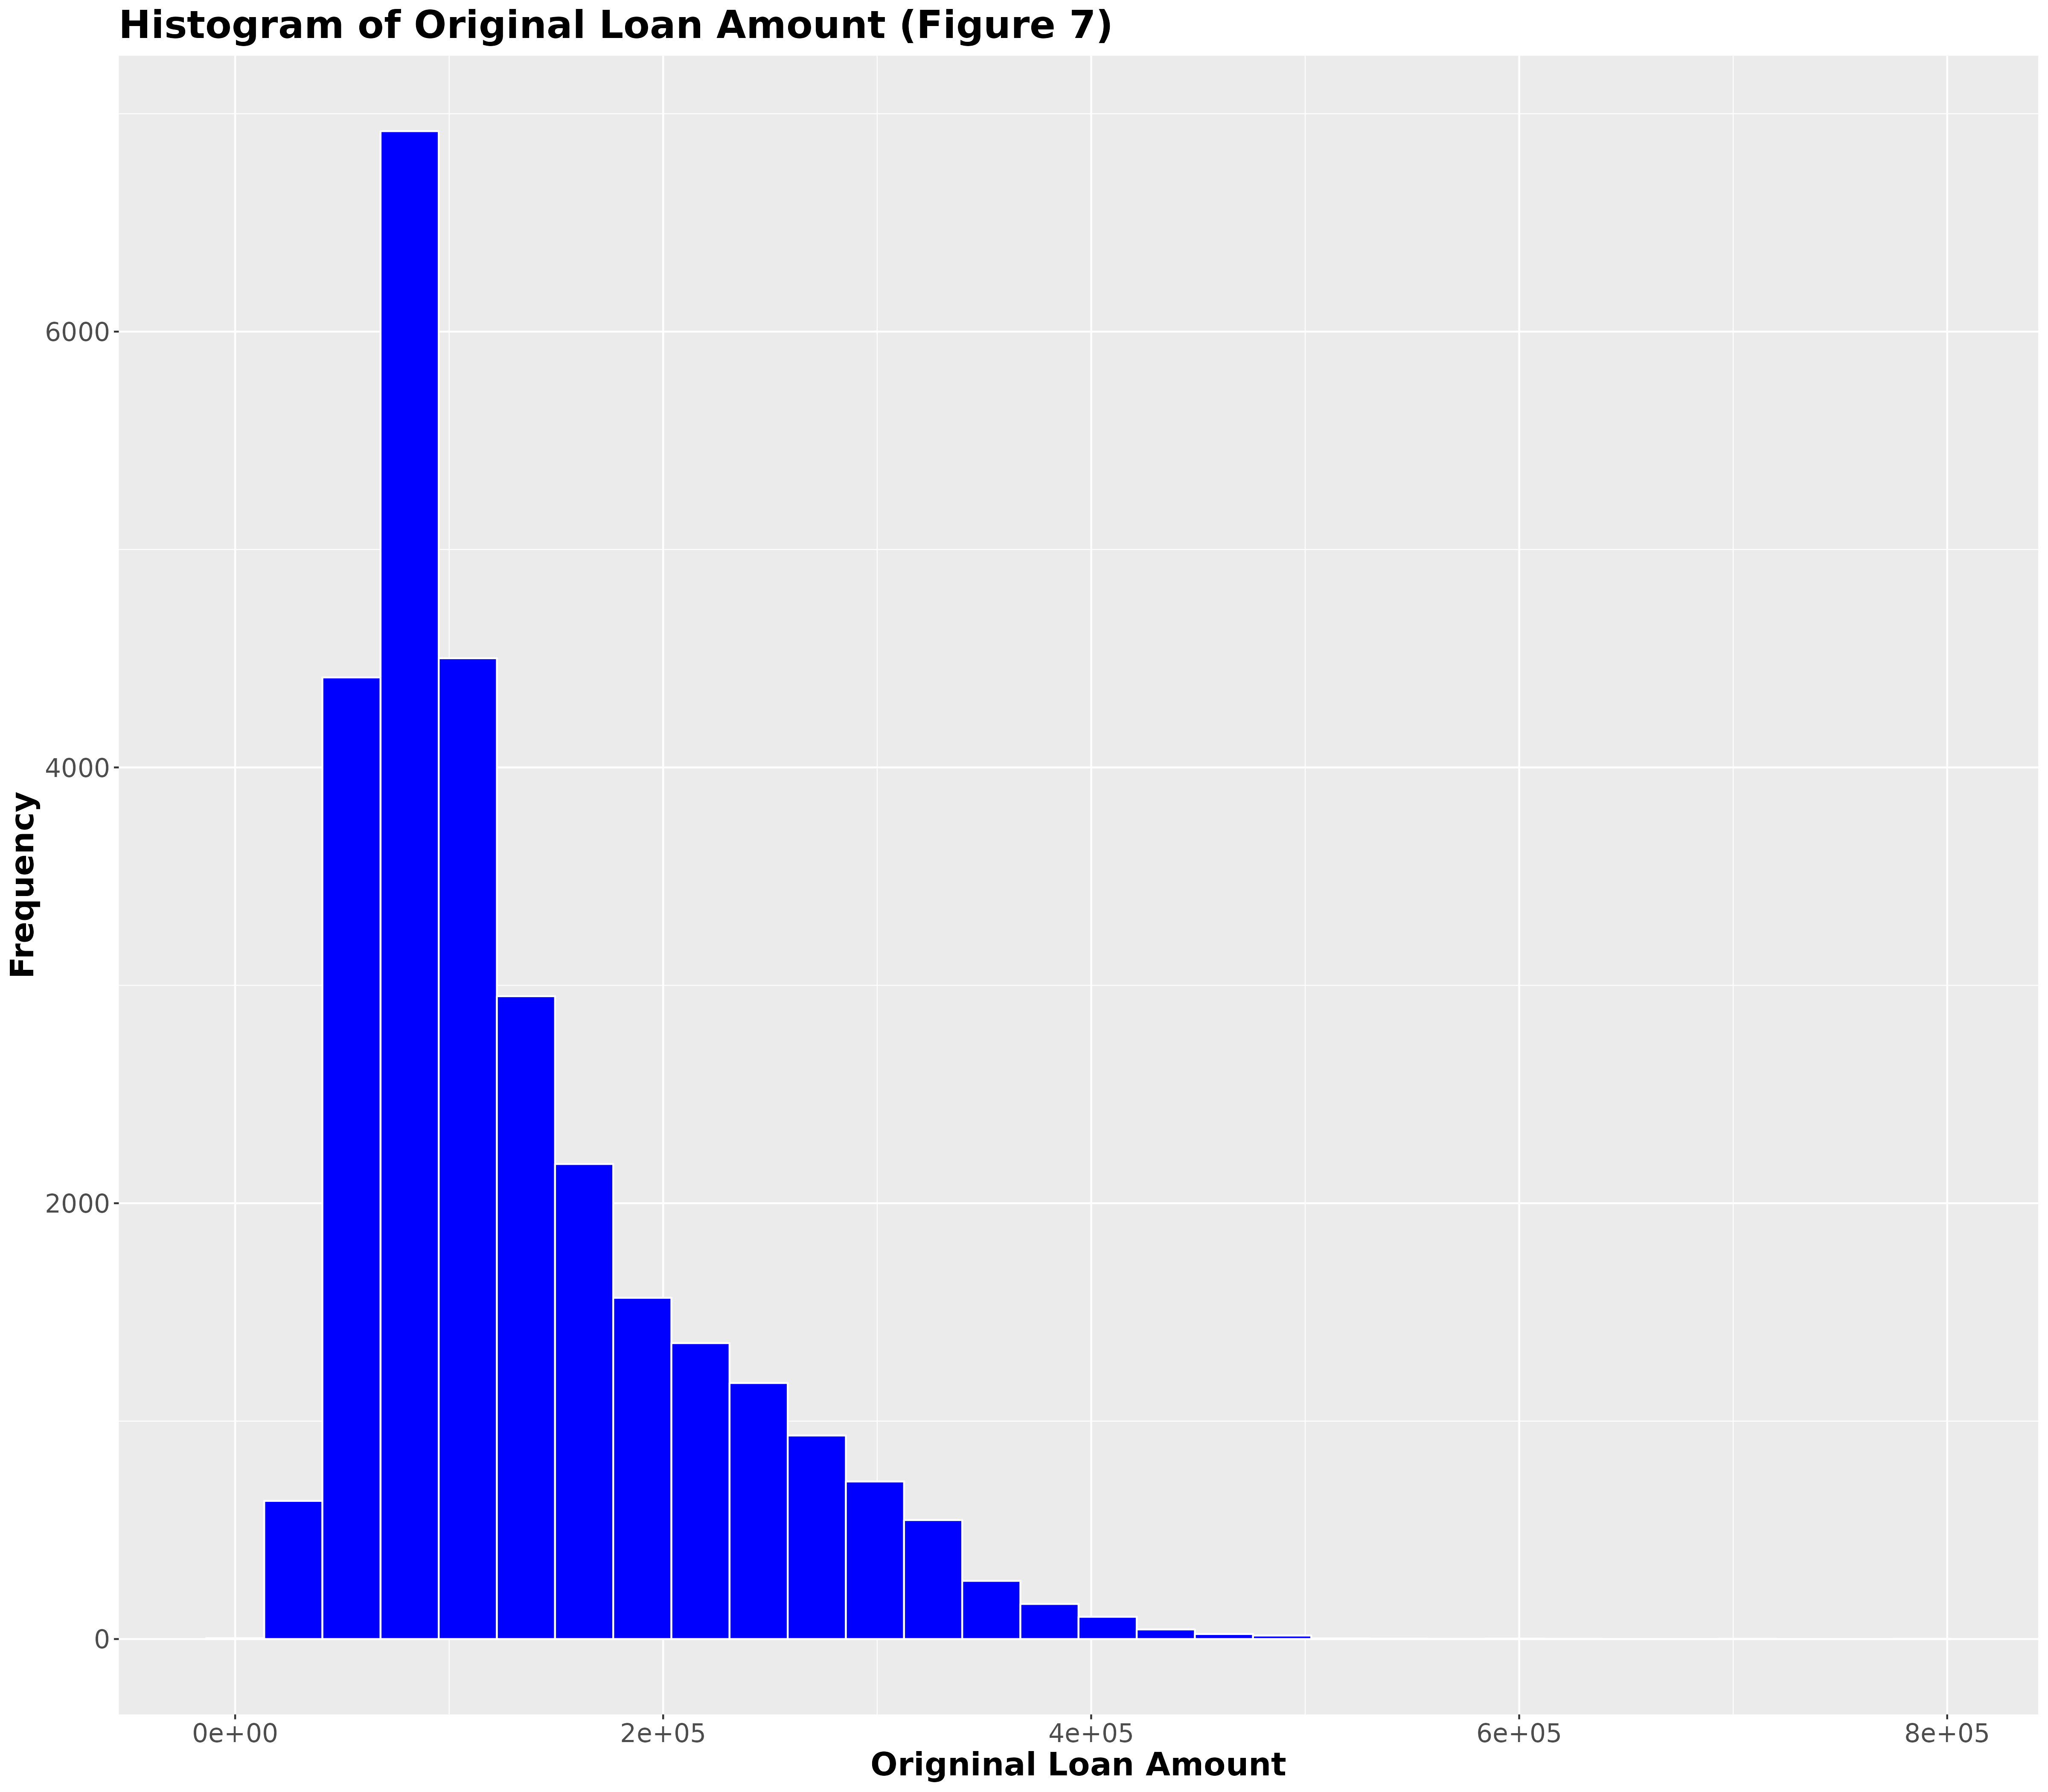

The majority of borrowers get a loan within 200,000 with majority get the loan around 100,000. It is reasonable because the majority of the clients of SONYMA are the low and moderate income families and also first-time home buyers so it is often the clients' first time buying a significantly high value property.

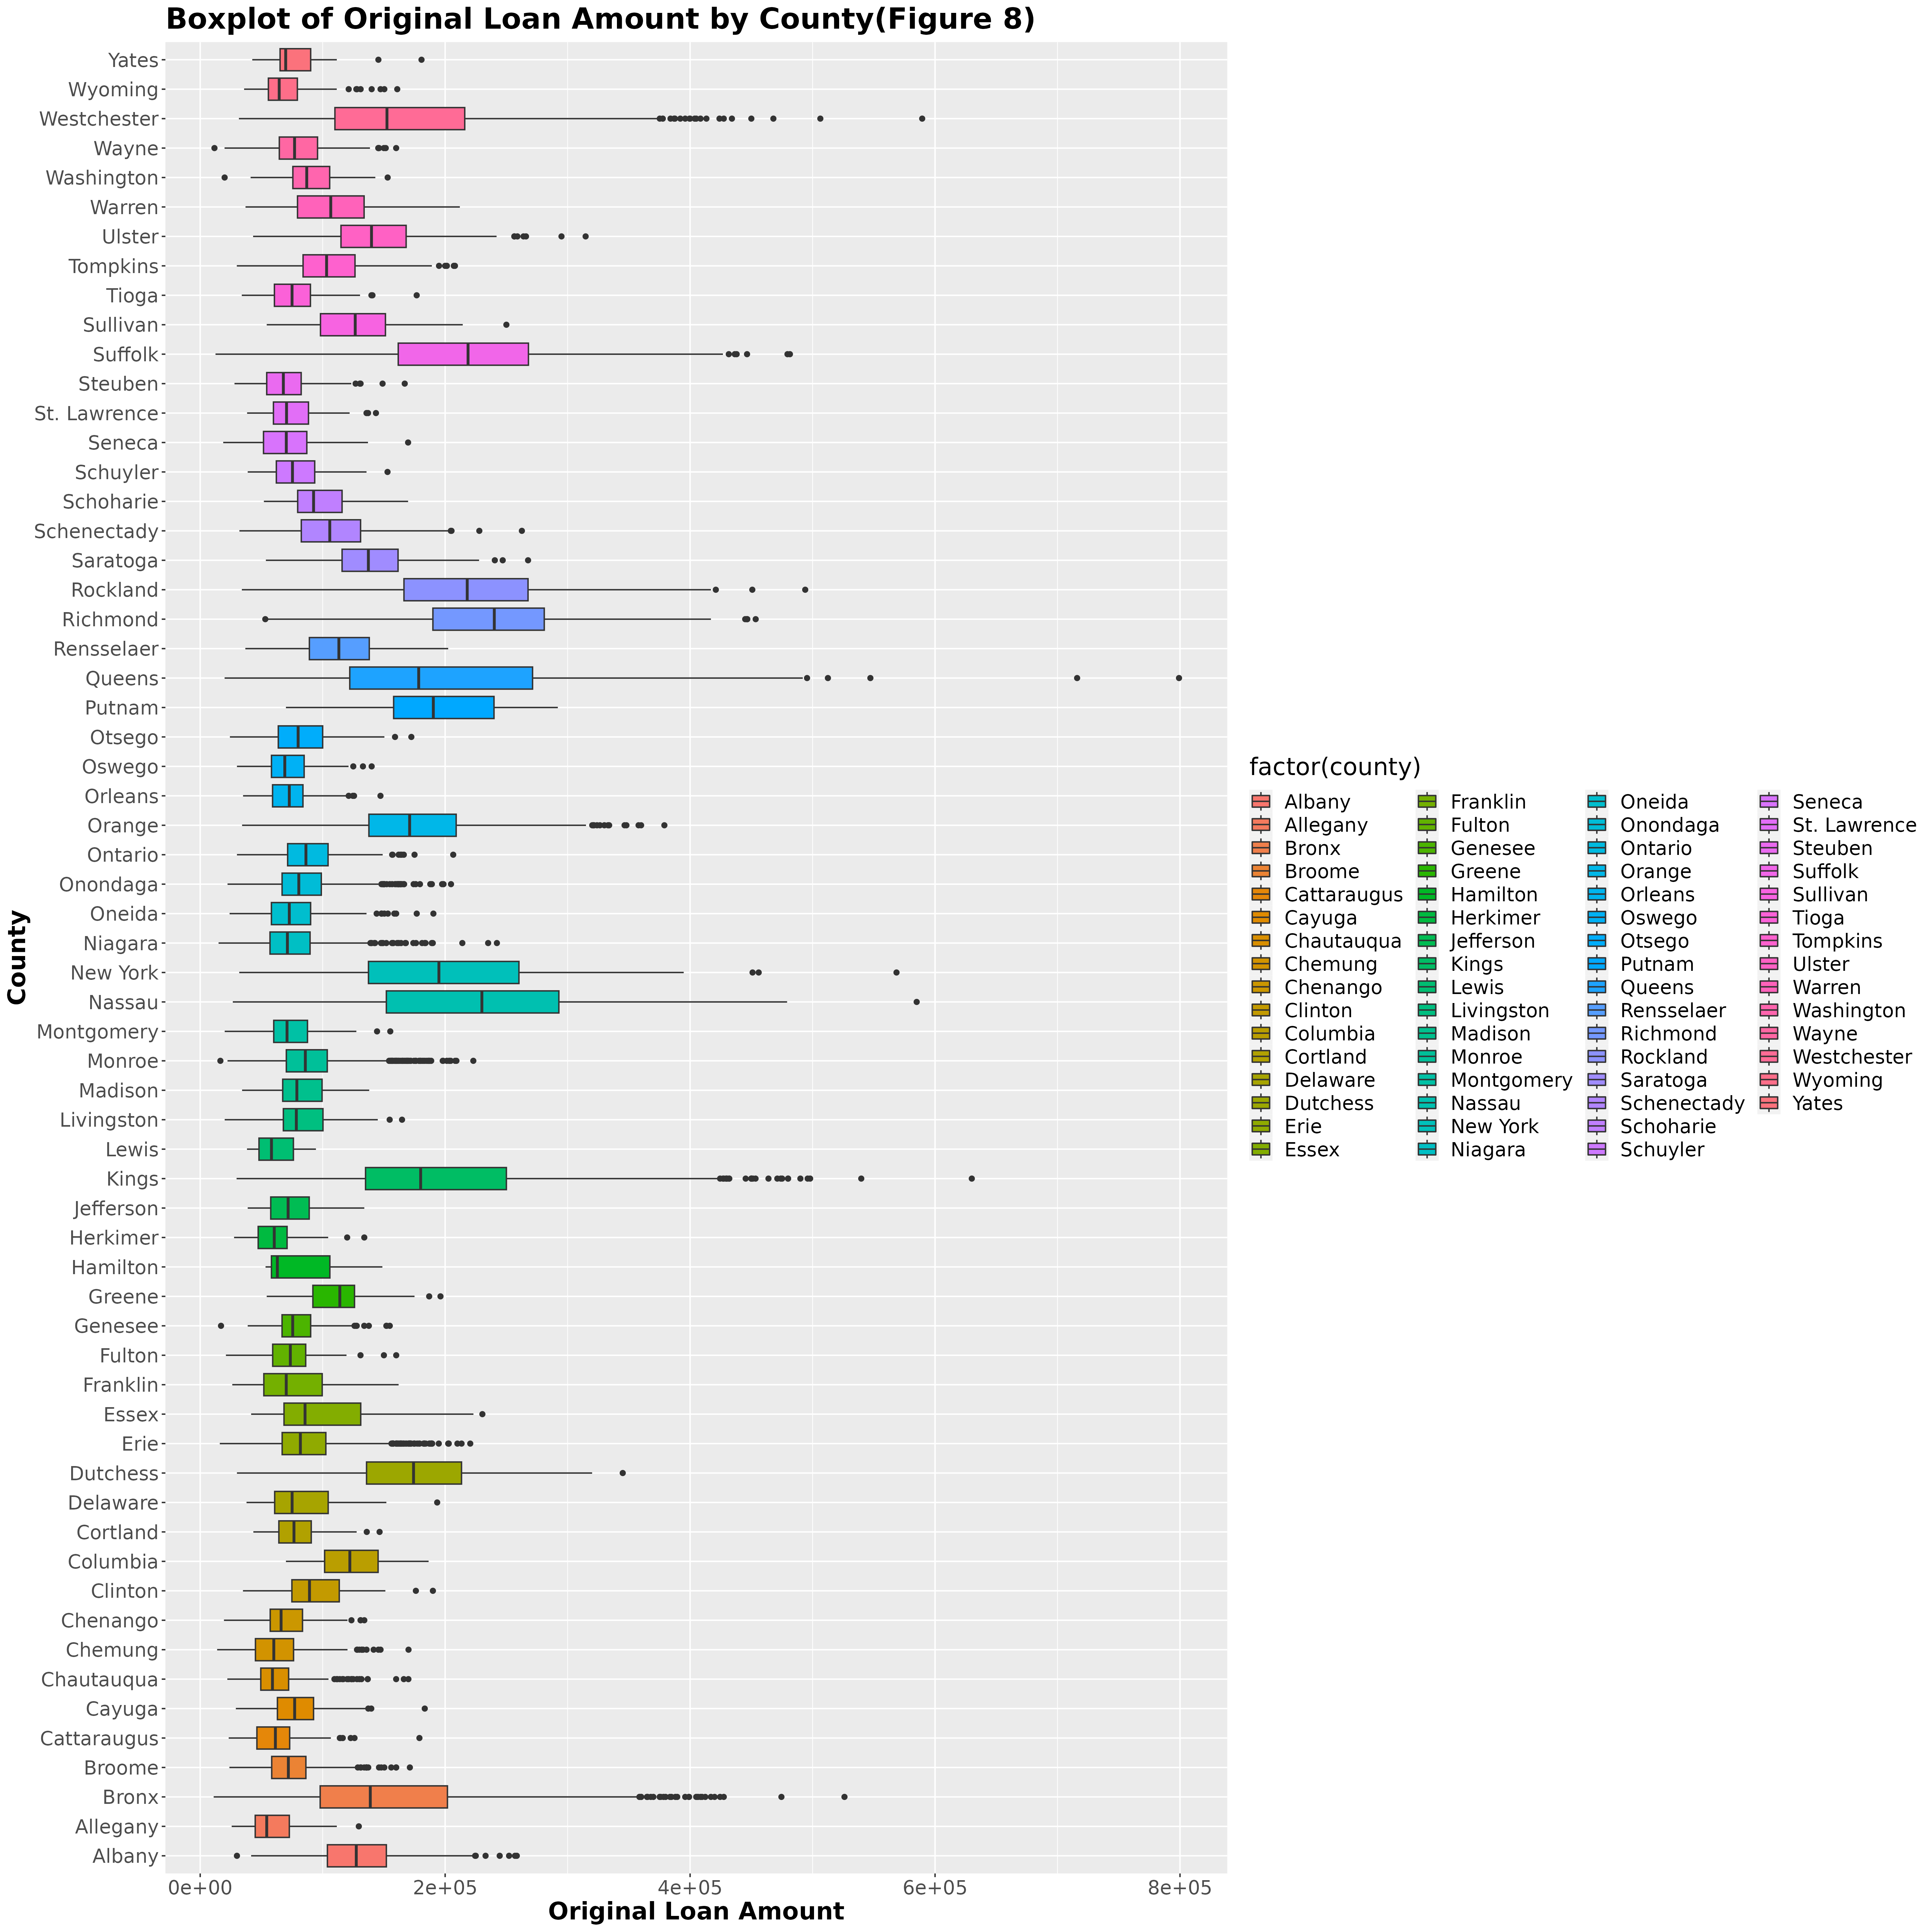

This boxplot shoes that the loan amount varies wildly based on county. We see that most counties have a relatively small interquartile range, except for a few such as Bronx and Nassau that have very large original loan amount ranges. This is likely due to the real-estate markets in each county, which may vary due to various geographical factors.

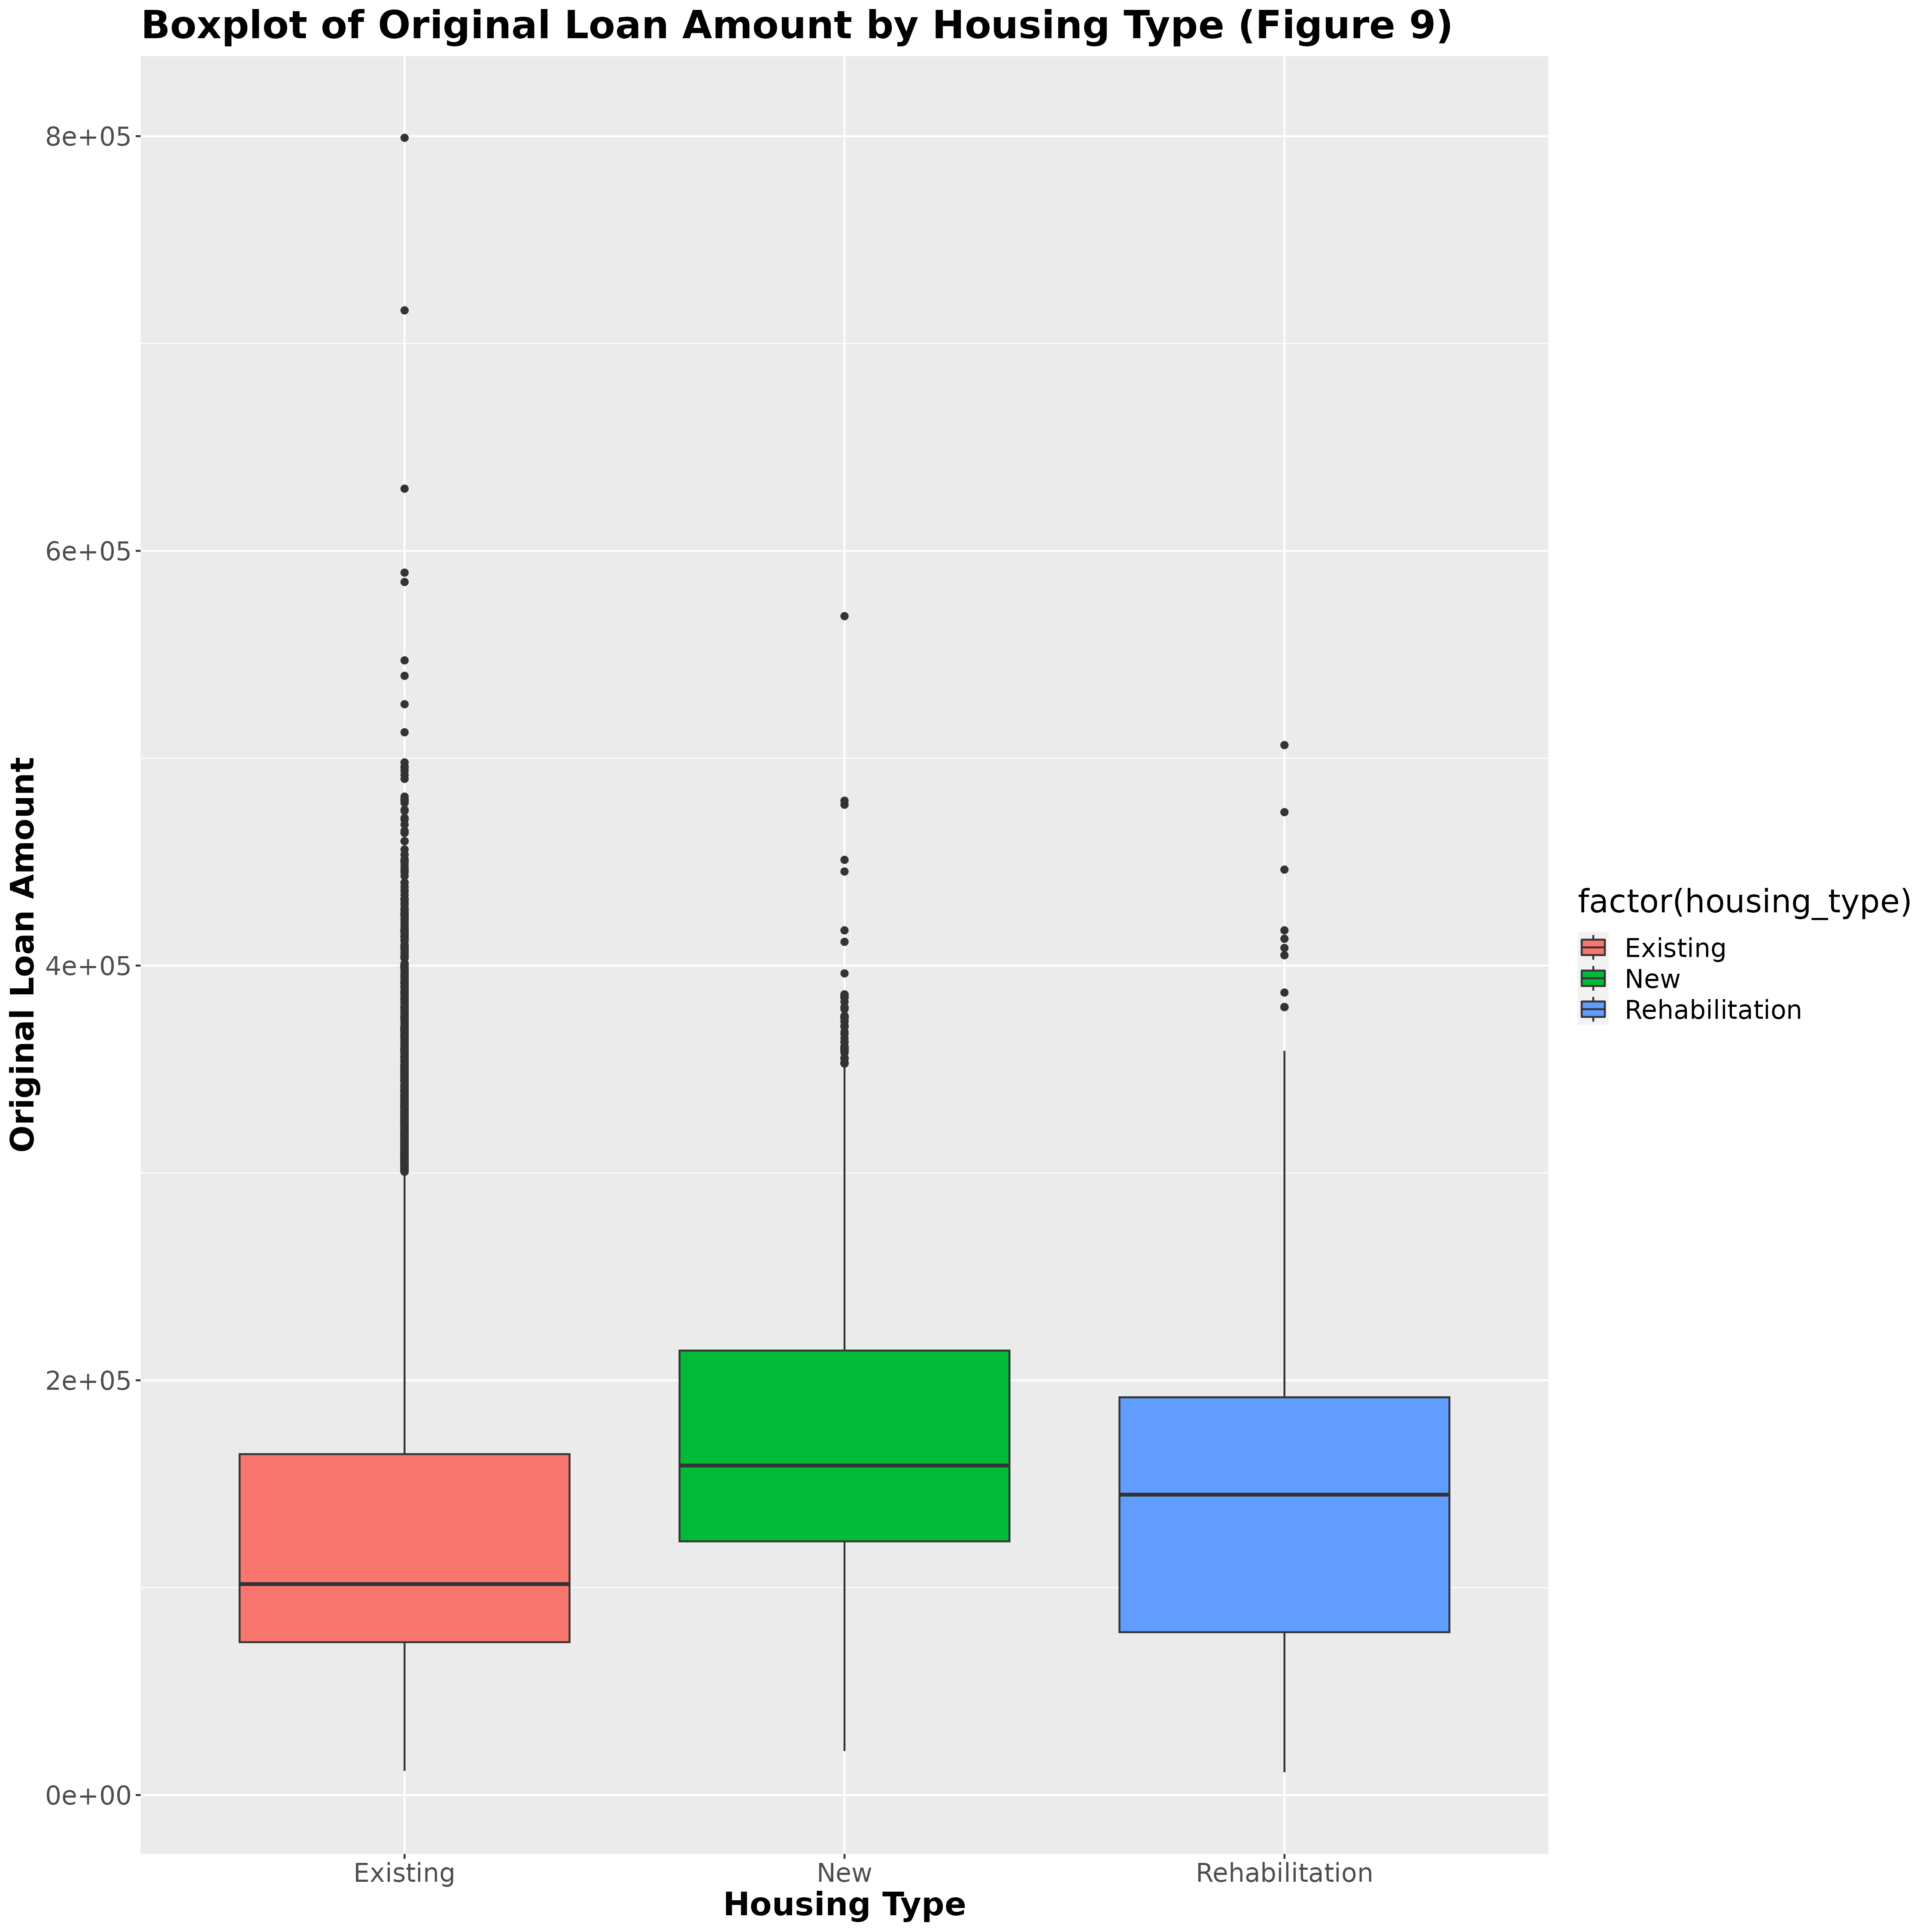

The boxplot indates that first-time low to moderate income people tend to get attracted by the new and rehabilitation properties more than the existing residences. It is reasonalbe because as the first-time buyer, people either tend to target the new houses if their financial background is not a serious problem (as only need to have a small loan) or if their financial background is not stable, they tend to select the rehabilitation with expected lower asking price.

# Model Selection

We utilize all forward, backward selection and stepwise selection as methods to choose the model and use adjusted R squared, Cp values as the decision criteria.

We first fitted a full model with no transformation as the baseline model for comparison and have an adjusted R squared value of 0.79 which is high for a baseline model. The next step is checking the assumptions of model through a qqplot and residual. There was no discernable pattern for the residual plot but the qqplot shows the normality violation that the error distribution is right tail heavy which is a problem.

Consequently, we should apply a transformation to resolve this issue and after examining feasible solutions such as using log for the responsible variables as well as the explanatory variables, we determine to choose to square root the response variable (original_loan_amount) and achieved an adjusted R squared of 0.78 which is lower and checking the assumptions of the model

Ultimately, all three methods suggests the same model as follows:

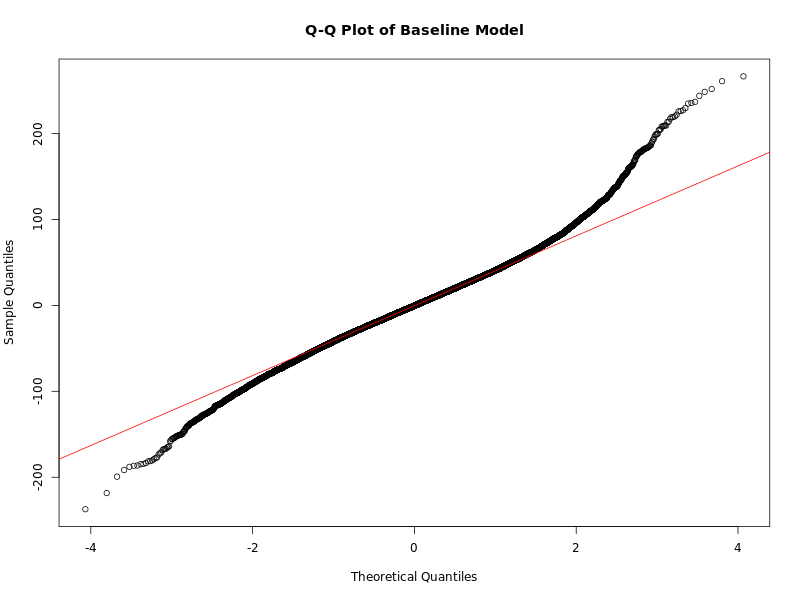

The new qqplot shows that the heavy tail still exist but now the error follows approximately normal distribution with some extreme values.

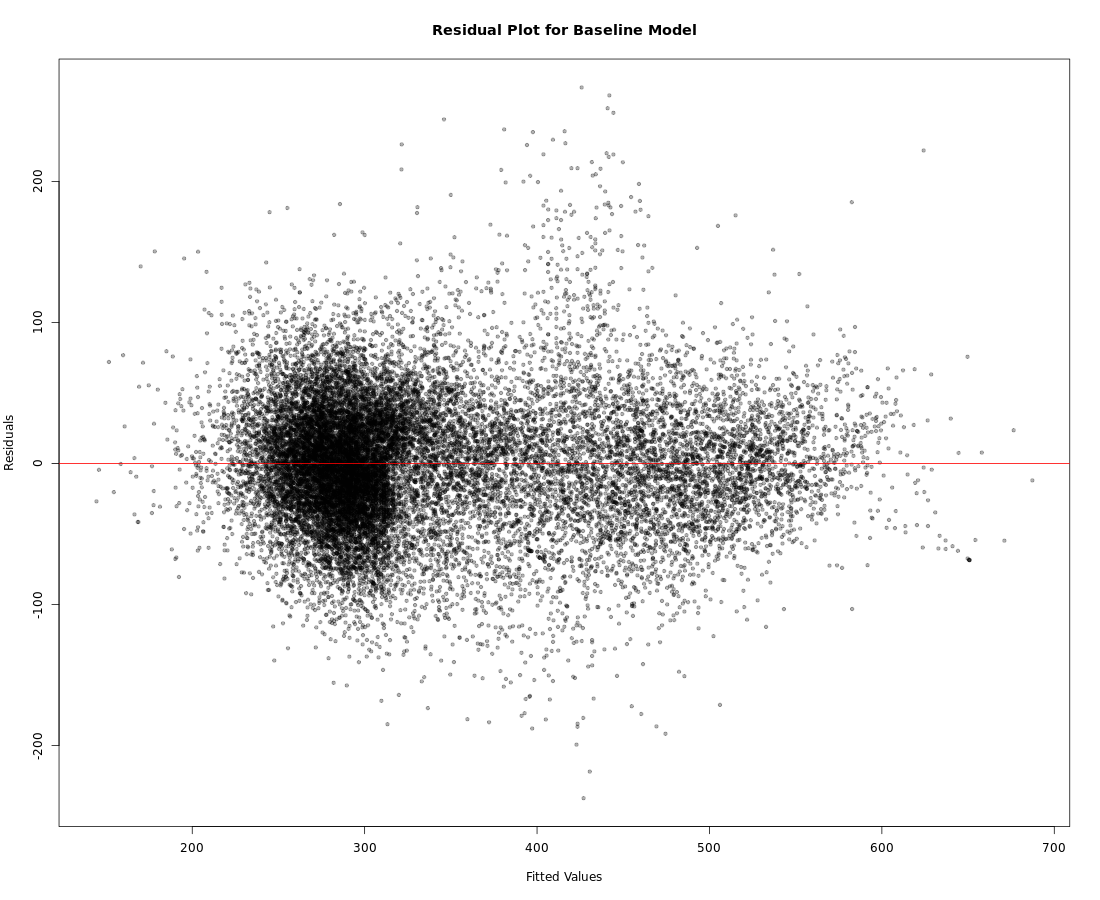

There is no discernable pattern in the residual plot so we can say that this model did not violate any of the linear model assumptions. 

Even though the adjusted R squared value is lower but not by a significant amount, the qqplot and residual showed that it is a more reliable model so we decided to use the transformed model for both forward, backwards and stepwise selection.

## Adjusted R squared criteria

### Forward Selection

Now we can move to the forward selection method using the transformed model, we used regsubsets then plotted a gragh with x as the number of predictors and y as the adjusted R squared value 

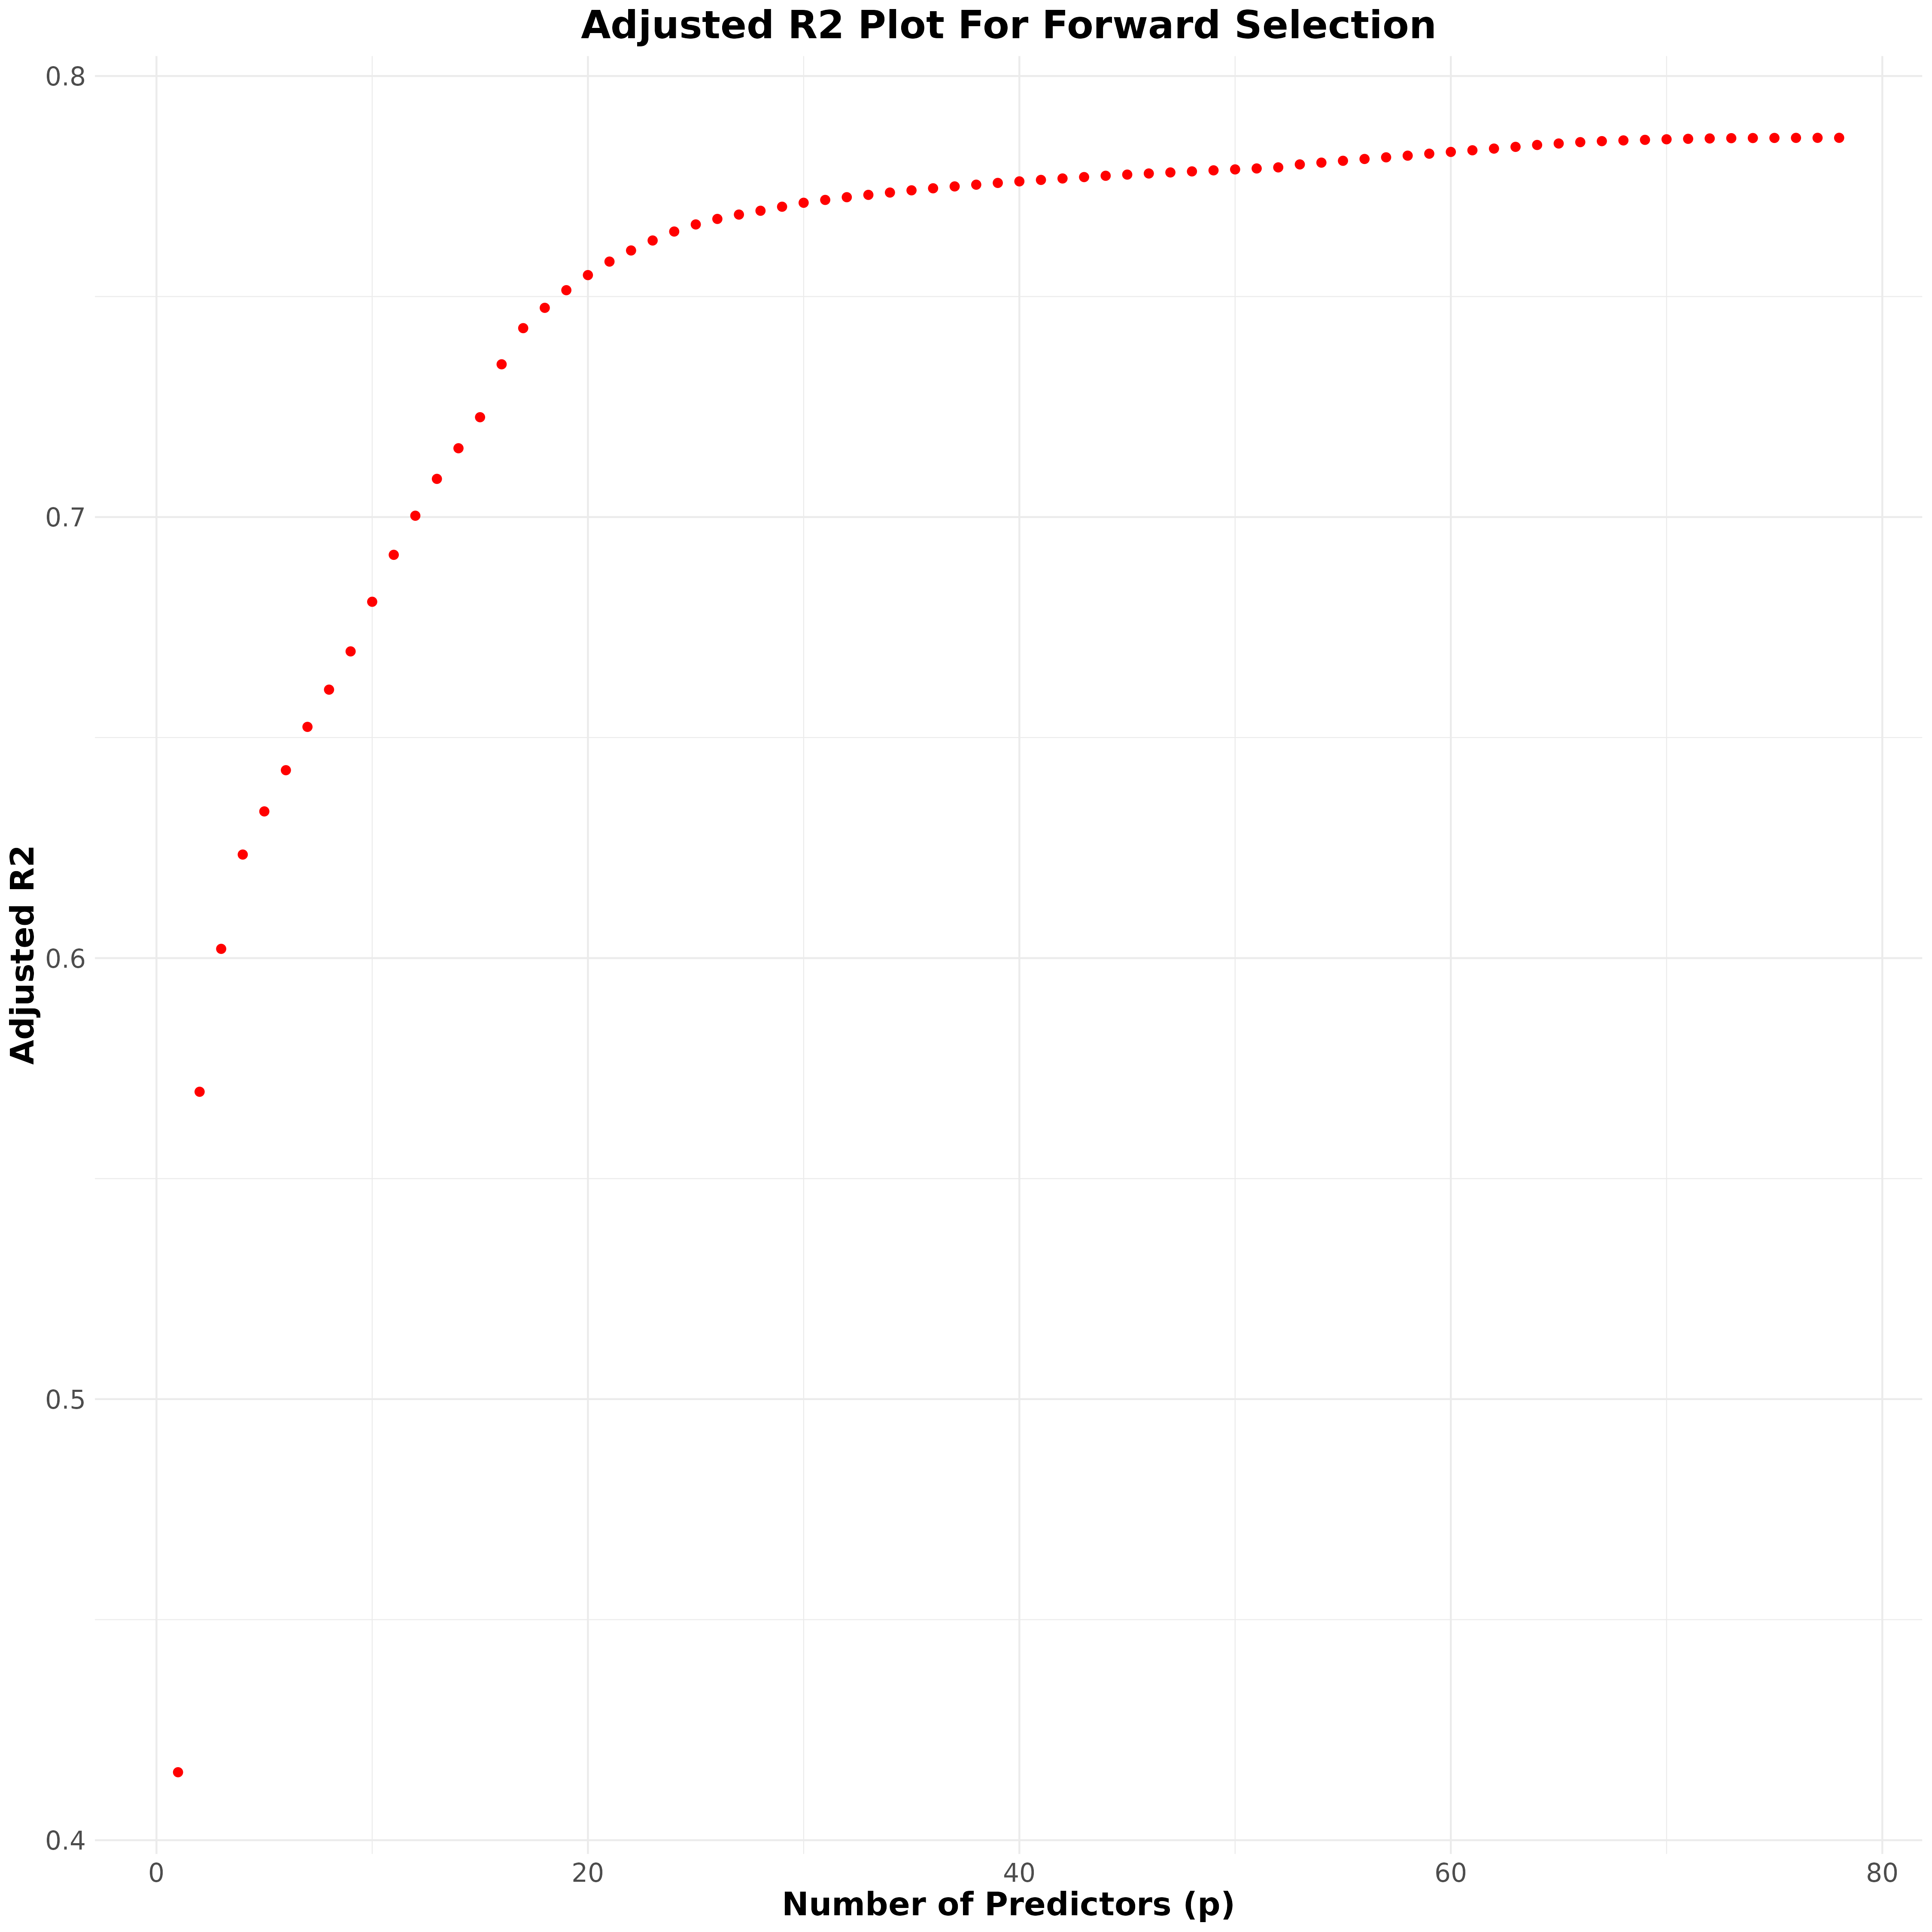

Using forward selection, we arrived at the revelation that the full model is the best performing model at the adjusted R square value of 0.78.

### Backward selection

We move on to backward selection and also plotted the same graph

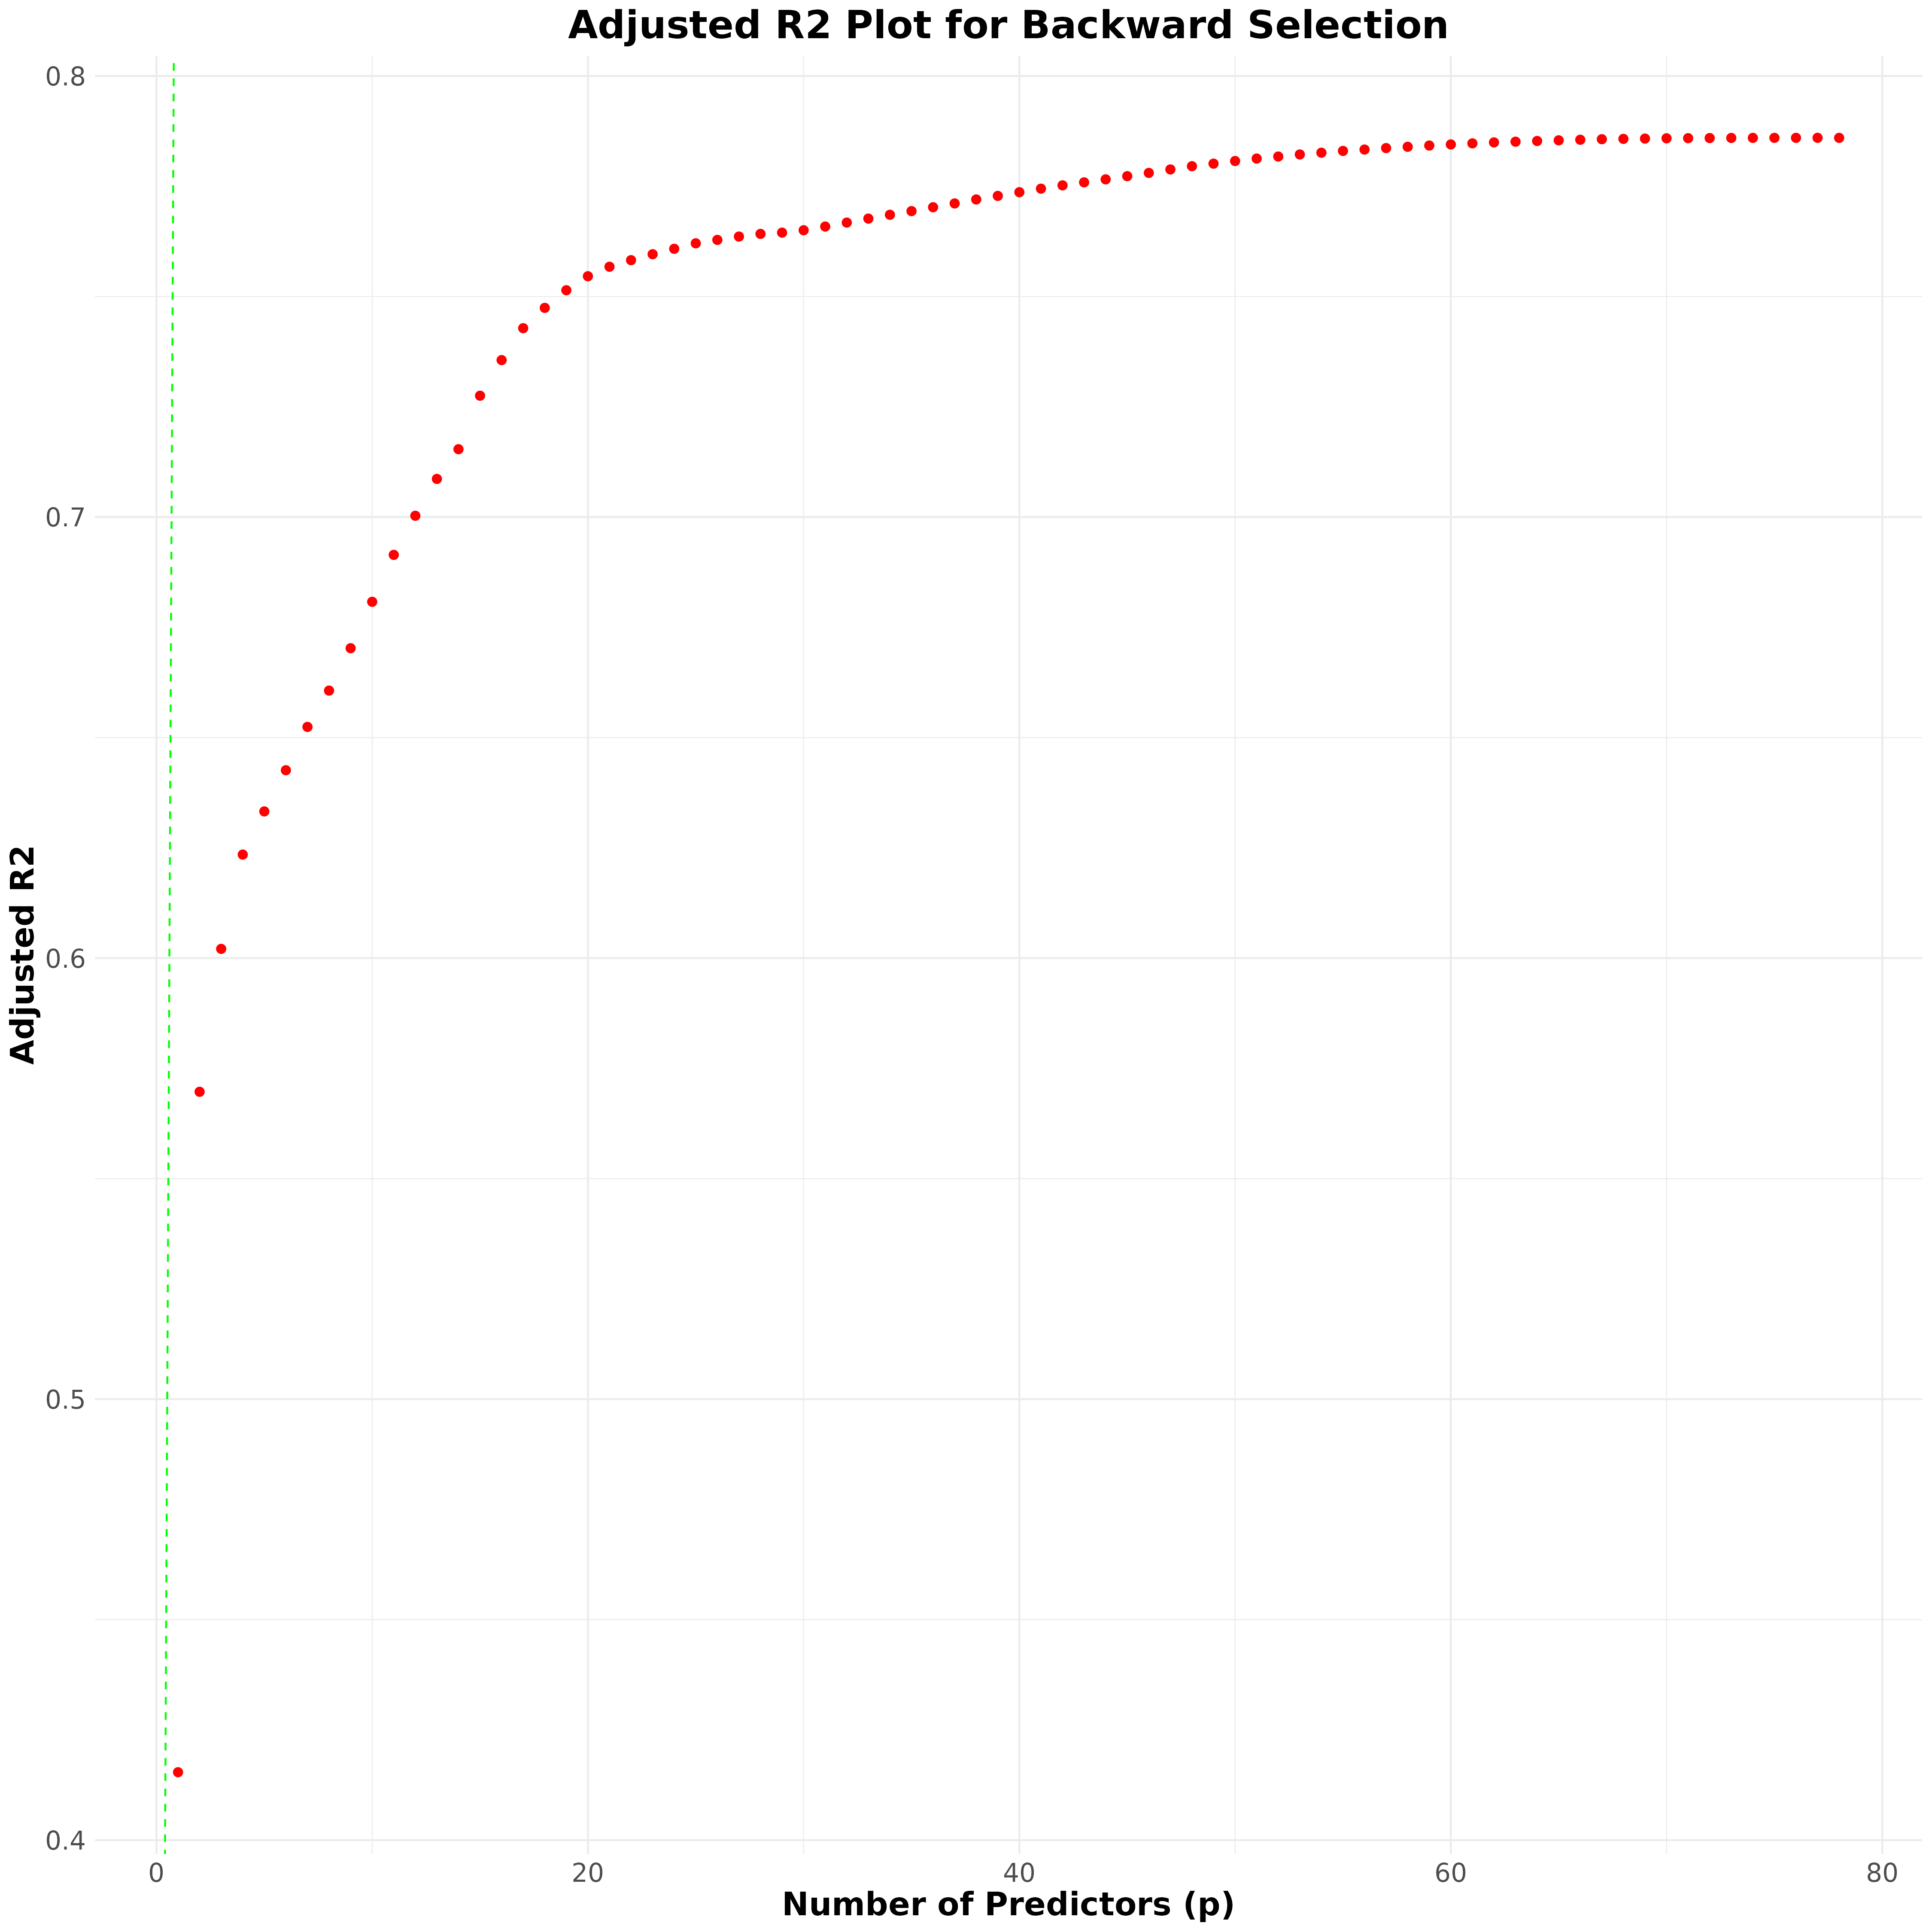

Backward selection arrived at the same conclusion as the forward selection method that the transformed full model is the best performing model at the adjusted R squared value of 0.78 which is also the same conclusion for the stepwise selection

## Mallows Cp criteria

Using Mallows Cp as the criteria we also plotted the using number of predictors as the x and Cp value as the y:

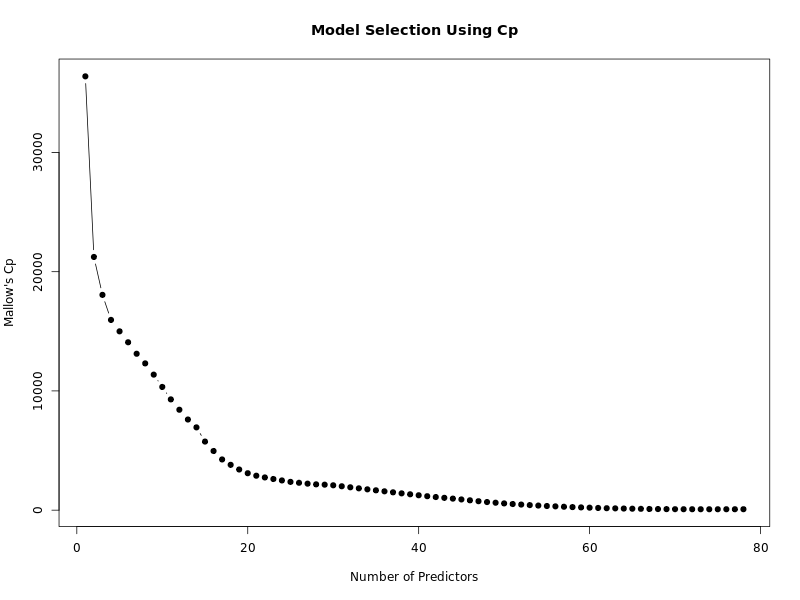

The Cp get lower and lower as the number of predictors increase and it get closest to the number of predictors with k = 79 and Cp = 79.

## Final model decision

By the Cp value and adjusted R squared value, we can conlcude that the full transformed model is the bast performing model. 

# Conclusion
Our research investigates the relationship between geoloction and financial background and the mortgage loan amount borrower can get. 

First, dropped the extraneous columns and keep the adimissible covariates for the response variable (original_loan_amount). And then examining the the most important covariate that affect the response variable is the SONYMA amount as well as other numeric covariates with a correlation heat map. We also utilized the boxplots to explain how the categorical covariates influence the response variable.

Then we tried all the backward, forward and stepwise method to select the most appropriate model. The final model that we decided on was the transformed full model where we include all covariates and apply a square root transformation on the response variable (original_loan_amount )





$$
\begin{aligned}
\sqrt{\text{original_loan_amount}} ={} & -9372.4 \\
&+\,4.744\,\cdot\,\text{purchase_year} \\
&+\,1.504\,\cdot\,\text{original_loan_to_value} \\
&+\,59.23\,\cdot\,\text{loan_type}_{\text{Step}} \\
&+\,0.01085\,\cdot\,\text{SONYMA_amount} \\
&+\,0.01971\,\cdot\,\text{original_term} \\
&+\,\sum_{\text{county}}\beta_{\text{county}}\cdot\text{county}_{\text{name}} \\
&+\,6.552\,\cdot\,\text{num_of_units}_{2\text{ Family}} \\
&+\,37.31\,\cdot\,\text{num_of_units}_{3\text{ Family}} \\
&+\,44.58\,\cdot\,\text{numof_units}_{4\text{ Family}} \\
&-\,29.14\,\cdot\,\text{property_type}_{\text{Condominium}} \\
&-\,82.87\,\cdot\,\text{property_type}_{\text{Cooperative}} \\
&-\,2.50\,\cdot\,\text{property_type}_{\text{Detached}} \\
&-\,14.70\,\cdot\,\text{property_type}_{\text{Manufactured}} \\
&-\,7.803\,\cdot\,\text{property_type}_{\text{Not Available}} \\
&-\,11.96\,\cdot\,\text{property_type}_{\text{PUD}} \\
&-\,3.084\,\cdot\,\text{housing_type}_{\text{New}} \\
&-\,30.69\,\cdot\,\text{housing_type}_{\text{Rehabilitation}} \\
&+\,2.747\,\cdot\,\text{household_size} \\
&+\,\varepsilon
\end{aligned}
$$


### Interpretation of County Coefficients (Reference: Albany)

In this linear regression model, **Albany County** is the reference category. The coefficients for other counties represent their effect on the **square root of the original loan amount**, compared to Albany, **while holding all other variables constant**.

**Example interpretation**:

If a property is located in **Kings** County, then — holding all other variables constant — the predicted square root of the original loan amount increases by **101.1** units compared to the **Albany** county.

---

### Counties with Significantly *Higher* Loan Amounts (vs. Albany)

| County             | Coefficient | p-value | Interpretation          |
|--------------------|-------------|---------|--------------------------|
| **New York**       | 141.3       | <2e-16  | Highest loan amounts     |
| **Nassau**         | 118.6       | <2e-16  | Much higher loans        |
| **Queens**         | 115.0       | <2e-16  | Much higher loans        |
| **Kings**          | 101.5       | <2e-16  | Much higher loans        |
| **Richmond**       | 96.4        | <2e-16  | Higher than Albany       |
| **Westchester**    | 93.5        | <2e-16  | Higher than Albany       |
| **Rockland**       | 91.1        | <2e-16  | Higher than Albany       |
| **Suffolk**        | 88.5        | <2e-16  | Higher than Albany       |
| **Bronx**          | 85.2        | <2e-16  | Higher than Albany       |
| **Putnam**         | 62.9        | <2e-16  | Higher than Albany       |
| **Dutchess**       | 49.5        | <2e-16  | Higher than Albany       |
| **Orange**         | 44.8        | <2e-16  | Higher than Albany       |
| **Saratoga**       | 9.1         | 0.0219  | Slightly higher          |

---

### Counties with Significantly *Lower* Loan Amounts (vs. Albany)

| County           | Coefficient | p-value | Interpretation         |
|------------------|-------------|---------|-------------------------|
| **Allegany**      | -101.5      | <2e-16  | Much lower loans        |
| **Chautauqua**    | -100.1      | <2e-16  | Much lower loans        |
| **Chemung**       | -97.0       | <2e-16  | Much lower loans        |
| **Herkimer**      | -95.7       | <2e-16  | Much lower loans        |
| **Cattaraugus**   | -95.9       | <2e-16  | Much lower loans        |
| **Steuben**       | -84.7       | <2e-16  | Lower loans             |
| **Wyoming**       | -81.7       | <2e-16  | Lower loans             |
| **Oswego**        | -81.8       | <2e-16  | Lower loans             |
| **Lewis**         | -81.5       | 1.4e-05 | Lower loans             |
| **Seneca**        | -81.7       | <2e-16  | Lower loans             |
| **Tioga**         | -78.2       | <2e-16  | Lower loans             |
| **Orleans**       | -78.6       | <2e-16  | Lower loans             |
| *...many more rural counties also show negative effects...* | | |

---

### Counties with No Significant Difference from Albany

| County         | Coefficient | p-value | Interpretation     |
|----------------|-------------|---------|---------------------|
| **Columbia**   | +9.96       | 0.263   | Not significant     |
| **Greene**     | -13.7       | 0.0635  | Marginal            |
| **Hamilton**   | -50.7       | 0.0554  | Marginal            |
| **Sullivan**   | -1.67       | 0.774   | No difference       |

---


- **Urban & suburban counties (e.g., NYC, Long Island, Westchester)** tend to have **higher** loan amounts than Albany.
- **Rural/upstate counties** tend to have **lower** loan amounts.
- **Albany** serves as a **baseline/mid-range** county for comparison.


## Limitation

The dataset contains columns of SONYMA operation (the source of mortgage, the time of acquiring the mortgage from the original lenders) and lacks explicit columns to explain the most important criterion of lending mortgage is clients' financial background (which is implicitly encoded in SONYMA) to infer the responsible variable which is the amount of loan mortgage money the borrowers would get. We have to assess the most import criterion through SONYMA amount (which is the amount of down payment assistance (DPAL) or closing cost assistance (CCAL) provided to the homebuyer as state in the data dictionaries) which is the result of assessment with internal IRS guidelines of the borrower credit reports, income information, bank statements, property appraisals, tax return, etc. Furthermore, this column contains 7516 Nulls value out of 28,528 data points that we had top drop all the nulls and have 1094 values = 0 which might not correctly represent all of the personal background of the borrowers.


 

## Potential future research

For potential future research, if the dataset were to include explicit financial background data of the borrowers—such as income, credit scores, incomes, or savings, etc —then a more thorough investigation into mortgage risk, affordability, and the allocation of financial assistance could be conducted. The current reliance on implicit indicators (like SONYMA assistance amounts with many nulls) does not provide sufficient insight into the borrowers’ actual financial conditions, limiting the accuracy and fairness of such analyses.